#***DataSet***

In [1541]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import KFold

In [1542]:
!gdown --id 12wyRWegwJ7R-t2hYshX9Qj1Qs460lPr1

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=12wyRWegwJ7R-t2hYshX9Qj1Qs460lPr1
To: /content/xAPI-Edu-Data.csv
100% 38.0k/38.0k [00:00<00:00, 45.8MB/s]


In [1543]:
df = pd.read_csv('/content/xAPI-Edu-Data.csv')
df.head()

gender NationalITy PlaceofBirth     StageID GradeID SectionID Topic  \
0      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
1      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
2      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
3      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
4      M          KW       KuwaIT  lowerlevel    G-04         A    IT   

  Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
0        F   Father           15                16                  2   
1        F   Father           20                20                  3   
2        F   Father           10                 7                  0   
3        F   Father           30                25                  5   
4        F   Father           40                50                 12   

   Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
0          20                   Yes                     Good   
1          25                   Yes                     Good   
2          30                    No                      Bad   
3          35                    No                      Bad   
4          50                    No                      Bad   

  StudentAbsenceDays Class  
0            Under-7     M  
1            Under-7     M  
2            Above-7     L  
3            Above-7     L  
4            Above-7     M

In [1544]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [1545]:
df.shape

(480, 17)

In [1546]:
df["Class"].unique()

array(['M', 'L', 'H'], dtype=object)

In [1547]:
X = np.array(pd.get_dummies(df.iloc[:,:-1])).astype("float")
Y = np.array(df["Class"])

In [1548]:
Y[Y == 'M'] = 1
Y[Y == 'H'] = 2
Y[Y == 'L'] = 0

In [1549]:
# df.head(20)

In [1550]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=32) #choose 20 80

In [1551]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [1552]:
print('Number of dataset: ', len(X))
print('Number of train set: ', len(X_train))
print('Number of validation set: ', len(X_test))

Number of dataset:  480
Number of train set:  384
Number of validation set:  96


In [1553]:
y_train, y_test = y_train.reshape(y_train.shape[0], -1),  y_test.reshape(y_test.shape[0], -1)

In [1554]:
print("X_train: ",X_train.shape)
print("y_train: " ,y_train.shape)
print("X_val: " ,X_test.shape)
print("y_val:" ,y_test.shape)

X_train:  (384, 72)
y_train:  (384, 1)
X_val:  (96, 72)
y_val: (96, 1)


Kind of Data:['M' 'F']

Number of Data:
M    305
F    175
Name: gender, dtype: int64



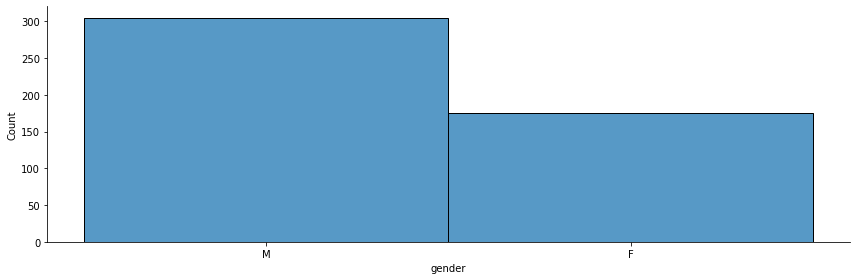

In [1555]:
print("Kind of Data:" + str(df['gender'].unique()))
print()
print("Number of Data:")
print(df['gender'].value_counts())
print()
sns.displot(data = df, x = 'gender', height = 4, aspect = 3)

Kind of Data:['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']

Number of Data:
KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64



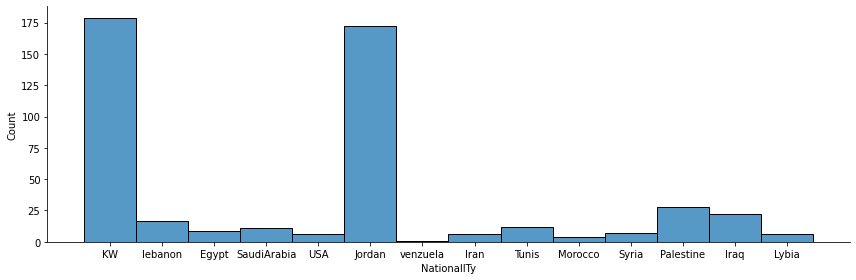

In [1556]:
print("Kind of Data:" + str(df['NationalITy'].unique()))
print()
print("Number of Data:")
print(df['NationalITy'].value_counts())
print()
sns.displot(data = df, x = 'NationalITy', height = 4, aspect= 3)

Kind of Data:['KuwaIT' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia']

Number of Data:
KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Syria            6
Lybia            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64



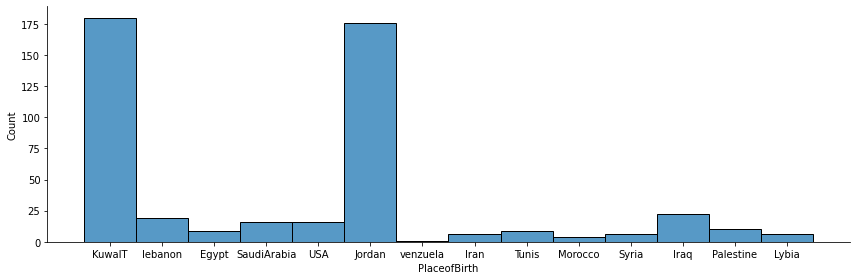

In [1557]:
print("Kind of Data:" + str(df['PlaceofBirth'].unique()))
print()
print("Number of Data:")
print(df['PlaceofBirth'].value_counts())
print()
sns.displot(data = df, x = 'PlaceofBirth', height = 4, aspect= 3)

Kind of Data:['lowerlevel' 'MiddleSchool' 'HighSchool']

Number of Data:
MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64



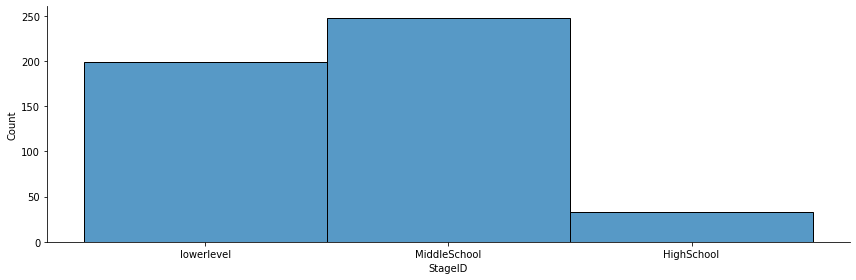

In [1558]:
print("Kind of Data:" + str(df['StageID'].unique()))
print()
print("Number of Data:")
print(df['StageID'].value_counts())
print()
sns.displot(data = df, x = 'StageID', height = 4, aspect= 3)

Kind of Data:['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']

Number of Data:
G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: GradeID, dtype: int64



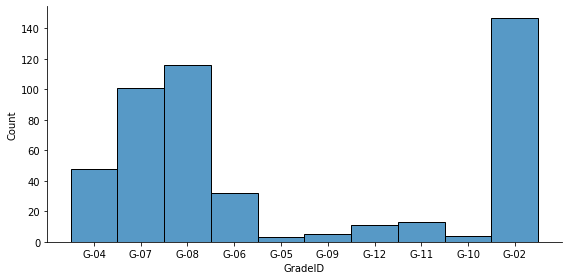

In [1559]:
print("Kind of Data:" + str(df['GradeID'].unique()))
print()
print("Number of Data:")
print(df['GradeID'].value_counts())
print()
sns.displot(data = df, x = 'GradeID', height = 4, aspect= 2)

Kind of Data:['A' 'B' 'C']

Number of Data:
A    283
B    167
C     30
Name: SectionID, dtype: int64



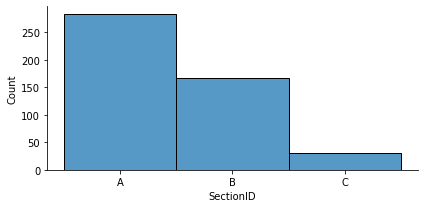

In [1560]:
print("Kind of Data:" + str(df['SectionID'].unique()))
print()
print("Number of Data:")
print(df['SectionID'].value_counts())
print()
sns.displot(data = df, x = 'SectionID', height = 3, aspect= 2)

Kind of Data:['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology']

Number of Data:
IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Chemistry    24
Geology      24
Quran        22
Math         21
History      19
Name: Topic, dtype: int64



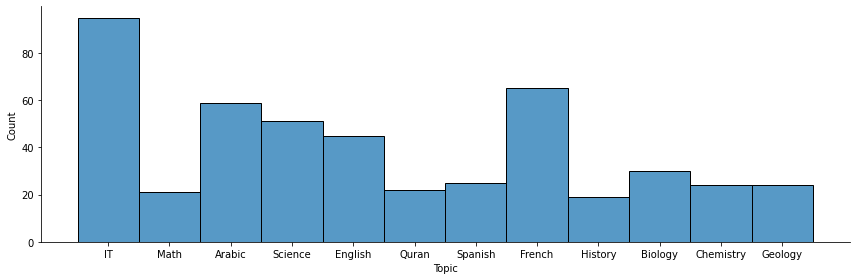

In [1561]:
print("Kind of Data:" + str(df['Topic'].unique()))
print()
print("Number of Data:")
print(df['Topic'].value_counts())
print()
sns.displot(data = df, x = 'Topic', height = 4, aspect= 3)

Kind of Data:['F' 'S']

Number of Data:
F    245
S    235
Name: Semester, dtype: int64



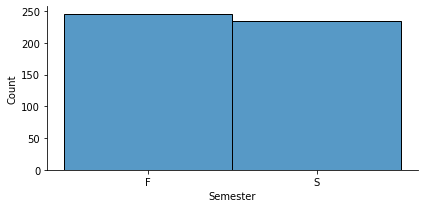

In [1562]:
print("Kind of Data:" + str(df['Semester'].unique()))
print()
print("Number of Data:")
print(df['Semester'].value_counts())
print()
sns.displot(data = df, x = 'Semester', height = 3, aspect= 2)

Kind of Data:['Father' 'Mum']

Number of Data:
Father    283
Mum       197
Name: Relation, dtype: int64



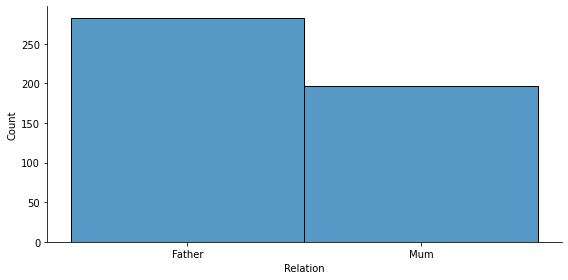

In [1563]:
print("Kind of Data:" + str(df['Relation'].unique()))
print()
print("Number of Data:")
print(df['Relation'].value_counts())
print()
sns.displot(data = df, x = 'Relation', height = 4, aspect= 2)

Kind of Data:[ 15  20  10  30  40  42  35  50  12  70  19   5  62  36  55  69  60   2
   0   8  25  75   4  45  14  33   7  13  29  39  49  16  28  27  21  80
  17  65  22  11   1   3 100   6  90  77  24  66  23  82  72  51  85  87
  95  81  53  92  83  67  96  57  73   9  32  52  59  61  79  18  74  97
  41  71  98  78  89  88  86  76  99  84]

Number of Data:
10    31
70    31
80    28
72    17
50    17
      ..
61     1
83     1
52     1
67     1
97     1
Name: raisedhands, Length: 82, dtype: int64



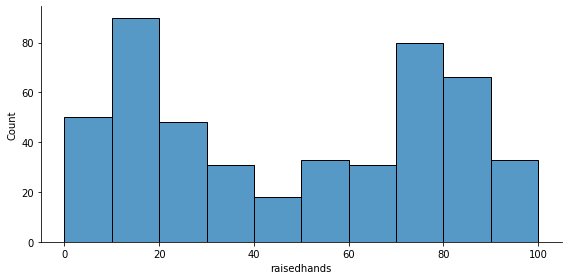

In [1564]:
print("Kind of Data:" + str(df['raisedhands'].unique()))
print()
print("Number of Data:")
print(df['raisedhands'].value_counts())
print()
sns.displot(data = df, x = 'raisedhands', height = 4, aspect= 2)

Kind of Data:[16 20  7 25 50 30 12 10 21 80 88  6  1 14 70 40 13 15 60  0  2 19 85 90
  5 22 11 54 35 33  4 39 75 69  3  8 89 44 92 26 27 29 98  9 42 65 79 55
 63 91 51 58 68 82 72 52 62 71 66 43 95 31 41 81 61 83 84 17 94 48 86 74
 76 97 87 99 34 64 28 38 36 24 59 57 77 18 93 96 78]

Number of Data:
80    29
90    29
82    16
12    13
88    13
      ..
63     1
55     1
54     1
1      1
78     1
Name: VisITedResources, Length: 89, dtype: int64



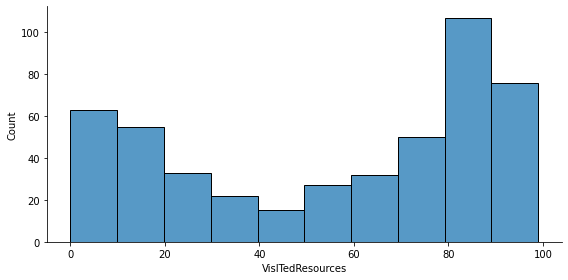

In [1565]:
print("Kind of Data:" + str(df['VisITedResources'].unique()))
print()
print("Number of Data:")
print(df['VisITedResources'].value_counts())
print()
sns.displot(data = df, x = 'VisITedResources', height = 4, aspect= 2)

Kind of Data:[ 2  3  0  5 12 13 15 16 25 30 19 44 22 20 35 36 40 33  4 52 50 10  9  8
 17 26 37  7 28  1 39  6 32 70 18 23 11 29 49 55 38 41 51 95 85 71 98 73
 48 58 93 83 53 63 62 82 72 42 46 77 21 88 66 86 80 56 91 65 76 24 74 59
 79 34 69 89 31 60 54 57 64 87 75 67 43 45 14 78]

Number of Data:
12    21
42    16
50    16
40    16
2     14
20    14
82    13
29    12
32    12
10    12
52    11
15    11
23    10
22    10
62    10
0     10
30     9
83     9
3      8
9      8
19     8
72     8
6      7
11     7
33     7
21     7
58     7
5      6
55     6
86     6
51     6
4      6
74     6
13     6
41     5
73     5
49     5
16     5
76     5
1      5
7      5
79     5
18     4
80     4
25     4
46     4
89     4
35     4
59     4
66     3
31     3
64     3
14     3
85     3
63     3
71     3
8      3
26     3
70     3
95     3
37     3
69     2
39     2
54     2
77     2
34     2
48     2
53     2
28     2
65     2
44     2
56     2
98     2
38     2
57     2
45     1
87     1
43     1

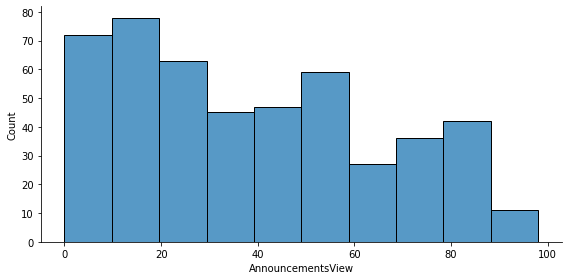

In [1566]:
print("Kind of Data:" + str(df['AnnouncementsView'].unique()))
print()
print("Number of Data:")
print(df['AnnouncementsView'].value_counts().to_string())
print()
sns.displot(data = df, x = 'AnnouncementsView', height = 4, aspect= 2)

Kind of Data:[20 25 30 35 50 70 17 22 80 12 11 19 60 66 90 96 99 40 33 43 16  4 88 77
 75  1  5  2  8 13 44  9 55 10 15  7  3 14 69 59 89 41 91 49 73 23 53 93
 51 83 24 84 61 94 34 81 29 46 26  6 76 86 85 65 95 64 32 37 36 27 39 74
 79 21 31 28 38 48 97 98 63 72 82 71 45 68 92 58 57 62]

Number of Data:
70    24
40    23
33    21
50    18
30    17
10    16
80    15
14    13
53    12
20    11
90    11
13    11
43    11
23    11
83     9
19     9
11     9
89     9
12     8
3      8
66     7
60     7
17     7
21     7
22     6
29     6
7      5
15     5
84     5
81     5
8      5
39     5
28     5
41     5
34     4
24     4
26     4
85     4
31     4
72     4
61     4
5      4
16     4
86     3
96     3
27     3
68     3
75     3
79     3
6      3
1      3
2      3
44     3
9      3
38     3
51     3
35     3
25     3
98     3
49     3
37     3
36     2
71     2
4      2
97     2
88     2
74     2
77     2
63     2
91     2
92     2
46     2
94     2
55     2
69     2
93     2
45     1
82

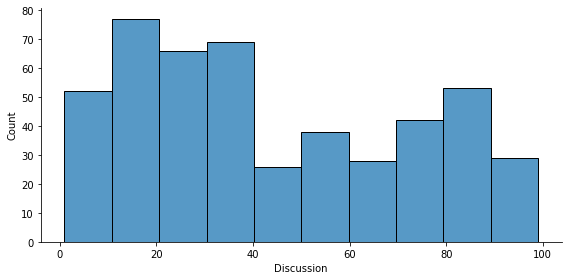

In [1567]:
print("Kind of Data:" + str(df['Discussion'].unique()))
print()
print("Number of Data:")
print(df['Discussion'].value_counts().to_string())
print()
sns.displot(data = df, x = 'Discussion', height = 4, aspect= 2)

Kind of Data:['Yes' 'No']

Number of Data:
Yes    270
No     210
Name: ParentAnsweringSurvey, dtype: int64



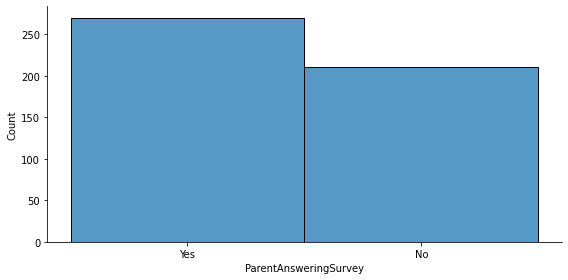

In [1568]:
print("Kind of Data:" + str(df['ParentAnsweringSurvey'].unique()))
print()
print("Number of Data:")
print(df['ParentAnsweringSurvey'].value_counts())
print()
sns.displot(data = df, x = 'ParentAnsweringSurvey', height = 4, aspect= 2)

Kind of Data:['Good' 'Bad']

Number of Data:
Good    292
Bad     188
Name: ParentschoolSatisfaction, dtype: int64



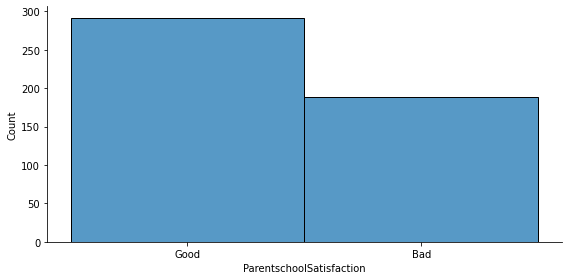

In [1569]:
print("Kind of Data:" + str(df['ParentschoolSatisfaction'].unique()))
print()
print("Number of Data:")
print(df['ParentschoolSatisfaction'].value_counts())
print()
sns.displot(data = df, x = 'ParentschoolSatisfaction', height = 4, aspect= 2)

Kind of Data:['Under-7' 'Above-7']

Number of Data:
Under-7    289
Above-7    191
Name: StudentAbsenceDays, dtype: int64



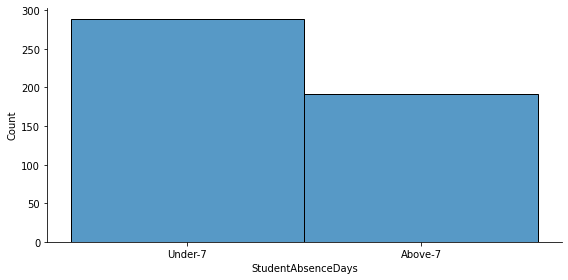

In [1570]:
print("Kind of Data:" + str(df['StudentAbsenceDays'].unique()))
print()
print("Number of Data:")
print(df['StudentAbsenceDays'].value_counts())
print()
sns.displot(data = df, x = 'StudentAbsenceDays', height = 4, aspect= 2)

Kind of Data:['M' 'L' 'H']

Number of Data:
M    211
H    142
L    127
Name: Class, dtype: int64



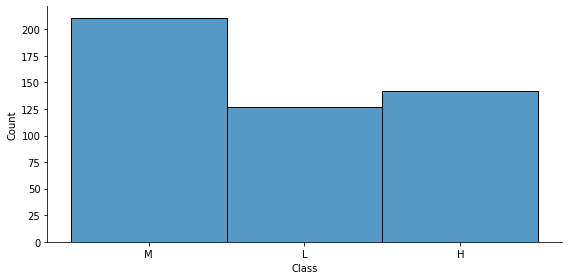

In [1571]:
print("Kind of Data:" + str(df['Class'].unique()))
print()
print("Number of Data:")
print(df['Class'].value_counts())
print()
sns.displot(data = df, x = 'Class', height = 4, aspect= 2)

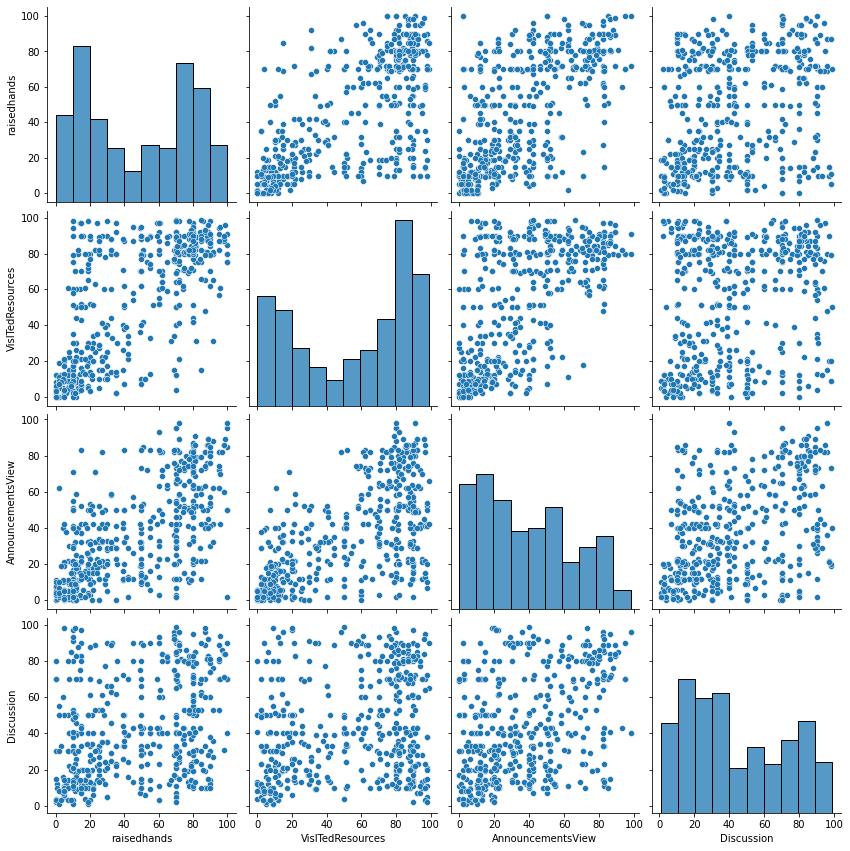

In [1572]:
sns.pairplot(df[['raisedhands','VisITedResources', 'AnnouncementsView', 'Discussion']], height = 3)

In [1573]:
X_train = tf.convert_to_tensor(X_train, dtype=tf.float64)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32) 
X_test = tf.convert_to_tensor(X_test, dtype=tf.float64)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

#**Model 3-layer model Relu SGD**

In [ ]:
model_3layer_RS = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'relu'),
        keras.layers.Dense(32, activation = 'relu'),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_3layer_RS.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_3layer_RS.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 17ms/step - loss: 1.2700 - accuracy: 0.3984 - val_loss: 1.1327 - val_accuracy: 0.3646
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 1.1169 - accuracy: 0.4062 - val_loss: 1.0697 - val_accuracy: 0.3958
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 1.0373 - accuracy: 0.4583 - val_loss: 1.0276 - val_accuracy: 0.4479
Epoch 4/100
24/24 [==============================] - 0s 5ms/step - loss: 0.9778 - accuracy: 0.4948 - val_loss: 0.9905 - val_accuracy: 0.4792
Epoch 5/100
24/24 [==============================] - 0s 7ms/step - loss: 0.9223 - accuracy: 0.5469 - val_loss: 0.9531 - val_accuracy: 0.5208
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 0.8710 - accuracy: 0.6120 - val_loss: 0.9182 - val_accuracy: 0.5208
Epoch 7/100
24/24 [==============================] - 0s 6ms/step - loss: 0.8219 - accuracy: 0.6641 - val_loss: 0.8838 - val_accuracy: 0.5312
Epoch 8/100


In [ ]:
predictions_test = model_3layer_RS.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_3layer_RS.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro") #for first row 
recall = recall_score(y_test, y_pred_test , average="macro") #first column
F1_score = f1_score(y_test, y_pred_test , average="macro") # 2(p*R) / p + R
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.718750
precision: 0.7412698412698413
recall; 0.7188644688644689
F1_score: 0.7265835167522621
confusion_matrix test: 
[[18  8  0]
 [ 3 30  9]
 [ 0  7 21]]
confusion_matrix train: 
[[ 99   2   0]
 [  3 165   1]
 [  0   3 111]]


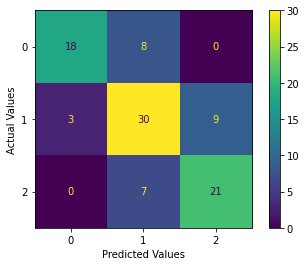

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

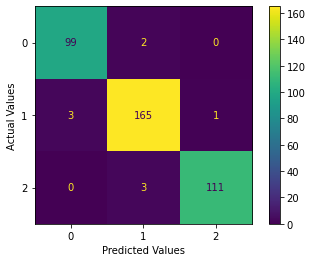

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

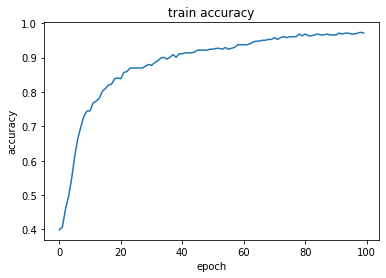

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

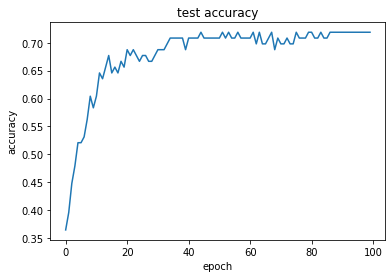

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

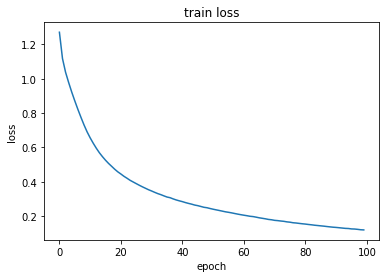

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

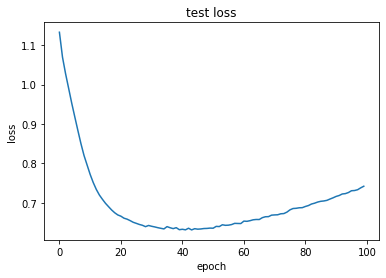

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#***Model 3-layer Relu Adam***

In [ ]:
model_3layer_RA = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'relu'),
        keras.layers.Dense(32, activation = 'relu'),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
model_3layer_RA.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model = model_3layer_RA.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 13ms/step - loss: 1.1084 - accuracy: 0.4115 - val_loss: 1.0441 - val_accuracy: 0.4896
Epoch 2/100
24/24 [==============================] - 0s 5ms/step - loss: 1.0720 - accuracy: 0.4349 - val_loss: 1.0221 - val_accuracy: 0.4896
Epoch 3/100
24/24 [==============================] - 0s 5ms/step - loss: 1.0409 - accuracy: 0.4427 - val_loss: 1.0039 - val_accuracy: 0.4792
Epoch 4/100
24/24 [==============================] - 0s 5ms/step - loss: 1.0118 - accuracy: 0.4583 - val_loss: 0.9856 - val_accuracy: 0.4688
Epoch 5/100
24/24 [==============================] - 0s 5ms/step - loss: 0.9865 - accuracy: 0.4896 - val_loss: 0.9687 - val_accuracy: 0.4688
Epoch 6/100
24/24 [==============================] - 0s 5ms/step - loss: 0.9615 - accuracy: 0.5078 - val_loss: 0.9531 - val_accuracy: 0.4792
Epoch 7/100
24/24 [==============================] - 0s 5ms/step - loss: 0.9386 - accuracy: 0.5208 - val_loss: 0.9372 - val_accuracy: 0.4896
Epoch 8/100


In [ ]:
predictions_test = model_3layer_RA.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_3layer_RA.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix test: ")
print(cm_train)

Accuracy: 0.708333
precision: 0.7396135265700483
recall; 0.706959706959707
F1_score: 0.7180273499613828
confusion_matrix test: 
[[18  8  0]
 [ 2 30 10]
 [ 0  8 20]]
confusion_matrix test: 
[[ 95   6   0]
 [  6 155   8]
 [  0   5 109]]


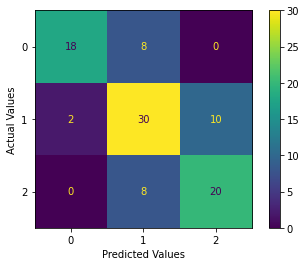

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

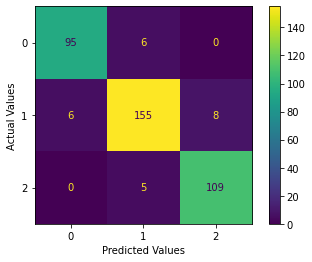

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

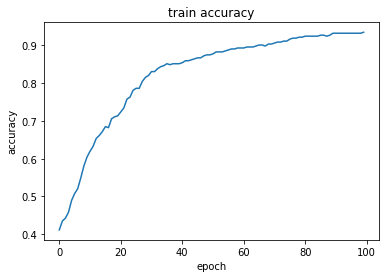

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

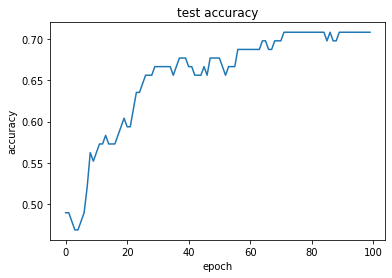

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

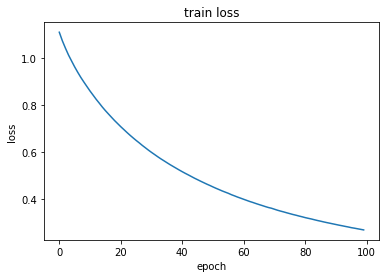

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

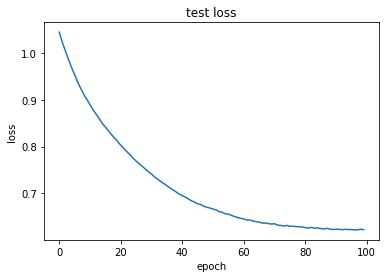

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#***Model 3-layer Relu RMS***




In [ ]:
model_3layer_RR = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'relu'),
        keras.layers.Dense(32, activation = 'relu'),
        keras.layers.Dense(3, activation = 'softmax')
    ]
)
model_3layer_RR.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model = model_3layer_RR.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 13ms/step - loss: 1.4024 - accuracy: 0.2812 - val_loss: 1.3838 - val_accuracy: 0.2812
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 1.2936 - accuracy: 0.3177 - val_loss: 1.3000 - val_accuracy: 0.3021
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 1.2098 - accuracy: 0.3359 - val_loss: 1.2297 - val_accuracy: 0.3333
Epoch 4/100
24/24 [==============================] - 0s 5ms/step - loss: 1.1411 - accuracy: 0.3854 - val_loss: 1.1760 - val_accuracy: 0.3958
Epoch 5/100
24/24 [==============================] - 0s 5ms/step - loss: 1.0847 - accuracy: 0.4297 - val_loss: 1.1307 - val_accuracy: 0.4375
Epoch 6/100
24/24 [==============================] - 0s 5ms/step - loss: 1.0370 - accuracy: 0.4792 - val_loss: 1.0935 - val_accuracy: 0.4688
Epoch 7/100
24/24 [==============================] - 0s 5ms/step - loss: 0.9954 - accuracy: 0.5130 - val_loss: 1.0618 - val_accuracy: 0.5000
Epoch 8/100


In [ ]:
predictions_test = model_3layer_RR.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_3layer_RR.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.677083
precision: 0.6915820190679854
recall; 0.684065934065934
F1_score: 0.6873202614379085
confusion_matrix test: 
[[19  7  0]
 [ 5 27 10]
 [ 0  9 19]]
confusion_matrix train: 
[[ 97   4   0]
 [  5 156   8]
 [  0  12 102]]


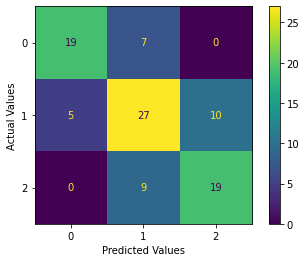

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

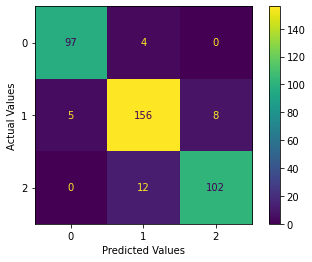

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

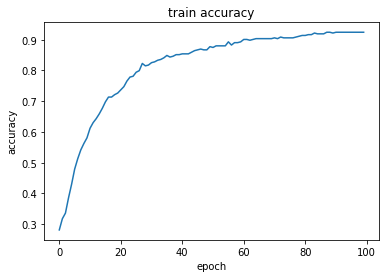

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

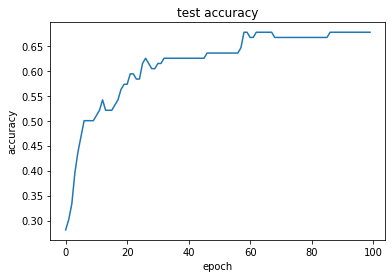

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

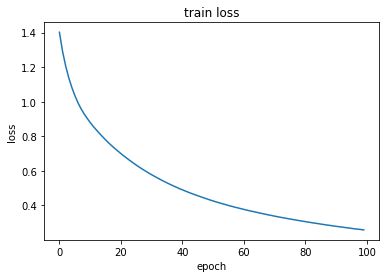

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

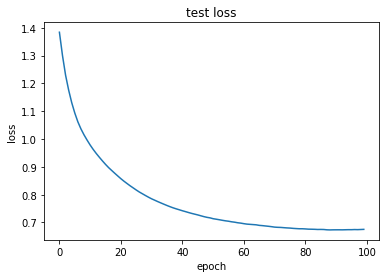

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#***Model 3-layer tanh SGD***


In [ ]:
model_3layer_tS = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'tanh'),
        keras.layers.Dense(32, activation = 'tanh'),
        keras.layers.Dense(3, activation = 'softmax')
    ]
)
model_3layer_tS.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.01), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model = model_3layer_tS.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 13ms/step - loss: 1.1119 - accuracy: 0.4167 - val_loss: 1.1178 - val_accuracy: 0.3646
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 0.9675 - accuracy: 0.5026 - val_loss: 1.0174 - val_accuracy: 0.4688
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.8746 - accuracy: 0.5547 - val_loss: 0.9506 - val_accuracy: 0.5417
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 0.8065 - accuracy: 0.6120 - val_loss: 0.9018 - val_accuracy: 0.5521
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 0.7553 - accuracy: 0.6641 - val_loss: 0.8650 - val_accuracy: 0.5833
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 0.7142 - accuracy: 0.6823 - val_loss: 0.8353 - val_accuracy: 0.5833
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6808 - accuracy: 0.7083 - val_loss: 0.8106 - val_accuracy: 0.5833
Epoch 8/100


In [ ]:
predictions_test = model_3layer_tS.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_3layer_tS.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.677083
precision: 0.6840452531509443
recall; 0.6880341880341881
F1_score: 0.6859242901525238
confusion_matrix test: 
[[19  7  0]
 [ 8 26  8]
 [ 0  8 20]]
confusion_matrix train: 
[[100   0   1]
 [  3 163   3]
 [  0   4 110]]


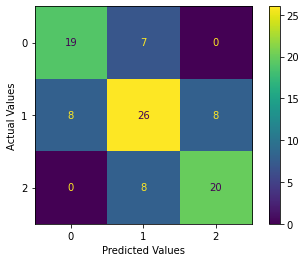

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

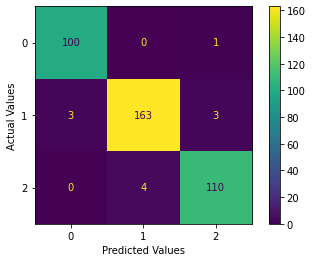

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

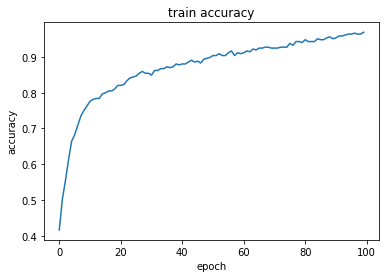

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

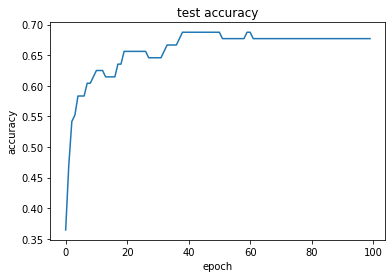

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

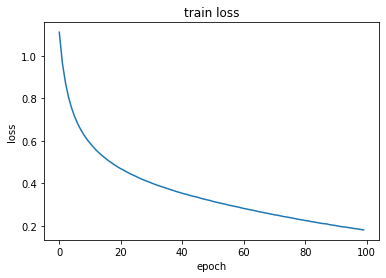

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

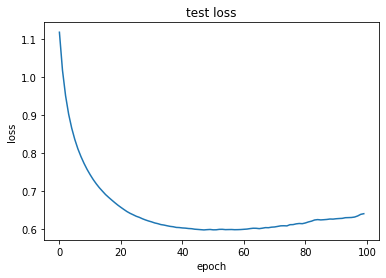

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#***Model 3-layer tanh Adam***

In [ ]:
model_3layer_tA = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'tanh'),
        keras.layers.Dense(32, activation = 'tanh'),
        keras.layers.Dense(3, activation = 'softmax')
    ]
)
model_3layer_tA.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model = model_3layer_tA.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 13ms/step - loss: 1.0789 - accuracy: 0.4036 - val_loss: 1.0808 - val_accuracy: 0.4271
Epoch 2/100
24/24 [==============================] - 0s 5ms/step - loss: 1.0312 - accuracy: 0.4427 - val_loss: 1.0475 - val_accuracy: 0.4792
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.9904 - accuracy: 0.4740 - val_loss: 1.0177 - val_accuracy: 0.4896
Epoch 4/100
24/24 [==============================] - 0s 5ms/step - loss: 0.9556 - accuracy: 0.5104 - val_loss: 0.9927 - val_accuracy: 0.5104
Epoch 5/100
24/24 [==============================] - 0s 5ms/step - loss: 0.9233 - accuracy: 0.5547 - val_loss: 0.9715 - val_accuracy: 0.5104
Epoch 6/100
24/24 [==============================] - 0s 5ms/step - loss: 0.8941 - accuracy: 0.5807 - val_loss: 0.9515 - val_accuracy: 0.5312
Epoch 7/100
24/24 [==============================] - 0s 5ms/step - loss: 0.8691 - accuracy: 0.5833 - val_loss: 0.9333 - val_accuracy: 0.5312
Epoch 8/100


In [ ]:
predictions_test = model_3layer_tA.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_3layer_tA.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.687500
precision: 0.6943167305236271
recall; 0.7017704517704518
F1_score: 0.6977552794395868
confusion_matrix test: 
[[21  5  0]
 [ 6 26 10]
 [ 0  9 19]]
confusion_matrix train: 
[[ 97   4   0]
 [  6 151  12]
 [  0  11 103]]


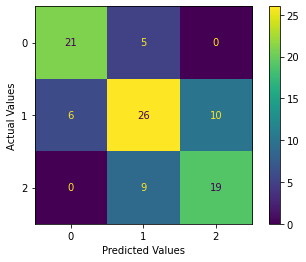

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

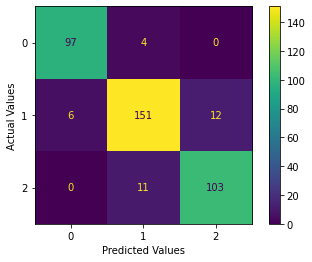

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

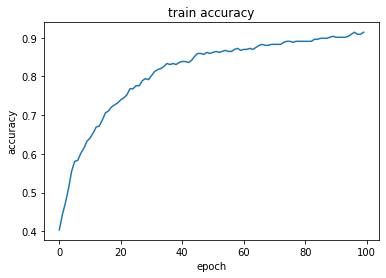

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

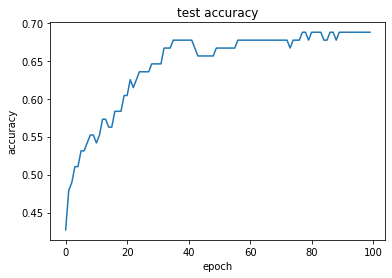

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

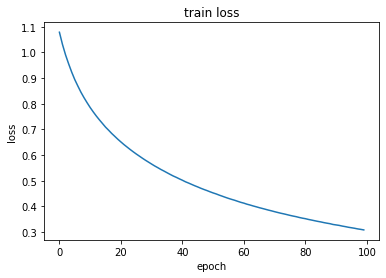

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

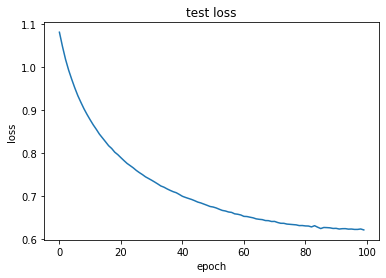

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#***Model 3-layer tanh RMS***

In [ ]:
model_3layer_tR = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'tanh'),
        keras.layers.Dense(32, activation = 'tanh'),
        keras.layers.Dense(3, activation = 'softmax')
    ]
)
model_3layer_tR.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model = model_3layer_tR.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 13ms/step - loss: 1.1656 - accuracy: 0.4036 - val_loss: 1.1725 - val_accuracy: 0.2917
Epoch 2/100
24/24 [==============================] - 0s 5ms/step - loss: 1.0854 - accuracy: 0.4245 - val_loss: 1.1157 - val_accuracy: 0.3646
Epoch 3/100
24/24 [==============================] - 0s 5ms/step - loss: 1.0262 - accuracy: 0.4740 - val_loss: 1.0690 - val_accuracy: 0.4167
Epoch 4/100
24/24 [==============================] - 0s 5ms/step - loss: 0.9740 - accuracy: 0.5026 - val_loss: 1.0281 - val_accuracy: 0.4583
Epoch 5/100
24/24 [==============================] - 0s 5ms/step - loss: 0.9287 - accuracy: 0.5182 - val_loss: 0.9942 - val_accuracy: 0.4688
Epoch 6/100
24/24 [==============================] - 0s 5ms/step - loss: 0.8891 - accuracy: 0.5625 - val_loss: 0.9647 - val_accuracy: 0.4792
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 0.8545 - accuracy: 0.5938 - val_loss: 0.9399 - val_accuracy: 0.4688
Epoch 8/100


In [ ]:
predictions_test = model_3layer_tR.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_3layer_tR.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_test)

Accuracy: 0.697917
precision: 0.7136245139625309
recall; 0.7078754578754579
F1_score: 0.7087042045733956
confusion_matrix test: 
[[19  7  0]
 [ 4 27 11]
 [ 0  7 21]]
confusion_matrix train: 
[[19  7  0]
 [ 4 27 11]
 [ 0  7 21]]


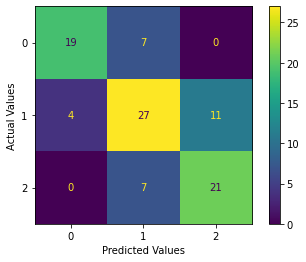

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

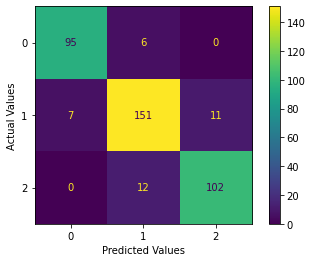

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

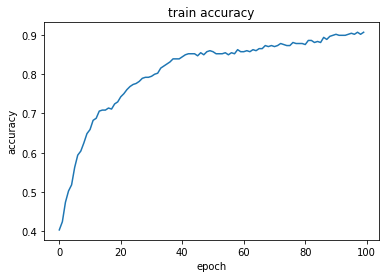

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

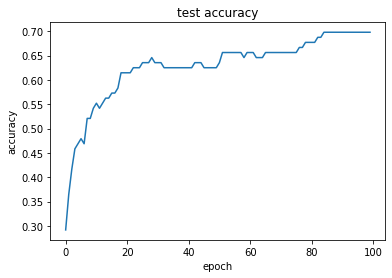

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

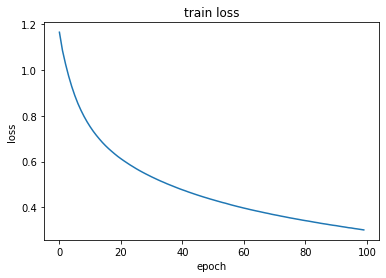

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

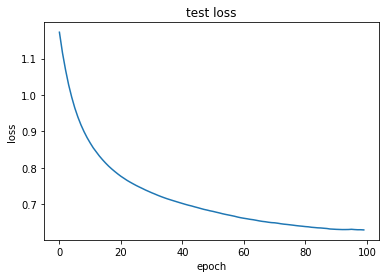

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#***Model 3-layer sigmoid SGD***

In [ ]:
model_3layer_sS = keras.Sequential(
    [
        keras.layers.Dense(32, input_shape = (X_train.shape[1],), activation = 'sigmoid'),
        keras.layers.Dense(16, activation = 'sigmoid'),
        keras.layers.Dense(3, activation = 'softmax')
    ]
)
model_3layer_sS.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.01), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model = model_3layer_sS.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 1000, batch_size = 16)

Epoch 1/1000
24/24 [==============================] - 1s 12ms/step - loss: 1.2248 - accuracy: 0.4375 - val_loss: 1.1875 - val_accuracy: 0.4375
Epoch 2/1000
24/24 [==============================] - 0s 4ms/step - loss: 1.1515 - accuracy: 0.4557 - val_loss: 1.1335 - val_accuracy: 0.4479
Epoch 3/1000
24/24 [==============================] - 0s 5ms/step - loss: 1.1066 - accuracy: 0.4427 - val_loss: 1.1016 - val_accuracy: 0.4375
Epoch 4/1000
24/24 [==============================] - 0s 4ms/step - loss: 1.0813 - accuracy: 0.4401 - val_loss: 1.0838 - val_accuracy: 0.4375
Epoch 5/1000
24/24 [==============================] - 0s 4ms/step - loss: 1.0672 - accuracy: 0.4401 - val_loss: 1.0738 - val_accuracy: 0.4375
Epoch 6/1000
24/24 [==============================] - 0s 4ms/step - loss: 1.0585 - accuracy: 0.4401 - val_loss: 1.0675 - val_accuracy: 0.4375
Epoch 7/1000
24/24 [==============================] - 0s 4ms/step - loss: 1.0534 - accuracy: 0.4401 - val_loss: 1.0634 - val_accuracy: 0.4375
Epoch

In [ ]:
predictions_test = model_3layer_sS.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_3layer_sS.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix train: ")
print(cm_test)
print("confusion_matrix test: ")
print(cm_train)

Accuracy: 0.729167
precision: 0.7431457431457432
recall; 0.7326007326007327
F1_score: 0.7373200442967885
confusion_matrix train: 
[[20  6  0]
 [ 4 30  8]
 [ 0  8 20]]
confusion_matrix test: 
[[ 98   3   0]
 [  4 157   8]
 [  0   5 109]]


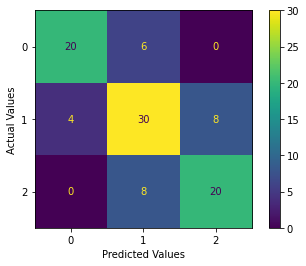

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

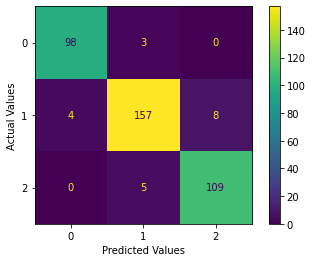

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

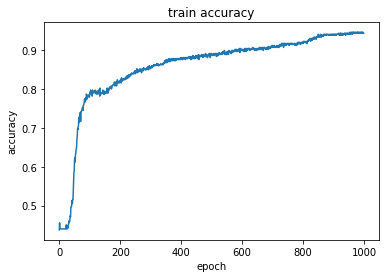

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

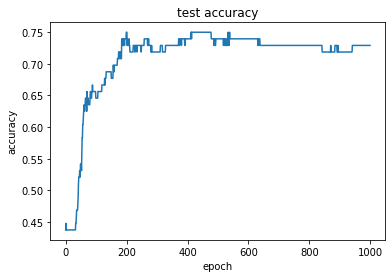

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

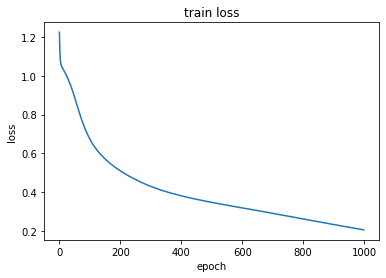

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

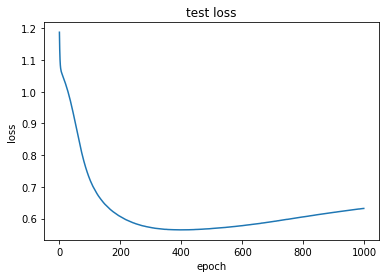

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#***Model 3-layer sigmoid Adam***

In [ ]:
model_3layer_sA = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'sigmoid'),
        keras.layers.Dense(32, activation = 'sigmoid'),
        keras.layers.Dense(3, activation = 'softmax')
    ]
)
model_3layer_sA.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model = model_3layer_sA.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 1000, batch_size = 16)

Epoch 1/1000
24/24 [==============================] - 1s 13ms/step - loss: 1.1010 - accuracy: 0.4401 - val_loss: 1.0914 - val_accuracy: 0.4375
Epoch 2/1000
24/24 [==============================] - 0s 5ms/step - loss: 1.0840 - accuracy: 0.4401 - val_loss: 1.0777 - val_accuracy: 0.4375
Epoch 3/1000
24/24 [==============================] - 0s 5ms/step - loss: 1.0719 - accuracy: 0.4401 - val_loss: 1.0695 - val_accuracy: 0.4375
Epoch 4/1000
24/24 [==============================] - 0s 5ms/step - loss: 1.0643 - accuracy: 0.4401 - val_loss: 1.0624 - val_accuracy: 0.4375
Epoch 5/1000
24/24 [==============================] - 0s 5ms/step - loss: 1.0570 - accuracy: 0.4401 - val_loss: 1.0575 - val_accuracy: 0.4375
Epoch 6/1000
24/24 [==============================] - 0s 5ms/step - loss: 1.0515 - accuracy: 0.4401 - val_loss: 1.0529 - val_accuracy: 0.4375
Epoch 7/1000
24/24 [==============================] - 0s 5ms/step - loss: 1.0461 - accuracy: 0.4401 - val_loss: 1.0484 - val_accuracy: 0.4375
Epoch

In [ ]:
predictions_test = model_3layer_sA.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_3layer_sA.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.750000
precision: 0.7607744107744109
recall; 0.7524420024420024
F1_score: 0.7562934405615663
confusion_matrix test: 
[[20  6  0]
 [ 5 31  6]
 [ 0  7 21]]
confusion_matrix train: 
[[ 99   2   0]
 [  3 161   5]
 [  0   4 110]]


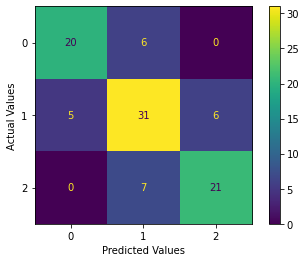

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

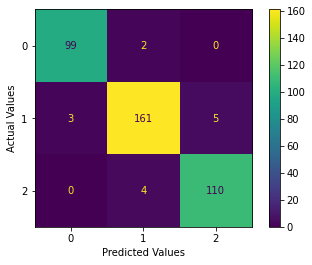

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

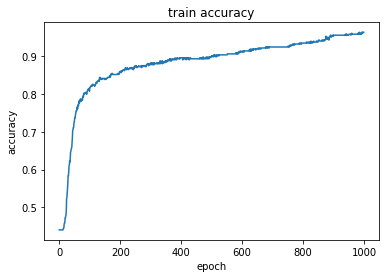

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

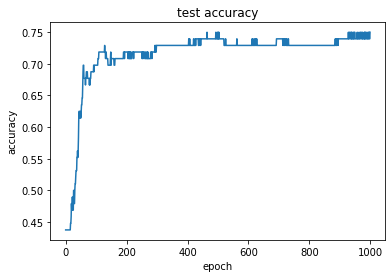

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

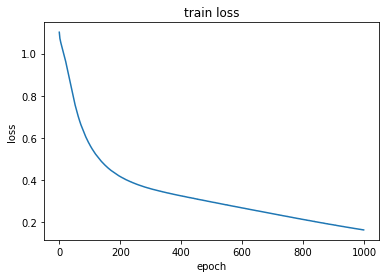

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

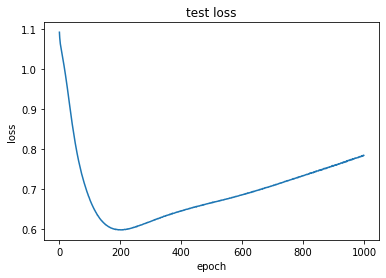

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#***Model 3-layer sigmoid RMS***

In [ ]:
model_3layer_sR = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'sigmoid'),
        keras.layers.Dense(32, activation = 'sigmoid'),
        keras.layers.Dense(3, activation = 'softmax')
    ]
)
model_3layer_sR.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model = model_3layer_sR.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 1000, batch_size = 16)

Epoch 1/1000
24/24 [==============================] - 1s 12ms/step - loss: 1.5204 - accuracy: 0.2630 - val_loss: 1.4584 - val_accuracy: 0.2708
Epoch 2/1000
24/24 [==============================] - 0s 4ms/step - loss: 1.4341 - accuracy: 0.2630 - val_loss: 1.3850 - val_accuracy: 0.2708
Epoch 3/1000
24/24 [==============================] - 0s 4ms/step - loss: 1.3646 - accuracy: 0.2630 - val_loss: 1.3209 - val_accuracy: 0.2708
Epoch 4/1000
24/24 [==============================] - 0s 4ms/step - loss: 1.3024 - accuracy: 0.2656 - val_loss: 1.2632 - val_accuracy: 0.2708
Epoch 5/1000
24/24 [==============================] - 0s 4ms/step - loss: 1.2462 - accuracy: 0.2682 - val_loss: 1.2111 - val_accuracy: 0.2812
Epoch 6/1000
24/24 [==============================] - 0s 5ms/step - loss: 1.1957 - accuracy: 0.2943 - val_loss: 1.1660 - val_accuracy: 0.3229
Epoch 7/1000
24/24 [==============================] - 0s 6ms/step - loss: 1.1539 - accuracy: 0.3464 - val_loss: 1.1287 - val_accuracy: 0.3958
Epoch

In [ ]:
predictions_test = model_3layer_sR.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_3layer_sR.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.750000
precision: 0.7607744107744109
recall; 0.7524420024420024
F1_score: 0.7562934405615663
confusion_matrix test: 
[[20  6  0]
 [ 5 31  6]
 [ 0  7 21]]
confusion_matrix train: 
[[ 97   4   0]
 [  3 158   8]
 [  0   6 108]]


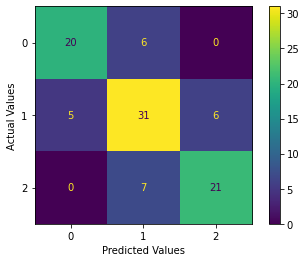

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

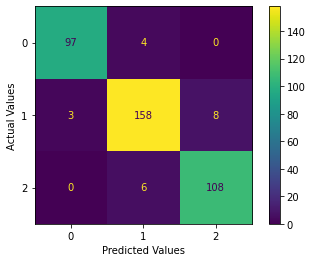

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

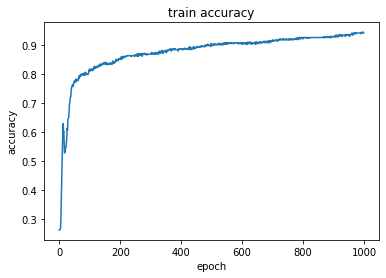

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

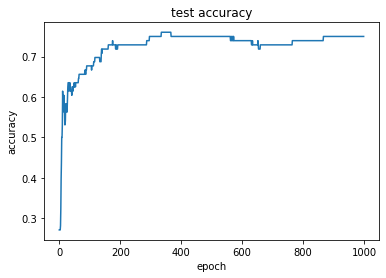

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

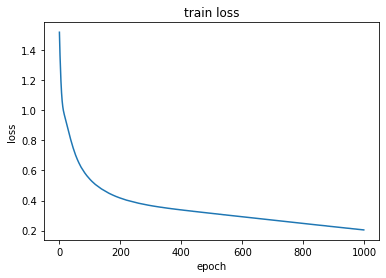

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

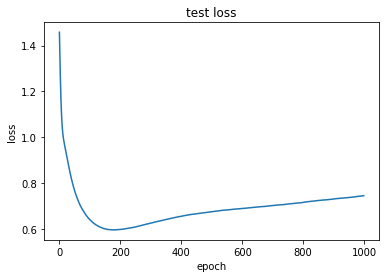

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 4-layer model Relu SGD**

In [ ]:
model_4layer_RS = keras.Sequential(
    [
        keras.layers.Dense(128, input_shape = (X_train.shape[1],), activation = 'relu'),
        keras.layers.Dense(64, activation = 'relu'),
        keras.layers.Dense(32, activation = 'relu'),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_4layer_RS.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_4layer_RS.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 9ms/step - loss: 1.1390 - accuracy: 0.2969 - val_loss: 1.0335 - val_accuracy: 0.4896
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0427 - accuracy: 0.4323 - val_loss: 0.9693 - val_accuracy: 0.5521
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9732 - accuracy: 0.5495 - val_loss: 0.9188 - val_accuracy: 0.5729
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9120 - accuracy: 0.6016 - val_loss: 0.8716 - val_accuracy: 0.6146
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8534 - accuracy: 0.6693 - val_loss: 0.8295 - val_accuracy: 0.6771
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7952 - accuracy: 0.6979 - val_loss: 0.7922 - val_accuracy: 0.6562
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7437 - accuracy: 0.7240 - val_loss: 0.7627 - val_accuracy: 0.6667
Epoch 8/100
2

In [ ]:
predictions_test = model_4layer_RS.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_4layer_RS.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.750000
precision: 0.7748506699031436
recall; 0.7475579975579976
F1_score: 0.7575418236112524
confusion_matrix test: 
[[19  7  0]
 [ 2 32  8]
 [ 0  7 21]]
confusion_matrix train: 
[[100   1   0]
 [  3 165   1]
 [  0   1 113]]


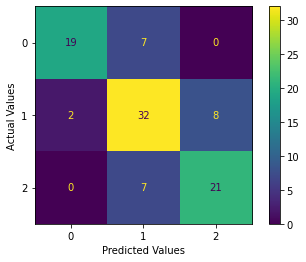

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

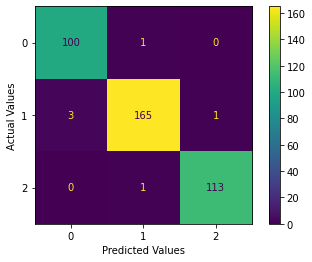

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

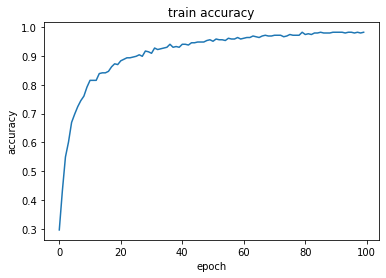

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

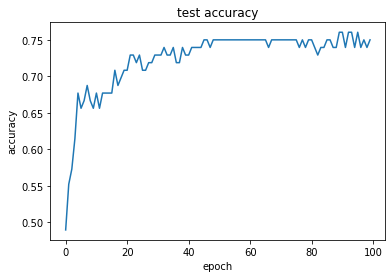

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

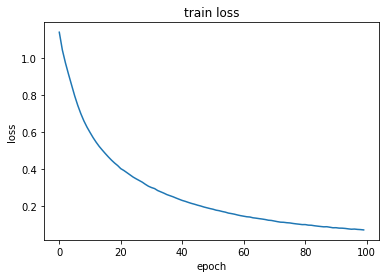

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

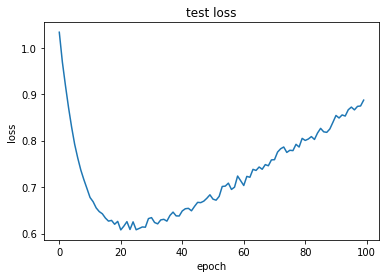

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#***Model 4-layer Relu Adam***

In [ ]:
model_4layer_RA = keras.Sequential(
    [
        keras.layers.Dense(128, input_shape = (X_train.shape[1],), activation = 'relu'),
        keras.layers.Dense(64, activation = 'relu'),
        keras.layers.Dense(32, activation = 'relu'),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
model_4layer_RA.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model = model_4layer_RA.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 8ms/step - loss: 1.1283 - accuracy: 0.4219 - val_loss: 1.0638 - val_accuracy: 0.4167
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 1.0597 - accuracy: 0.4635 - val_loss: 1.0295 - val_accuracy: 0.4688
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0046 - accuracy: 0.5000 - val_loss: 1.0011 - val_accuracy: 0.5000
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 0.9565 - accuracy: 0.5365 - val_loss: 0.9713 - val_accuracy: 0.5208
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9115 - accuracy: 0.5833 - val_loss: 0.9459 - val_accuracy: 0.5104
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8685 - accuracy: 0.6276 - val_loss: 0.9201 - val_accuracy: 0.5312
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8294 - accuracy: 0.6380 - val_loss: 0.8987 - val_accuracy: 0.5312
Epoch 8/100
2

In [ ]:
predictions_test = model_4layer_RA.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_4layer_RA.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.729167
precision: 0.747364953886693
recall; 0.7268009768009769
F1_score: 0.7348484848484849
confusion_matrix test: 
[[18  8  0]
 [ 4 31  7]
 [ 0  7 21]]
confusion_matrix train: 
[[ 99   2   0]
 [  2 166   1]
 [  0   3 111]]


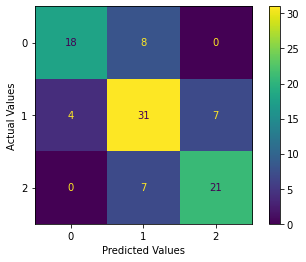

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

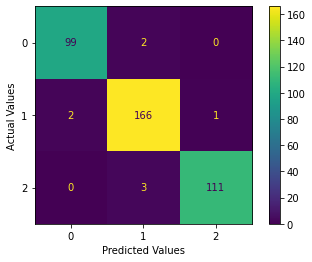

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

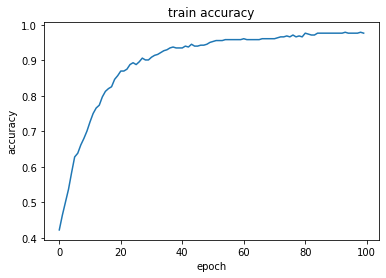

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

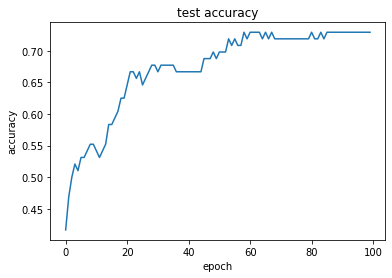

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

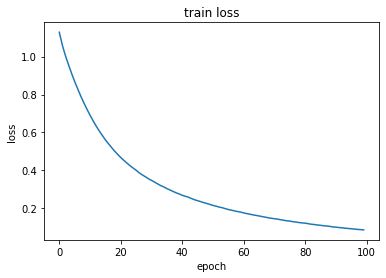

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

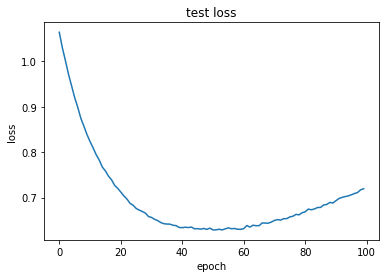

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#***Model 4-layer Relu RMS***

In [ ]:
model_4layer_RR = keras.Sequential(
    [
        keras.layers.Dense(128, input_shape = (X_train.shape[1],), activation = 'relu'),
        keras.layers.Dense(64, activation = 'relu'),
        keras.layers.Dense(32, activation = 'relu'),
        keras.layers.Dense(3, activation = 'softmax')
    ]
)
model_4layer_RR.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model = model_4layer_RR.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 9ms/step - loss: 1.1121 - accuracy: 0.4062 - val_loss: 1.0652 - val_accuracy: 0.4375
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 1.0272 - accuracy: 0.4740 - val_loss: 1.0072 - val_accuracy: 0.4792
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.9666 - accuracy: 0.5286 - val_loss: 0.9623 - val_accuracy: 0.5208
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 0.9154 - accuracy: 0.5807 - val_loss: 0.9257 - val_accuracy: 0.5521
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8696 - accuracy: 0.6198 - val_loss: 0.8925 - val_accuracy: 0.5938
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8274 - accuracy: 0.6484 - val_loss: 0.8655 - val_accuracy: 0.6146
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7890 - accuracy: 0.6589 - val_loss: 0.8397 - val_accuracy: 0.6354
Epoch 8/100
2

In [ ]:
predictions_test = model_4layer_RR.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_4layer_RR.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.750000
precision: 0.7892712550607287
recall; 0.7338217338217339
F1_score: 0.751651129250487
confusion_matrix test: 
[[17  9  0]
 [ 2 35  5]
 [ 0  8 20]]
confusion_matrix train: 
[[ 99   2   0]
 [  3 164   2]
 [  0   4 110]]


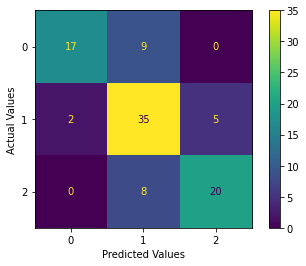

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

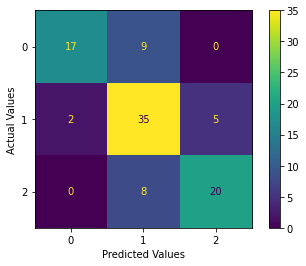

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

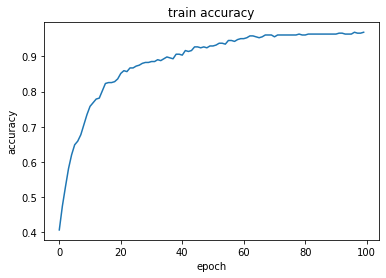

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

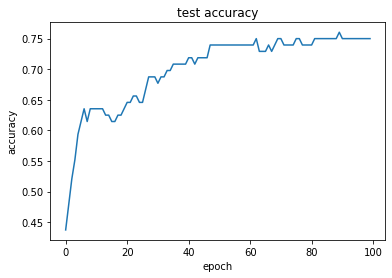

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

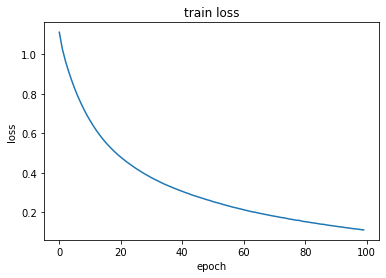

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

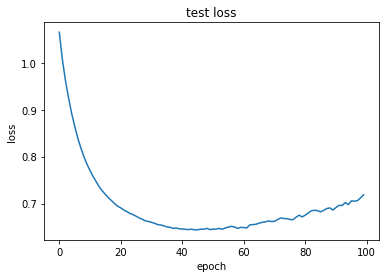

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#***Model 4-layer tanh SGD***

In [ ]:
model_4layer_tS = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'tanh'),
        keras.layers.Dense(32, activation = 'tanh'),
        keras.layers.Dense(16, activation = 'tanh'),
        keras.layers.Dense(3, activation = 'softmax')
    ]
)
model_4layer_tS.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.01), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_4layer_tS.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 8ms/step - loss: 1.0902 - accuracy: 0.3828 - val_loss: 1.0276 - val_accuracy: 0.4375
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9671 - accuracy: 0.5104 - val_loss: 0.9394 - val_accuracy: 0.4896
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8829 - accuracy: 0.5703 - val_loss: 0.8786 - val_accuracy: 0.5312
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8163 - accuracy: 0.6198 - val_loss: 0.8332 - val_accuracy: 0.5938
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7641 - accuracy: 0.6849 - val_loss: 0.7986 - val_accuracy: 0.5938
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7207 - accuracy: 0.7161 - val_loss: 0.7696 - val_accuracy: 0.5833
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6840 - accuracy: 0.7370 - val_loss: 0.7474 - val_accuracy: 0.6250
Epoch 8/100
2

In [ ]:
predictions_test = model_4layer_tS.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_4layer_tS.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.718750
precision: 0.731327500612213
recall; 0.7237484737484737
F1_score: 0.7259502671124948
confusion_matrix test: 
[[19  6  1]
 [ 4 29  9]
 [ 0  7 21]]
confusion_matrix train: 
[[100   0   1]
 [  3 164   2]
 [  0   2 112]]


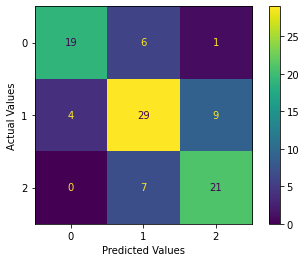

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

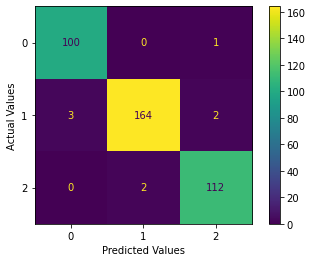

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

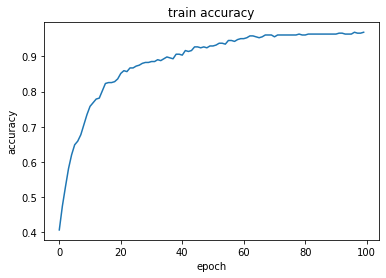

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

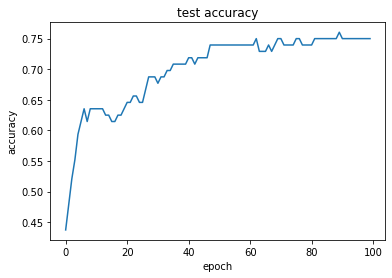

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

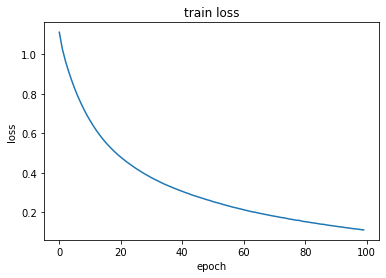

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

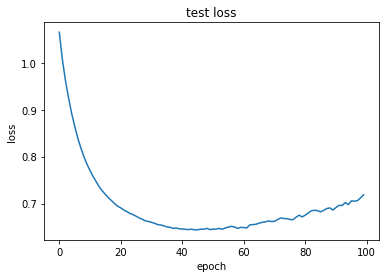

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#***Model 4-layer tanh Adam***

In [ ]:
model_4layer_tA = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'tanh'),
        keras.layers.Dense(32, activation = 'tanh'),
        keras.layers.Dense(16, activation = 'tanh'),
        keras.layers.Dense(3, activation = 'softmax')
    ]
)
model_4layer_tA.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_4layer_tA.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 9ms/step - loss: 1.1912 - accuracy: 0.3411 - val_loss: 1.2249 - val_accuracy: 0.2812
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 1.1210 - accuracy: 0.3750 - val_loss: 1.1616 - val_accuracy: 0.3125
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0615 - accuracy: 0.4141 - val_loss: 1.1088 - val_accuracy: 0.3542
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0103 - accuracy: 0.4453 - val_loss: 1.0630 - val_accuracy: 0.3854
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9655 - accuracy: 0.5130 - val_loss: 1.0247 - val_accuracy: 0.4062
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9277 - accuracy: 0.5339 - val_loss: 0.9924 - val_accuracy: 0.4375
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8951 - accuracy: 0.5703 - val_loss: 0.9638 - val_accuracy: 0.4688
Epoch 8/100
2

In [ ]:
predictions_test = model_4layer_tA.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_4layer_tA.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.708333
precision: 0.725
recall; 0.7176434676434678
F1_score: 0.7206130268199235
confusion_matrix test: 
[[21  5  0]
 [ 3 28 11]
 [ 0  9 19]]
confusion_matrix train: 
[[ 98   3   0]
 [  4 153  12]
 [  0   7 107]]


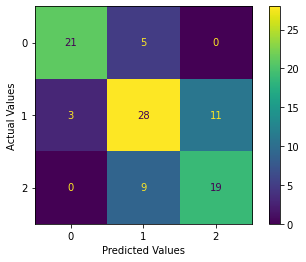

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

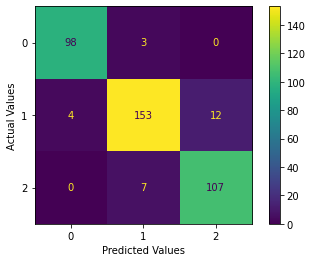

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

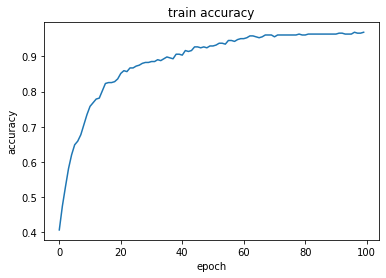

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

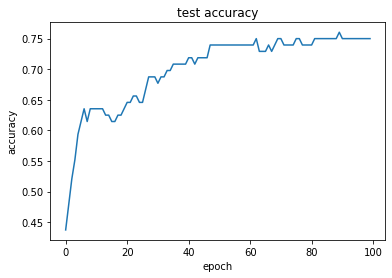

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

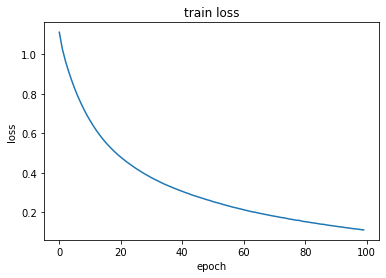

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

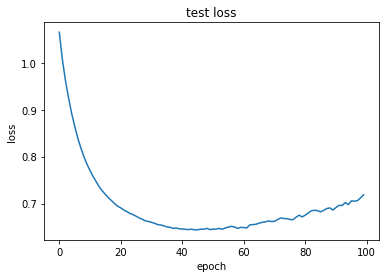

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#***Model 4-layer tanh RMS***

In [ ]:
model_4layer_tR = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'tanh'),
        keras.layers.Dense(32, activation = 'tanh'),
        keras.layers.Dense(16, activation = 'tanh'),
        keras.layers.Dense(3, activation = 'softmax')
    ]
)
model_4layer_tR.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_4layer_tR.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 9ms/step - loss: 1.1845 - accuracy: 0.3281 - val_loss: 1.1485 - val_accuracy: 0.3646
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1194 - accuracy: 0.3620 - val_loss: 1.0976 - val_accuracy: 0.4062
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 1.0667 - accuracy: 0.4193 - val_loss: 1.0540 - val_accuracy: 0.4271
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0193 - accuracy: 0.4766 - val_loss: 1.0193 - val_accuracy: 0.4583
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9796 - accuracy: 0.5104 - val_loss: 0.9881 - val_accuracy: 0.5000
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9451 - accuracy: 0.5339 - val_loss: 0.9596 - val_accuracy: 0.4896
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9133 - accuracy: 0.5599 - val_loss: 0.9357 - val_accuracy: 0.5000
Epoch 8/100
2

In [ ]:
predictions_test = model_4layer_tR.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_4layer_tR.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.687500
precision: 0.6909722222222222
recall; 0.7097069597069597
F1_score: 0.6977207977207976
confusion_matrix test: 
[[21  5  0]
 [ 7 24 11]
 [ 0  7 21]]
confusion_matrix train: 
[[ 99   2   0]
 [  5 152  12]
 [  0  13 101]]


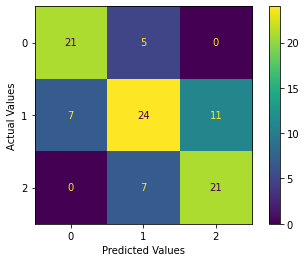

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

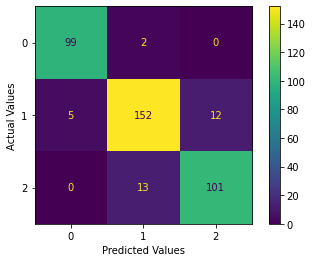

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

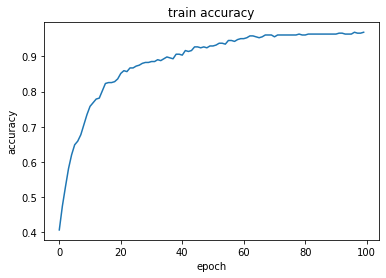

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

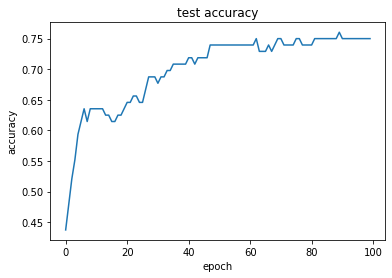

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

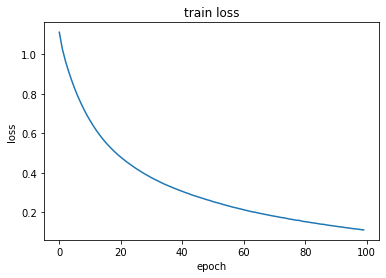

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

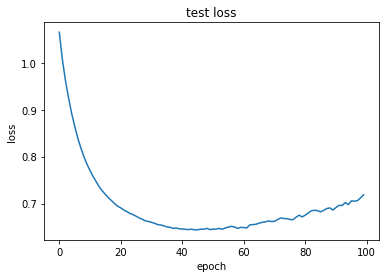

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#***Model 4-layer sigmoid SGD***

In [ ]:
model_4layer_sS = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'sigmoid'),
        keras.layers.Dense(32, activation = 'sigmoid'),
        keras.layers.Dense(16, activation = 'sigmoid'),
        keras.layers.Dense(3, activation = 'softmax')
    ]
)
model_4layer_sS.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.01), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_4layer_sS.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 1000, batch_size = 16)

Epoch 1/1000
24/24 [==============================] - 0s 8ms/step - loss: 1.1319 - accuracy: 0.4401 - val_loss: 1.1112 - val_accuracy: 0.4375
Epoch 2/1000
24/24 [==============================] - 0s 3ms/step - loss: 1.1018 - accuracy: 0.4401 - val_loss: 1.0918 - val_accuracy: 0.4375
Epoch 3/1000
24/24 [==============================] - 0s 2ms/step - loss: 1.0867 - accuracy: 0.4401 - val_loss: 1.0818 - val_accuracy: 0.4375
Epoch 4/1000
24/24 [==============================] - 0s 3ms/step - loss: 1.0796 - accuracy: 0.4401 - val_loss: 1.0777 - val_accuracy: 0.4375
Epoch 5/1000
24/24 [==============================] - 0s 3ms/step - loss: 1.0760 - accuracy: 0.4401 - val_loss: 1.0758 - val_accuracy: 0.4375
Epoch 6/1000
24/24 [==============================] - 0s 3ms/step - loss: 1.0745 - accuracy: 0.4401 - val_loss: 1.0749 - val_accuracy: 0.4375
Epoch 7/1000
24/24 [==============================] - 0s 2ms/step - loss: 1.0734 - accuracy: 0.4401 - val_loss: 1.0744 - val_accuracy: 0.4375
Epoch 

In [ ]:
predictions_test = model_4layer_sS.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_4layer_sS.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.739583
precision: 0.7557465453319852
recall; 0.7445054945054945
F1_score: 0.7487822715293014
confusion_matrix test: 
[[20  6  0]
 [ 3 30  9]
 [ 0  7 21]]
confusion_matrix train: 
[[ 95   6   0]
 [  8 148  13]
 [  0  11 103]]


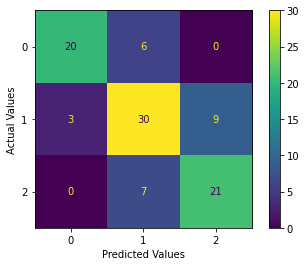

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

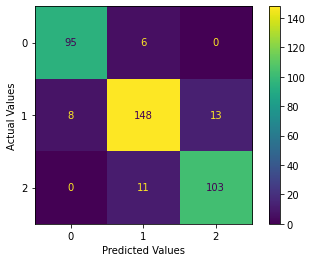

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

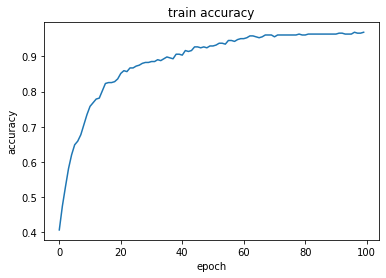

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

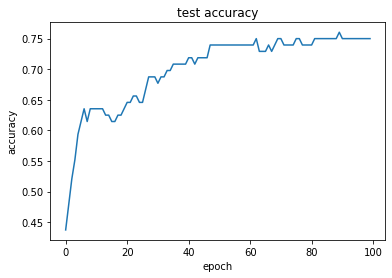

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

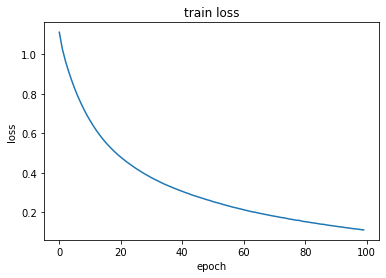

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

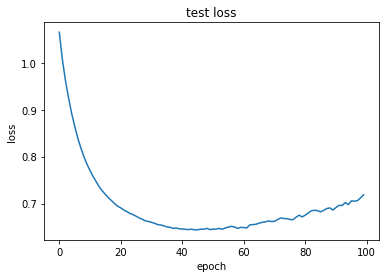

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#***Model 4-layer sigmoid Adam***

In [ ]:
model_4layer_sA = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'sigmoid'),
        keras.layers.Dense(32, activation = 'sigmoid'),
        keras.layers.Dense(16, activation = 'sigmoid'),
        keras.layers.Dense(3, activation = 'softmax')
    ]
)
model_4layer_sA.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_4layer_sA.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 1000, batch_size = 16)

Epoch 1/1000
24/24 [==============================] - 1s 9ms/step - loss: 1.0903 - accuracy: 0.4401 - val_loss: 1.0843 - val_accuracy: 0.4375
Epoch 2/1000
24/24 [==============================] - 0s 4ms/step - loss: 1.0837 - accuracy: 0.4401 - val_loss: 1.0802 - val_accuracy: 0.4375
Epoch 3/1000
24/24 [==============================] - 0s 3ms/step - loss: 1.0790 - accuracy: 0.4401 - val_loss: 1.0765 - val_accuracy: 0.4375
Epoch 4/1000
24/24 [==============================] - 0s 3ms/step - loss: 1.0751 - accuracy: 0.4401 - val_loss: 1.0727 - val_accuracy: 0.4375
Epoch 5/1000
24/24 [==============================] - 0s 3ms/step - loss: 1.0713 - accuracy: 0.4401 - val_loss: 1.0701 - val_accuracy: 0.4375
Epoch 6/1000
24/24 [==============================] - 0s 4ms/step - loss: 1.0682 - accuracy: 0.4401 - val_loss: 1.0675 - val_accuracy: 0.4375
Epoch 7/1000
24/24 [==============================] - 0s 3ms/step - loss: 1.0656 - accuracy: 0.4401 - val_loss: 1.0653 - val_accuracy: 0.4375
Epoch 

In [ ]:
predictions_test = model_4layer_sA.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_4layer_sA.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.739583
precision: 0.7482276552043995
recall; 0.7445054945054945
F1_score: 0.7462498286027698
confusion_matrix test: 
[[20  6  0]
 [ 6 30  6]
 [ 0  7 21]]
confusion_matrix train: 
[[100   1   0]
 [  3 159   7]
 [  0   5 109]]


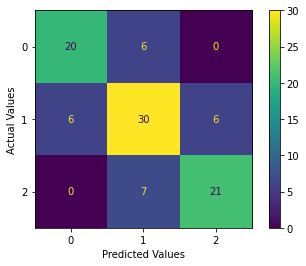

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

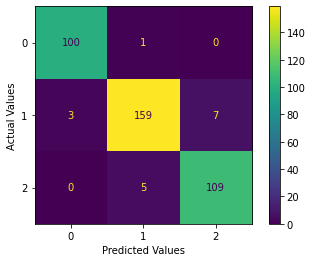

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

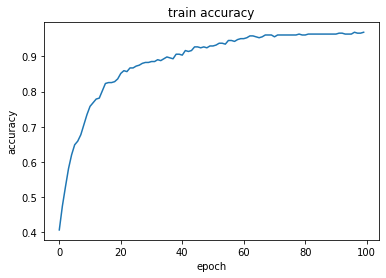

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

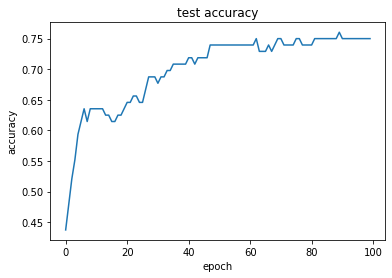

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

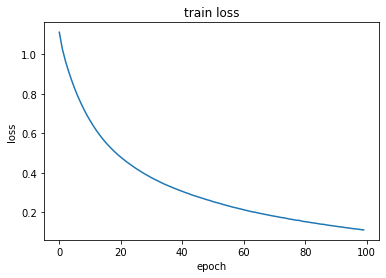

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

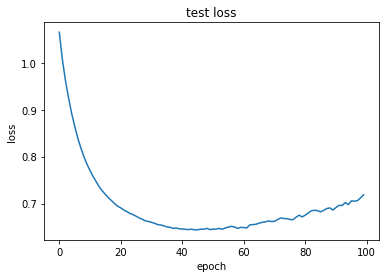

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#***Model 4-layer sigmoid RMS***

In [ ]:
model_4layer_sR = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'sigmoid'),
        keras.layers.Dense(32, activation = 'sigmoid'),
        keras.layers.Dense(16, activation = 'sigmoid'),
        keras.layers.Dense(3, activation = 'softmax')
    ]
)
model_4layer_sR.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_4layer_sR.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 1000, batch_size = 16)

Epoch 1/1000
24/24 [==============================] - 1s 8ms/step - loss: 1.1525 - accuracy: 0.2630 - val_loss: 1.1409 - val_accuracy: 0.2708
Epoch 2/1000
24/24 [==============================] - 0s 3ms/step - loss: 1.1350 - accuracy: 0.2630 - val_loss: 1.1270 - val_accuracy: 0.2708
Epoch 3/1000
24/24 [==============================] - 0s 3ms/step - loss: 1.1210 - accuracy: 0.2630 - val_loss: 1.1143 - val_accuracy: 0.2708
Epoch 4/1000
24/24 [==============================] - 0s 3ms/step - loss: 1.1089 - accuracy: 0.2865 - val_loss: 1.1039 - val_accuracy: 0.2708
Epoch 5/1000
24/24 [==============================] - 0s 3ms/step - loss: 1.0990 - accuracy: 0.3255 - val_loss: 1.0954 - val_accuracy: 0.3958
Epoch 6/1000
24/24 [==============================] - 0s 3ms/step - loss: 1.0907 - accuracy: 0.4531 - val_loss: 1.0882 - val_accuracy: 0.4271
Epoch 7/1000
24/24 [==============================] - 0s 3ms/step - loss: 1.0836 - accuracy: 0.4740 - val_loss: 1.0821 - val_accuracy: 0.4583
Epoch 

In [ ]:
predictions_test = model_4layer_sR.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_4layer_sR.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 5-layer model Relu SGD**

In [ ]:
model_5layer_RS = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'relu'),
        keras.layers.Dense(32, activation = 'relu'),
        keras.layers.Dense(16, activation = 'relu'),
        keras.layers.Dense(8, activation = 'relu'),
        keras.layers.Dense(3, activation = 'softmax')
    ]
)
model_5layer_RS.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.01), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_5layer_RS.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

In [ ]:
predictions_test = model_5layer_RS.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_5layer_RS.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 5-layer model Relu Adam**

In [ ]:
model_5layer_RA = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'relu'),
        keras.layers.Dense(32, activation = 'relu'),
        keras.layers.Dense(16, activation = 'relu'),
        keras.layers.Dense(8, activation = 'relu'),
        keras.layers.Dense(3, activation = 'softmax')
    ]
)
model_5layer_RA.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_5layer_RA.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

In [ ]:
predictions_test = model_5layer_RA.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_5layer_RA.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

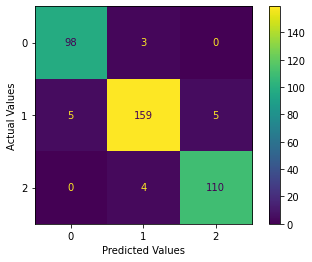

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

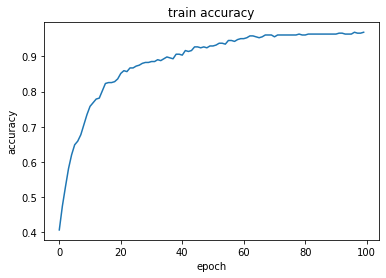

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

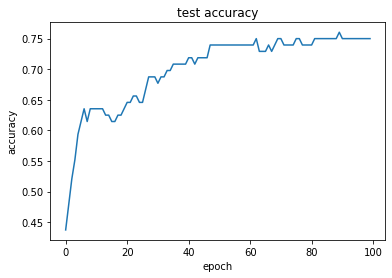

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

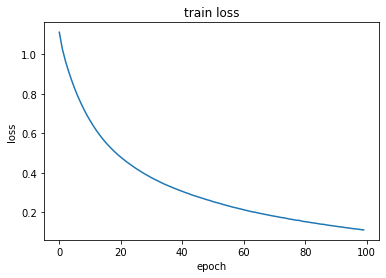

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

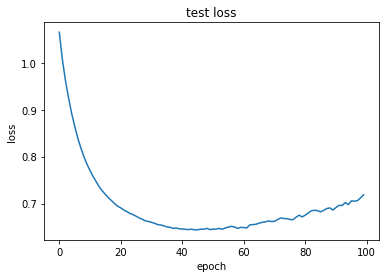

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 5-layer model Relu RSM**

In [ ]:
model_5layer_RR = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'relu'),
        keras.layers.Dense(32, activation = 'relu'),
        keras.layers.Dense(16, activation = 'relu'),
        keras.layers.Dense(8, activation = 'relu'),
        keras.layers.Dense(3, activation = 'softmax')
    ]
)
model_5layer_RR.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_5layer_RR.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 9ms/step - loss: 1.1805 - accuracy: 0.2812 - val_loss: 1.1838 - val_accuracy: 0.2188
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1391 - accuracy: 0.2865 - val_loss: 1.1597 - val_accuracy: 0.2083
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1131 - accuracy: 0.3177 - val_loss: 1.1415 - val_accuracy: 0.2396
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0941 - accuracy: 0.3411 - val_loss: 1.1271 - val_accuracy: 0.2604
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0784 - accuracy: 0.3594 - val_loss: 1.1152 - val_accuracy: 0.2500
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0647 - accuracy: 0.4010 - val_loss: 1.1040 - val_accuracy: 0.2604
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 1.0517 - accuracy: 0.4219 - val_loss: 1.0945 - val_accuracy: 0.2604
Epoch 8/100
2

In [ ]:
predictions_test = model_5layer_RR.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_5layer_RR.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.729167
precision: 0.7454106280193237
recall; 0.7405372405372406
F1_score: 0.7401882784301245
confusion_matrix test: 
[[20  6  0]
 [ 3 28 11]
 [ 0  6 22]]
confusion_matrix train: 
[[ 97   4   0]
 [  3 157   9]
 [  0   9 105]]


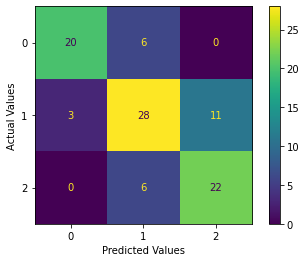

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

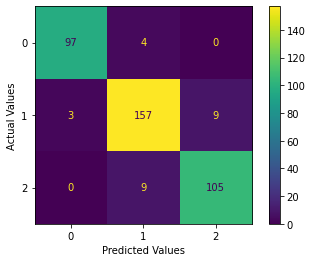

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

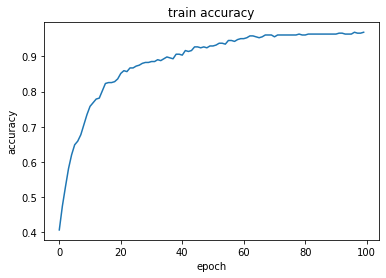

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

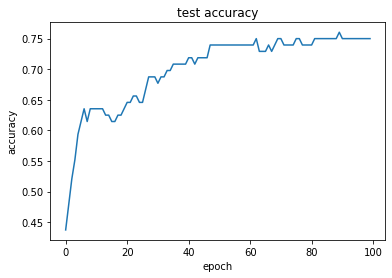

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

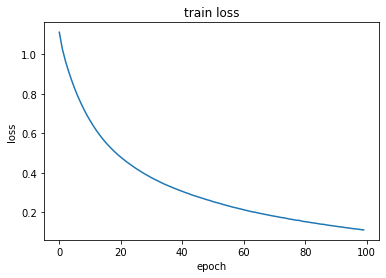

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

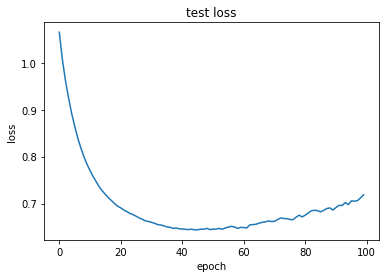

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 5-layer model tanh SGD**

In [ ]:
model_5layer_tS = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'tanh'),
        keras.layers.Dense(32, activation = 'tanh'),
        keras.layers.Dense(16, activation = 'tanh'),
        keras.layers.Dense(8, activation = 'tanh'),
        keras.layers.Dense(3, activation = 'softmax')
    ]
)
model_5layer_tS.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.01), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_5layer_tS.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 8ms/step - loss: 1.1912 - accuracy: 0.3594 - val_loss: 1.0866 - val_accuracy: 0.4062
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0047 - accuracy: 0.4635 - val_loss: 0.9772 - val_accuracy: 0.4792
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8946 - accuracy: 0.5312 - val_loss: 0.9095 - val_accuracy: 0.5417
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8261 - accuracy: 0.5859 - val_loss: 0.8635 - val_accuracy: 0.5312
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7762 - accuracy: 0.6276 - val_loss: 0.8288 - val_accuracy: 0.5521
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7374 - accuracy: 0.6589 - val_loss: 0.8011 - val_accuracy: 0.5625
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7061 - accuracy: 0.6849 - val_loss: 0.7776 - val_accuracy: 0.5729
Epoch 8/100
2

In [ ]:
predictions_test = model_5layer_tS.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_5layer_tS.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.770833
precision: 0.7857971014492753
recall; 0.7683150183150182
F1_score: 0.7755888518929585
confusion_matrix test: 
[[20  6  0]
 [ 5 33  4]
 [ 0  7 21]]
confusion_matrix train: 
[[100   1   0]
 [  1 167   1]
 [  0   1 113]]


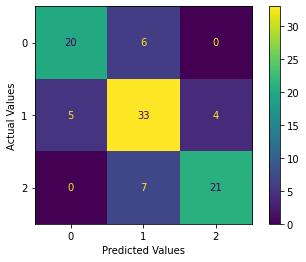

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

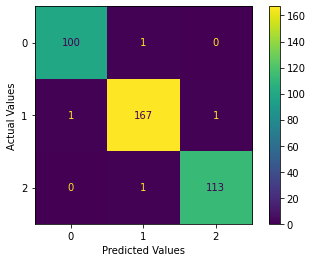

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

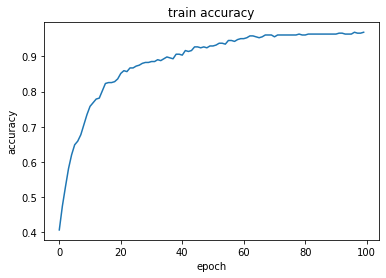

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

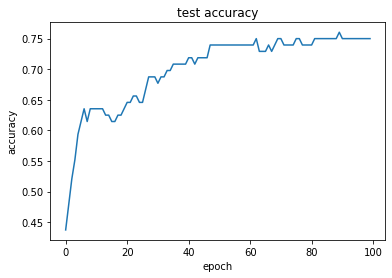

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

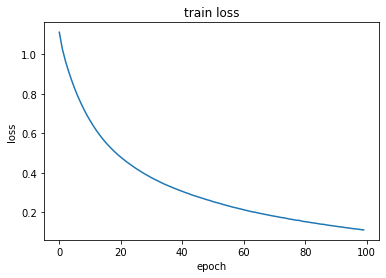

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

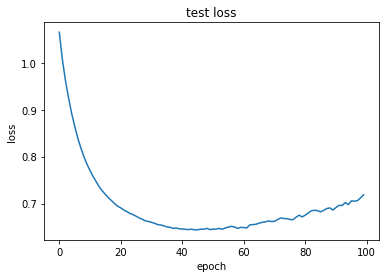

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 5-layer model tanh Adam**

In [ ]:
model_5layer_tA = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'tanh'),
        keras.layers.Dense(32, activation = 'tanh'),
        keras.layers.Dense(16, activation = 'tanh'),
        keras.layers.Dense(8, activation = 'tanh'),
        keras.layers.Dense(3, activation = 'softmax')
    ]
)
model_5layer_tA.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_5layer_tA.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 9ms/step - loss: 1.0586 - accuracy: 0.4453 - val_loss: 1.0683 - val_accuracy: 0.4062
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0079 - accuracy: 0.4974 - val_loss: 1.0280 - val_accuracy: 0.5000
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9652 - accuracy: 0.5417 - val_loss: 0.9954 - val_accuracy: 0.5417
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9282 - accuracy: 0.5755 - val_loss: 0.9675 - val_accuracy: 0.5312
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8945 - accuracy: 0.5990 - val_loss: 0.9406 - val_accuracy: 0.5625
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8658 - accuracy: 0.6172 - val_loss: 0.9195 - val_accuracy: 0.5625
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8393 - accuracy: 0.6380 - val_loss: 0.8988 - val_accuracy: 0.5625
Epoch 8/100
2

In [ ]:
predictions_test = model_5layer_tA.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_5layer_tA.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.666667
precision: 0.6793010752688172
recall; 0.6810134310134309
F1_score: 0.6793792065537804
confusion_matrix test: 
[[20  6  0]
 [ 5 25 12]
 [ 0  9 19]]
confusion_matrix train: 
[[ 98   3   0]
 [  4 156   9]
 [  0   7 107]]


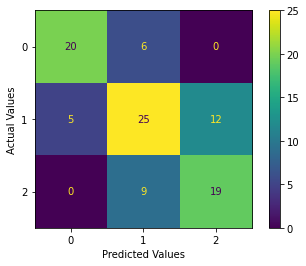

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

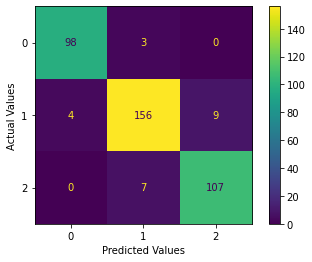

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

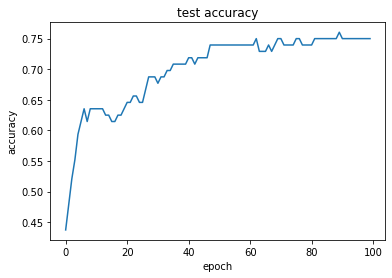

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

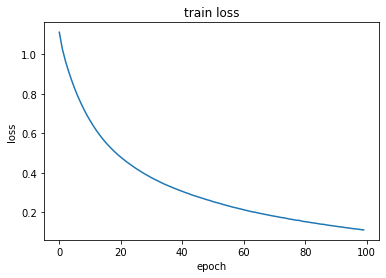

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

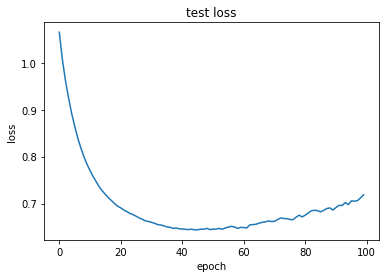

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 5-layer model tanh RMS**

In [ ]:
model_5layer_tR = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'tanh'),
        keras.layers.Dense(32, activation = 'tanh'),
        keras.layers.Dense(16, activation = 'tanh'),
        keras.layers.Dense(8, activation = 'tanh'),
        keras.layers.Dense(3, activation = 'softmax')
    ]
)
model_5layer_tR.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_5layer_tR.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 8ms/step - loss: 1.1703 - accuracy: 0.3672 - val_loss: 1.1881 - val_accuracy: 0.3646
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1127 - accuracy: 0.3958 - val_loss: 1.1393 - val_accuracy: 0.3958
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0660 - accuracy: 0.4401 - val_loss: 1.0964 - val_accuracy: 0.3958
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0248 - accuracy: 0.4635 - val_loss: 1.0595 - val_accuracy: 0.3958
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9862 - accuracy: 0.5000 - val_loss: 1.0248 - val_accuracy: 0.4167
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9514 - accuracy: 0.5234 - val_loss: 0.9935 - val_accuracy: 0.4375
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9191 - accuracy: 0.5573 - val_loss: 0.9654 - val_accuracy: 0.4583
Epoch 8/100
2

In [ ]:
predictions_test = model_5layer_tR.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_5layer_tR.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.697917
precision: 0.7092075356237433
recall; 0.7078754578754579
F1_score: 0.7074889388060718
confusion_matrix test: 
[[19  7  0]
 [ 5 27 10]
 [ 0  7 21]]
confusion_matrix train: 
[[ 98   3   0]
 [  5 152  12]
 [  0   7 107]]


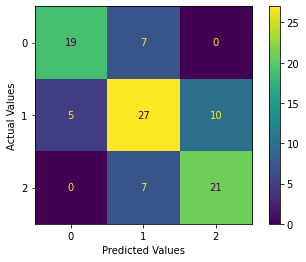

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

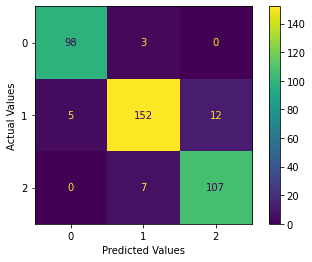

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

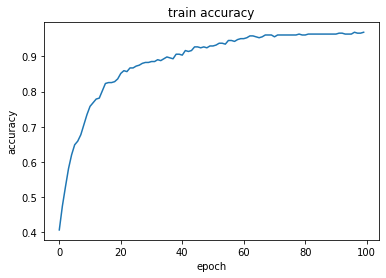

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

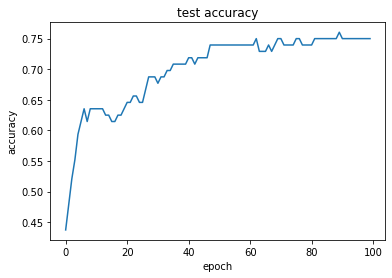

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

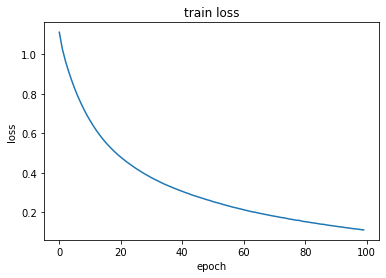

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

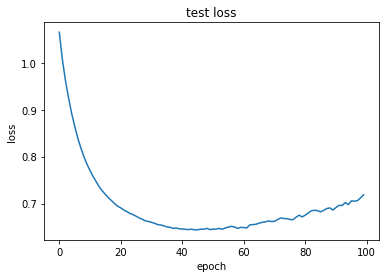

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 5-layer model sigmoid SGD**

In [ ]:
model_5layer_sS = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'sigmoid'),
        keras.layers.Dense(32, activation = 'sigmoid'),
        keras.layers.Dense(16, activation = 'sigmoid'),
        keras.layers.Dense(8, activation = 'sigmoid'),
        keras.layers.Dense(3, activation = 'softmax')
    ]
)
model_5layer_sS.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.01), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_5layer_sS.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 1000, batch_size = 16)

Epoch 1/1000
24/24 [==============================] - 1s 8ms/step - loss: 1.2578 - accuracy: 0.2969 - val_loss: 1.2149 - val_accuracy: 0.2917
Epoch 2/1000
24/24 [==============================] - 0s 3ms/step - loss: 1.1857 - accuracy: 0.2969 - val_loss: 1.1581 - val_accuracy: 0.2917
Epoch 3/1000
24/24 [==============================] - 0s 3ms/step - loss: 1.1399 - accuracy: 0.2969 - val_loss: 1.1233 - val_accuracy: 0.2917
Epoch 4/1000
24/24 [==============================] - 0s 3ms/step - loss: 1.1119 - accuracy: 0.2969 - val_loss: 1.1021 - val_accuracy: 0.2917
Epoch 5/1000
24/24 [==============================] - 0s 3ms/step - loss: 1.0956 - accuracy: 0.2969 - val_loss: 1.0903 - val_accuracy: 0.2604
Epoch 6/1000
24/24 [==============================] - 0s 3ms/step - loss: 1.0859 - accuracy: 0.4271 - val_loss: 1.0833 - val_accuracy: 0.4375
Epoch 7/1000
24/24 [==============================] - 0s 3ms/step - loss: 1.0805 - accuracy: 0.4401 - val_loss: 1.0793 - val_accuracy: 0.4375
Epoch 

In [ ]:
predictions_test = model_5layer_sS.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_5layer_sS.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 5-layer model sigmoid Adam**

In [ ]:
model_5layer_sA = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'sigmoid'),
        keras.layers.Dense(32, activation = 'sigmoid'),
        keras.layers.Dense(16, activation = 'sigmoid'),
        keras.layers.Dense(8, activation = 'sigmoid'),
        keras.layers.Dense(3, activation = 'softmax')
    ]
)
model_5layer_sA.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_5layer_sA.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 1000, batch_size = 16)

In [ ]:
predictions_test = model_5layer_sA.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_5layer_sA.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 5-layer model sigmoid RMS**

In [ ]:
model_5layer_sR = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'sigmoid'),
        keras.layers.Dense(32, activation = 'sigmoid'),
        keras.layers.Dense(16, activation = 'sigmoid'),
        keras.layers.Dense(8, activation = 'sigmoid'),
        keras.layers.Dense(3, activation = 'softmax')
    ]
)
model_5layer_sR.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_5layer_sR.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 1000, batch_size = 16)

In [ ]:
predictions_test = model_5layer_sR.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_5layer_sR.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

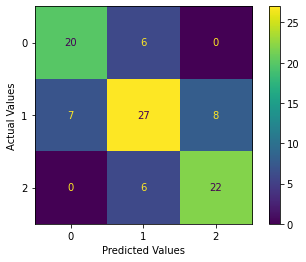

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 3-layer model Relu SGD Batch normalization**

In [ ]:
model_3layer_RSB = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(32, activation = 'relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_3layer_RSB.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_3layer_RSB.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

In [ ]:
predictions_test = model_3layer_RSB.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_3layer_RSB.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 3-layer model Relu Adam Batch normalization**

In [ ]:
model_3layer_RAB = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(32, activation = 'relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_3layer_RAB.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_3layer_RAB.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

In [ ]:
predictions_test = model_3layer_RAB.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_3layer_RAB.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 3-layer model Relu RMS Batch normalization**

In [ ]:
model_3layer_RRB = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(32, activation = 'relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_3layer_RRB.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_3layer_RRB.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

In [ ]:
predictions_test = model_3layer_RRB.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_3layer_RRB.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 3-layer model tanh SGD Batch normalization**

In [ ]:
model_3layer_tSB = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'tanh'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(32, activation = 'tanh'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_3layer_tSB.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_3layer_tSB.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

In [ ]:
predictions_test = model_3layer_tSB.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_3layer_tSB.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

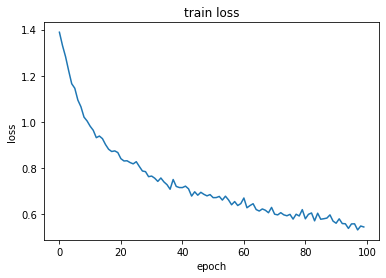

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 3-layer model tanh Adam Batch normalization**

In [ ]:
model_3layer_tAB = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'tanh'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(32, activation = 'tanh'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_3layer_tAB.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_3layer_tAB.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

In [ ]:
predictions_test = model_3layer_tAB.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_3layer_tAB.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 3-layer model tanh RMS Batch normalization**

In [ ]:
model_3layer_tRB = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'tanh'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(32, activation = 'tanh'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_3layer_tRB.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_3layer_tRB.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

In [ ]:
predictions_test = model_3layer_tRB.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_3layer_tRB.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.750000
precision: 0.7579372674109516
recall; 0.7652625152625152
F1_score: 0.7592092574734811
confusion_matrix test: 
[[21  5  0]
 [ 4 28 10]
 [ 0  5 23]]
confusion_matrix train: 
[[ 98   3   0]
 [  8 149  12]
 [  0   8 106]]


In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 3-layer model sigmoid SGD Batch normalization**

In [ ]:
model_3layer_sSB = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'sigmoid'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(32, activation = 'sigmoid'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_3layer_sSB.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_3layer_sSB.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 9ms/step - loss: 1.3561 - accuracy: 0.3464 - val_loss: 1.4736 - val_accuracy: 0.2708
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 1.2861 - accuracy: 0.3750 - val_loss: 1.4091 - val_accuracy: 0.3125
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1835 - accuracy: 0.4089 - val_loss: 1.3513 - val_accuracy: 0.3333
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1686 - accuracy: 0.4557 - val_loss: 1.2979 - val_accuracy: 0.3646
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1178 - accuracy: 0.4661 - val_loss: 1.2483 - val_accuracy: 0.3958
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0416 - accuracy: 0.4896 - val_loss: 1.2017 - val_accuracy: 0.4167
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0181 - accuracy: 0.4948 - val_loss: 1.1573 - val_accuracy: 0.4375
Epoch 8/100
2

In [ ]:
predictions_test = model_3layer_sSB.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_3layer_sSB.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

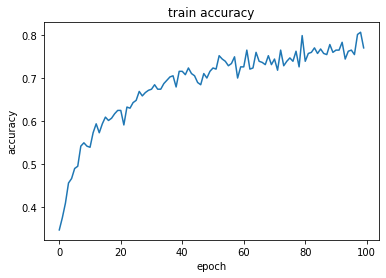

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

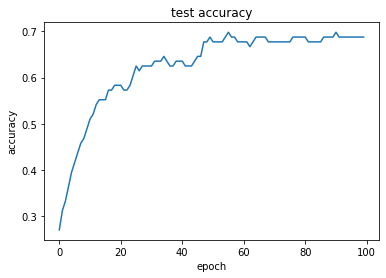

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

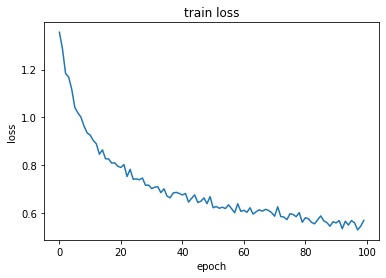

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

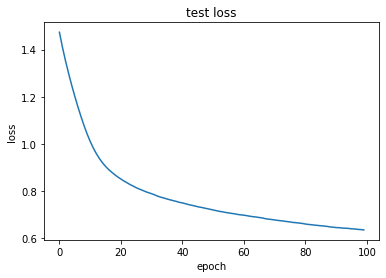

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 3-layer model sigmoid Adam Batch normalization**

In [ ]:
model_3layer_sAB = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'sigmoid'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(32, activation = 'sigmoid'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_3layer_sAB.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_3layer_sAB.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 10ms/step - loss: 1.6456 - accuracy: 0.3438 - val_loss: 1.2266 - val_accuracy: 0.2917
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 1.4267 - accuracy: 0.3594 - val_loss: 1.1983 - val_accuracy: 0.2917
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 1.3223 - accuracy: 0.4141 - val_loss: 1.1724 - val_accuracy: 0.2917
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1794 - accuracy: 0.4557 - val_loss: 1.1454 - val_accuracy: 0.2917
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1320 - accuracy: 0.4818 - val_loss: 1.1181 - val_accuracy: 0.2917
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0835 - accuracy: 0.5078 - val_loss: 1.0890 - val_accuracy: 0.3125
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0571 - accuracy: 0.5130 - val_loss: 1.0593 - val_accuracy: 0.3542
Epoch 8/100


In [ ]:
predictions_test = model_3layer_sAB.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_3layer_sAB.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

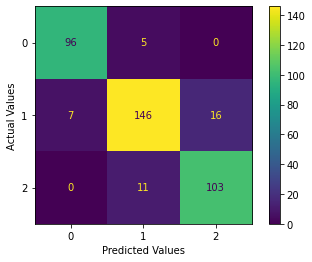

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

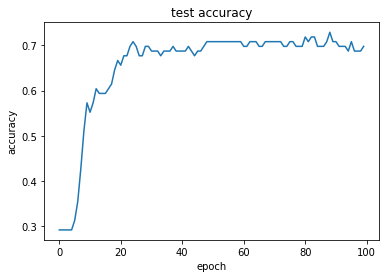

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

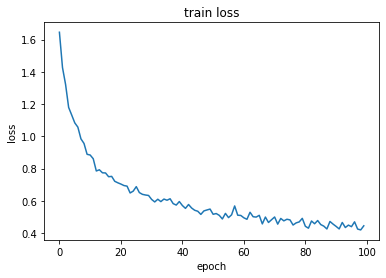

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

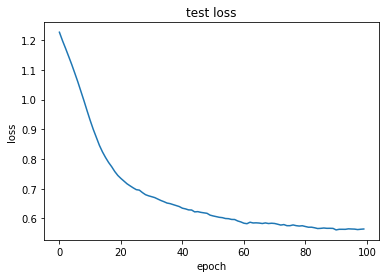

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 3-layer model sigmoid RMS Batch normalization**

In [ ]:
model_3layer_sRB = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'sigmoid'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(32, activation = 'sigmoid'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_3layer_sRB.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_3layer_sRB.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 11ms/step - loss: 1.8149 - accuracy: 0.2708 - val_loss: 1.2933 - val_accuracy: 0.2917
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 1.6294 - accuracy: 0.3281 - val_loss: 1.2579 - val_accuracy: 0.2917
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 1.5019 - accuracy: 0.3177 - val_loss: 1.2269 - val_accuracy: 0.2917
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 1.3731 - accuracy: 0.3984 - val_loss: 1.1999 - val_accuracy: 0.2917
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 1.2599 - accuracy: 0.4167 - val_loss: 1.1730 - val_accuracy: 0.2917
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 1.2067 - accuracy: 0.4896 - val_loss: 1.1463 - val_accuracy: 0.3125
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1024 - accuracy: 0.4896 - val_loss: 1.1200 - val_accuracy: 0.3646
Epoch 8/100


In [ ]:
predictions_test = model_3layer_sRB.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_3layer_sRB.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

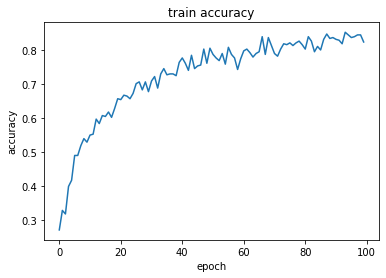

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

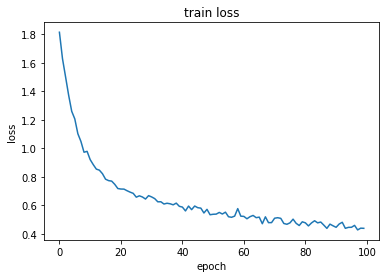

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

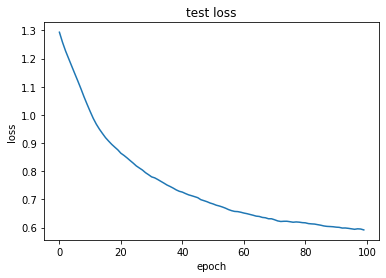

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 4-layer model Relu SGD Batch normalization**

In [ ]:
model_4layer_RSB = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(32, activation = 'relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(16, activation = 'relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_4layer_RSB.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_4layer_RSB.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 11ms/step - loss: 1.5496 - accuracy: 0.3698 - val_loss: 1.4805 - val_accuracy: 0.3229
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 1.5261 - accuracy: 0.3646 - val_loss: 1.3398 - val_accuracy: 0.3438
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 1.4066 - accuracy: 0.3724 - val_loss: 1.2724 - val_accuracy: 0.3854
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 1.3356 - accuracy: 0.4219 - val_loss: 1.2411 - val_accuracy: 0.3854
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 1.2925 - accuracy: 0.4297 - val_loss: 1.2172 - val_accuracy: 0.4375
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 1.2962 - accuracy: 0.3958 - val_loss: 1.2055 - val_accuracy: 0.4271
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 1.2248 - accuracy: 0.4349 - val_loss: 1.2005 - val_accuracy: 0.4583
Epoch 8/100


In [ ]:
predictions_test = model_4layer_RSB.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_4layer_RSB.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

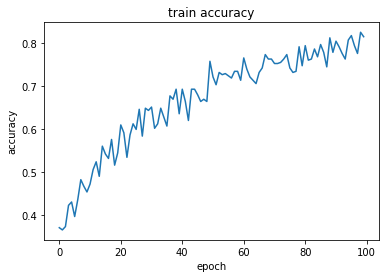

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

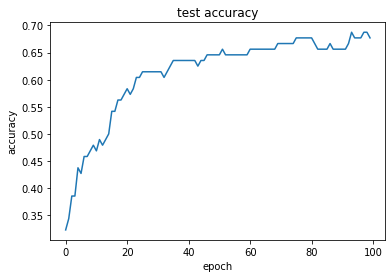

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

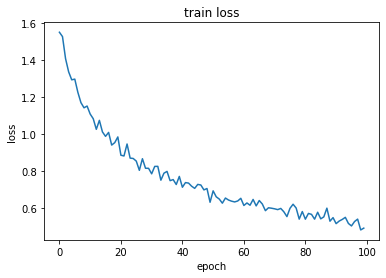

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

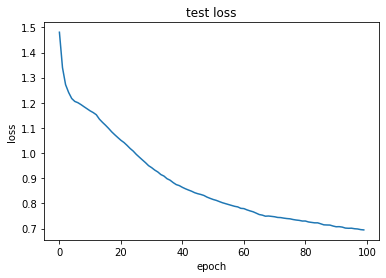

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 4-layer model Relu Adam Batch normalization**

In [ ]:
model_4layer_RAB = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(32, activation = 'relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(16, activation = 'relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_4layer_RAB.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_4layer_RAB.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 11ms/step - loss: 1.5936 - accuracy: 0.3438 - val_loss: 1.2343 - val_accuracy: 0.2708
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 1.5520 - accuracy: 0.3620 - val_loss: 1.2288 - val_accuracy: 0.2708
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 1.4532 - accuracy: 0.3828 - val_loss: 1.2206 - val_accuracy: 0.3125
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 1.4307 - accuracy: 0.3854 - val_loss: 1.2112 - val_accuracy: 0.3854
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 1.3012 - accuracy: 0.4245 - val_loss: 1.2058 - val_accuracy: 0.3958
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 1.3556 - accuracy: 0.3906 - val_loss: 1.1967 - val_accuracy: 0.4271
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 1.2610 - accuracy: 0.4271 - val_loss: 1.1914 - val_accuracy: 0.4375
Epoch 8/100


In [ ]:
predictions_test = model_4layer_RAB.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_4layer_RAB.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

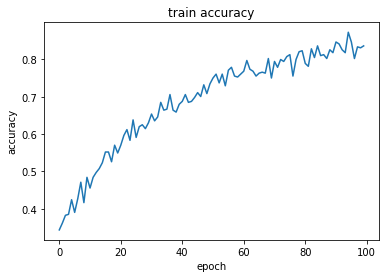

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

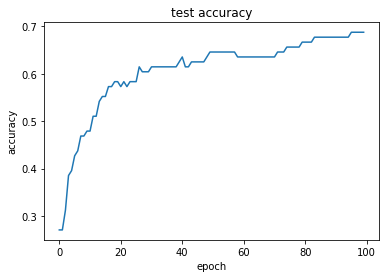

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

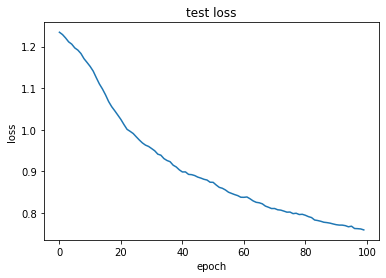

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 4-layer model Relu RMS Batch normalization**

In [ ]:
model_4layer_RRB = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(32, activation = 'relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(16, activation = 'relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_4layer_RRB.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_4layer_RRB.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 11ms/step - loss: 1.5277 - accuracy: 0.3698 - val_loss: 1.0454 - val_accuracy: 0.4167
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 1.4752 - accuracy: 0.3594 - val_loss: 1.0265 - val_accuracy: 0.4583
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 1.4063 - accuracy: 0.3802 - val_loss: 1.0149 - val_accuracy: 0.5208
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 1.3858 - accuracy: 0.3880 - val_loss: 1.0021 - val_accuracy: 0.5208
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 1.3024 - accuracy: 0.4271 - val_loss: 0.9935 - val_accuracy: 0.5312
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 1.2282 - accuracy: 0.4349 - val_loss: 0.9856 - val_accuracy: 0.5312
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 1.1894 - accuracy: 0.4505 - val_loss: 0.9781 - val_accuracy: 0.5729
Epoch 8/100


In [ ]:
predictions_test = model_4layer_RRB.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_4layer_RRB.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

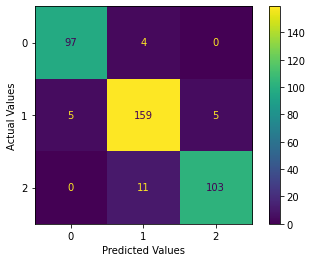

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

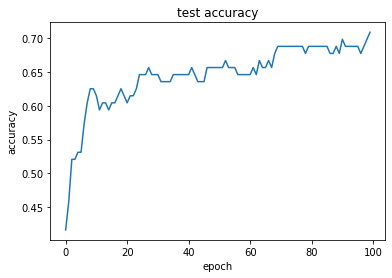

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

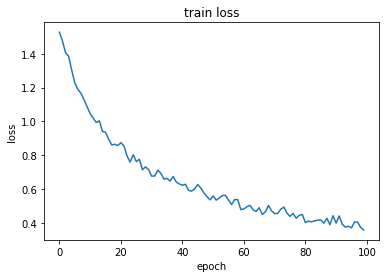

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

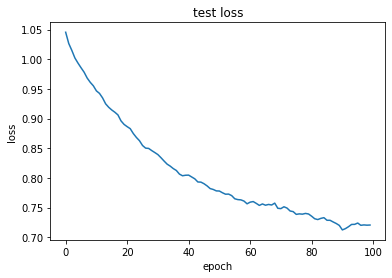

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 4-layer model tanh SGD Batch normalization**

In [ ]:
model_4layer_tSB = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'tanh'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(32, activation = 'tanh'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(16, activation = 'tanh'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_4layer_tSB.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_4layer_tSB.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 10ms/step - loss: 1.2717 - accuracy: 0.4245 - val_loss: 1.1061 - val_accuracy: 0.4271
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1960 - accuracy: 0.4271 - val_loss: 1.0936 - val_accuracy: 0.4375
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1441 - accuracy: 0.4635 - val_loss: 1.0800 - val_accuracy: 0.4583
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1061 - accuracy: 0.4479 - val_loss: 1.0655 - val_accuracy: 0.4479
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0793 - accuracy: 0.4740 - val_loss: 1.0520 - val_accuracy: 0.4583
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0406 - accuracy: 0.4714 - val_loss: 1.0372 - val_accuracy: 0.4583
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0142 - accuracy: 0.5078 - val_loss: 1.0240 - val_accuracy: 0.5104
Epoch 8/100


In [ ]:
predictions_test = model_4layer_tSB.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_4layer_tSB.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

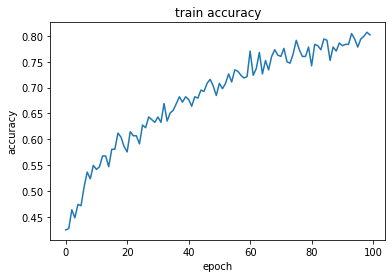

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

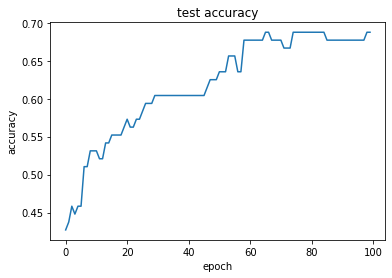

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

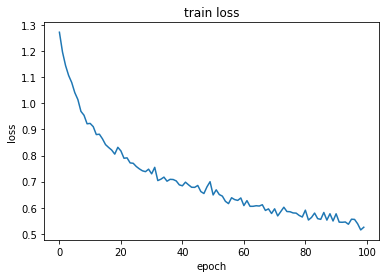

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

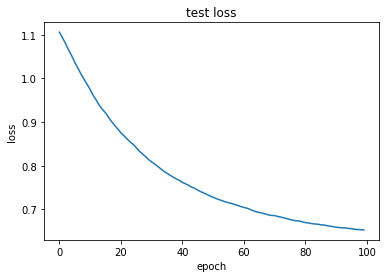

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 4-layer model tanh Adam Batch normalization**

In [ ]:
model_4layer_tAB = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'tanh'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(32, activation = 'tanh'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(16, activation = 'tanh'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_4layer_tAB.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_4layer_tAB.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 10ms/step - loss: 1.3144 - accuracy: 0.3151 - val_loss: 1.1501 - val_accuracy: 0.3333
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1801 - accuracy: 0.3672 - val_loss: 1.1051 - val_accuracy: 0.3854
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 1.1107 - accuracy: 0.3932 - val_loss: 1.0657 - val_accuracy: 0.3958
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 1.0523 - accuracy: 0.4193 - val_loss: 1.0368 - val_accuracy: 0.4167
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 1.0059 - accuracy: 0.4635 - val_loss: 1.0117 - val_accuracy: 0.4583
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9333 - accuracy: 0.5339 - val_loss: 0.9898 - val_accuracy: 0.4688
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 0.9455 - accuracy: 0.5156 - val_loss: 0.9693 - val_accuracy: 0.5000
Epoch 8/100


In [ ]:
predictions_test = model_4layer_tAB.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_4layer_tAB.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

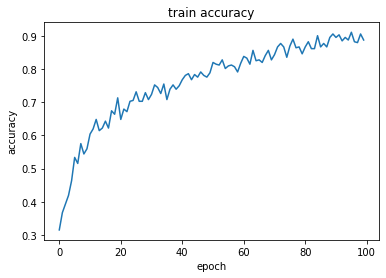

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

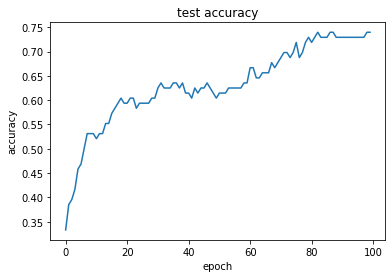

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

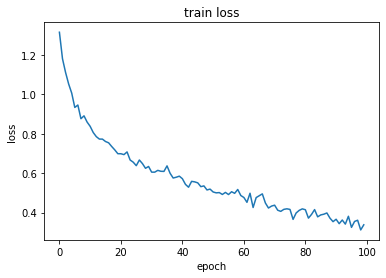

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

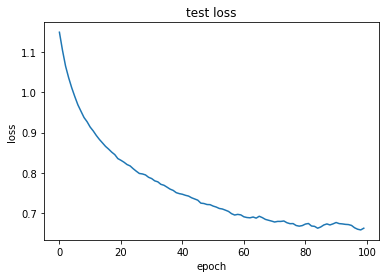

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 4-layer model tanh RMS Batch normalization**

In [ ]:
model_4layer_tRB = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'tanh'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(32, activation = 'tanh'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(16, activation = 'tanh'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_4layer_tRB.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_4layer_tRB.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

In [ ]:
predictions_test = model_4layer_tRB.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_4layer_tRB.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.697917
precision: 0.7106227106227107
recall; 0.7225274725274725
F1_score: 0.712065712065712
confusion_matrix test: 
[[22  4  0]
 [ 4 24 14]
 [ 0  7 21]]
confusion_matrix train: 
[[ 99   2   0]
 [  5 160   4]
 [  0   2 112]]


In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

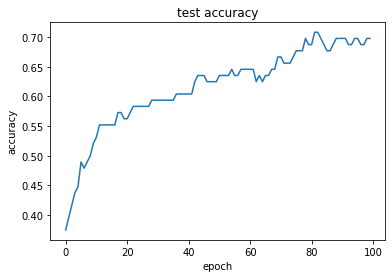

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

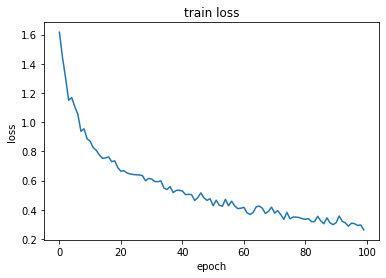

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

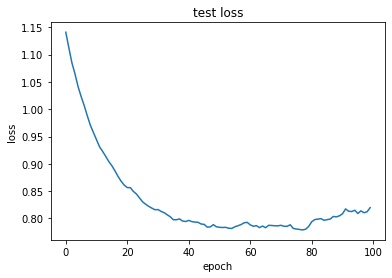

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 4-layer model sigmoid SGD Batch normalization**

In [ ]:
model_4layer_sSB = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'sigmoid'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(32, activation = 'sigmoid'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(16, activation = 'sigmoid'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_4layer_sSB.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_4layer_sSB.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 10ms/step - loss: 1.7374 - accuracy: 0.2266 - val_loss: 1.1915 - val_accuracy: 0.2708
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 1.5961 - accuracy: 0.2656 - val_loss: 1.1630 - val_accuracy: 0.2708
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 1.4911 - accuracy: 0.2865 - val_loss: 1.1425 - val_accuracy: 0.2812
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 1.4229 - accuracy: 0.2969 - val_loss: 1.1281 - val_accuracy: 0.3125
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 1.3550 - accuracy: 0.3229 - val_loss: 1.1179 - val_accuracy: 0.3646
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 1.3009 - accuracy: 0.3672 - val_loss: 1.1109 - val_accuracy: 0.3750
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 1.2538 - accuracy: 0.3307 - val_loss: 1.1055 - val_accuracy: 0.3750
Epoch 8/100


In [ ]:
predictions_test = model_4layer_sSB.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_4layer_sSB.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

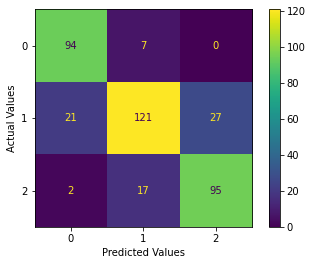

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

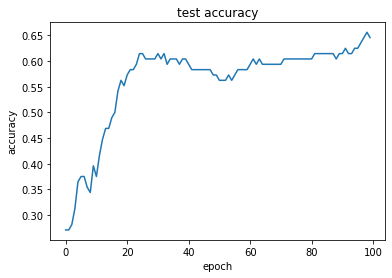

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

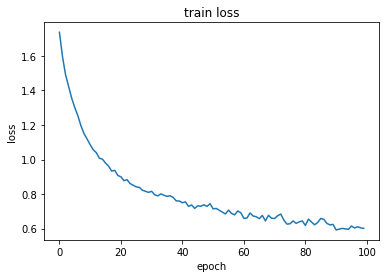

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

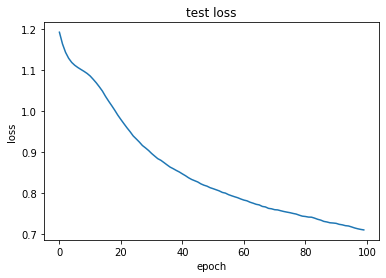

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 4-layer model sigmoid Adam Batch normalization**

In [ ]:
model_4layer_sAB = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'sigmoid'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(32, activation = 'sigmoid'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(16, activation = 'sigmoid'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_4layer_sAB.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_4layer_sAB.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 11ms/step - loss: 1.5900 - accuracy: 0.3646 - val_loss: 1.2591 - val_accuracy: 0.2917
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 1.4113 - accuracy: 0.3932 - val_loss: 1.2095 - val_accuracy: 0.2917
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 1.2479 - accuracy: 0.4740 - val_loss: 1.1698 - val_accuracy: 0.2917
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 1.1180 - accuracy: 0.5000 - val_loss: 1.1360 - val_accuracy: 0.2917
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0872 - accuracy: 0.4818 - val_loss: 1.1062 - val_accuracy: 0.2917
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0090 - accuracy: 0.5156 - val_loss: 1.0780 - val_accuracy: 0.3021
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 0.9114 - accuracy: 0.5755 - val_loss: 1.0504 - val_accuracy: 0.3125
Epoch 8/100


In [ ]:
predictions_test = model_4layer_sAB.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_4layer_sAB.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

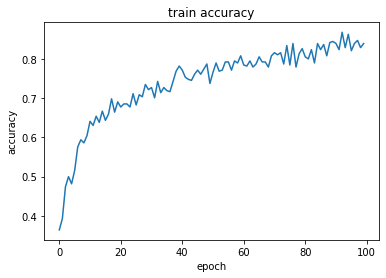

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

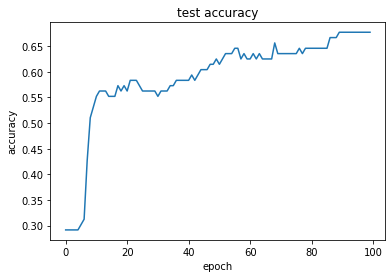

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

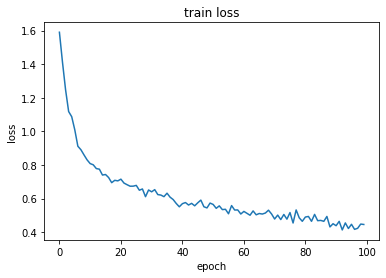

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

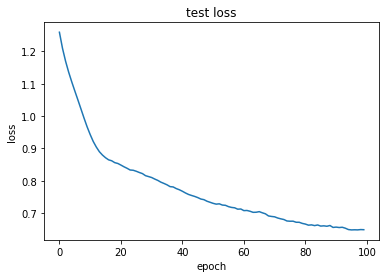

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 4-layer model sigmoid RMS Batch normalization**

In [ ]:
model_4layer_sRB = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'sigmoid'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(32, activation = 'sigmoid'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(16, activation = 'sigmoid'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_4layer_sRB.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_4layer_sRB.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 11ms/step - loss: 1.4612 - accuracy: 0.3698 - val_loss: 1.5534 - val_accuracy: 0.2708
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 1.3119 - accuracy: 0.4141 - val_loss: 1.4766 - val_accuracy: 0.2708
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1878 - accuracy: 0.4583 - val_loss: 1.4088 - val_accuracy: 0.2708
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1174 - accuracy: 0.4792 - val_loss: 1.3490 - val_accuracy: 0.2708
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0388 - accuracy: 0.4896 - val_loss: 1.2925 - val_accuracy: 0.2708
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9949 - accuracy: 0.5000 - val_loss: 1.2384 - val_accuracy: 0.2708
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9519 - accuracy: 0.5104 - val_loss: 1.1871 - val_accuracy: 0.2708
Epoch 8/100


In [ ]:
predictions_test = model_4layer_sRB.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_4layer_sRB.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.708333
precision: 0.7114035087719298
recall; 0.7255799755799757
F1_score: 0.7166666666666668
confusion_matrix test: 
[[21  5  0]
 [ 9 26  7]
 [ 0  7 21]]
confusion_matrix train: 
[[ 98   2   1]
 [ 12 140  17]
 [  0  12 102]]


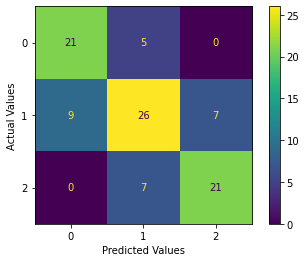

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

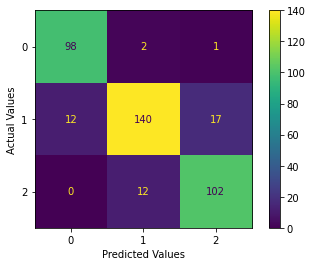

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

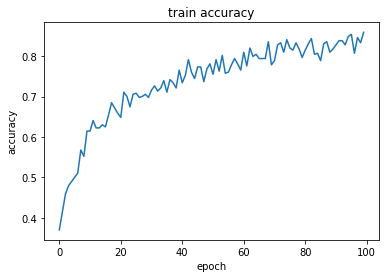

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

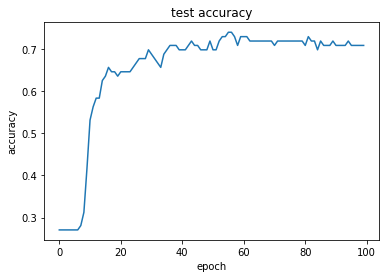

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

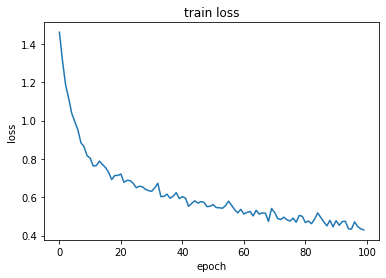

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

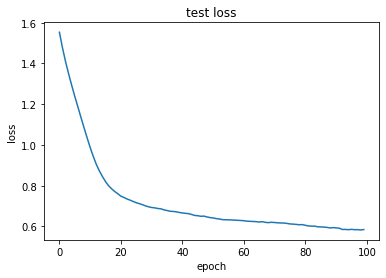

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 5-layer model Relu SGD Batch normalization**

In [ ]:
model_5layer_RSB = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(32, activation = 'relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(16, activation = 'relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(8, activation = 'relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_5layer_RSB.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_5layer_RSB.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 11ms/step - loss: 1.3211 - accuracy: 0.3281 - val_loss: 1.0961 - val_accuracy: 0.4062
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 1.2876 - accuracy: 0.2969 - val_loss: 1.1063 - val_accuracy: 0.3542
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 1.2523 - accuracy: 0.3281 - val_loss: 1.1189 - val_accuracy: 0.3125
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 1.2484 - accuracy: 0.3568 - val_loss: 1.1266 - val_accuracy: 0.2812
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 1.2543 - accuracy: 0.3281 - val_loss: 1.1381 - val_accuracy: 0.2917
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 1.2296 - accuracy: 0.3490 - val_loss: 1.1484 - val_accuracy: 0.2812
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 1.1797 - accuracy: 0.3438 - val_loss: 1.1548 - val_accuracy: 0.2917
Epoch 8/100


In [ ]:
predictions_test = model_5layer_RSB.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_5layer_RSB.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.562500
precision: 0.5669027093596058
recall; 0.5888278388278388
F1_score: 0.575036075036075
confusion_matrix test: 
[[19  6  1]
 [10 18 14]
 [ 0 11 17]]
confusion_matrix train: 
[[ 84  11   6]
 [ 20 112  37]
 [  2  26  86]]


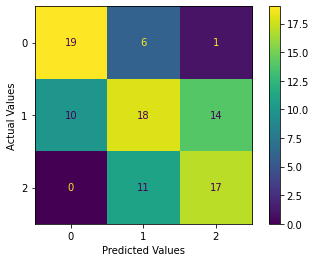

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

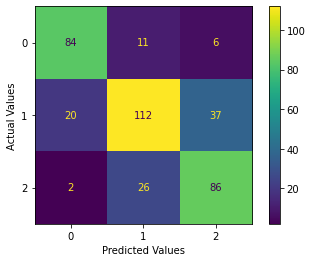

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

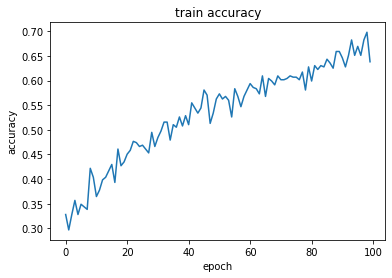

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

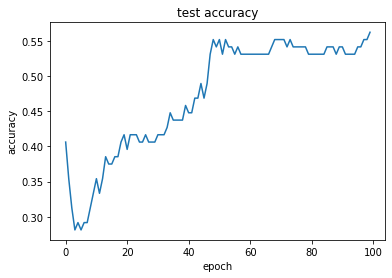

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

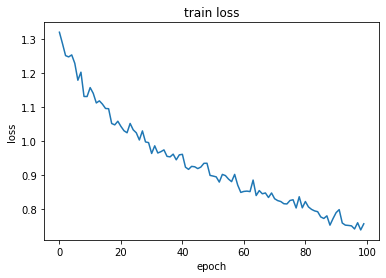

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

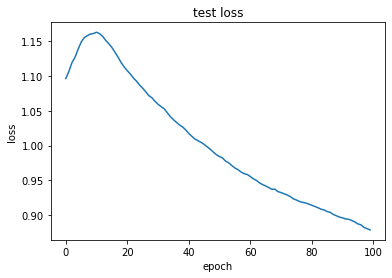

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 5-layer model Relu Adam Batch normalization**

In [ ]:
model_5layer_RAB = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(32, activation = 'relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(16, activation = 'relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(8, activation = 'relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_5layer_RAB.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_5layer_RAB.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 13ms/step - loss: 1.3985 - accuracy: 0.3698 - val_loss: 1.2452 - val_accuracy: 0.2083
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 1.3931 - accuracy: 0.3568 - val_loss: 1.2151 - val_accuracy: 0.2604
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 1.3094 - accuracy: 0.4062 - val_loss: 1.1928 - val_accuracy: 0.3021
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 1.3273 - accuracy: 0.3750 - val_loss: 1.1778 - val_accuracy: 0.3021
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 1.2202 - accuracy: 0.4167 - val_loss: 1.1686 - val_accuracy: 0.3229
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 1.1986 - accuracy: 0.4297 - val_loss: 1.1650 - val_accuracy: 0.3229
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 1.1687 - accuracy: 0.4714 - val_loss: 1.1624 - val_accuracy: 0.3333
Epoch 8/100


In [ ]:
predictions_test = model_5layer_RAB.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_5layer_RAB.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.614583
precision: 0.6465338759191832
recall; 0.6156898656898657
F1_score: 0.6277274423970953
confusion_matrix test: 
[[18  7  1]
 [ 3 26 13]
 [ 0 13 15]]
confusion_matrix train: 
[[ 94   7   0]
 [  2 159   8]
 [  0  21  93]]


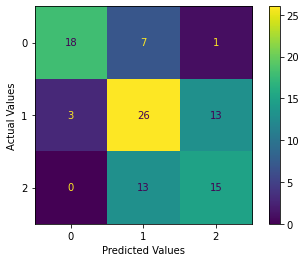

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

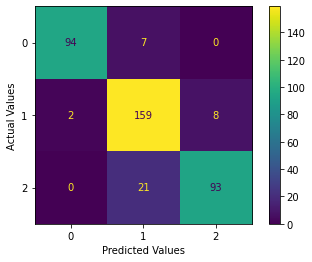

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

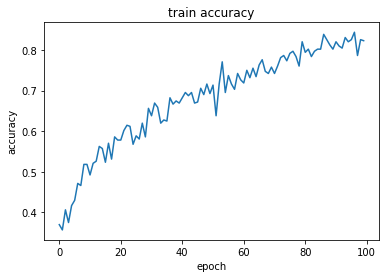

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

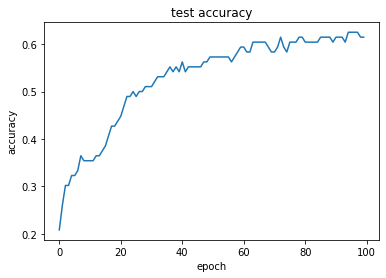

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

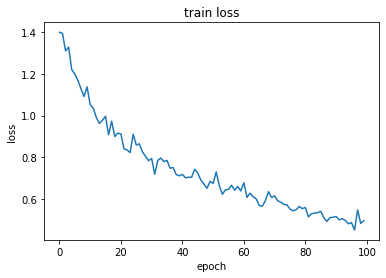

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

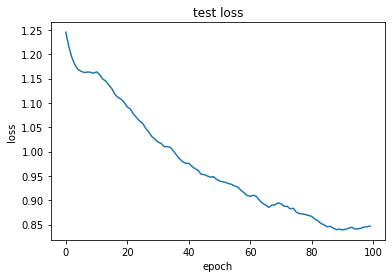

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 5-layer model Relu RMS Batch normalization**

In [ ]:
model_5layer_RRB = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(32, activation = 'relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(16, activation = 'relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(8, activation = 'relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_5layer_RRB.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_5layer_RRB.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 2s 12ms/step - loss: 1.5609 - accuracy: 0.3203 - val_loss: 1.1413 - val_accuracy: 0.3021
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 1.4516 - accuracy: 0.3698 - val_loss: 1.1436 - val_accuracy: 0.3125
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 1.4635 - accuracy: 0.3542 - val_loss: 1.1459 - val_accuracy: 0.3021
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 1.3899 - accuracy: 0.3750 - val_loss: 1.1473 - val_accuracy: 0.2708
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 1.3871 - accuracy: 0.3750 - val_loss: 1.1496 - val_accuracy: 0.3021
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 1.3320 - accuracy: 0.4167 - val_loss: 1.1522 - val_accuracy: 0.3229
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 1.3118 - accuracy: 0.4245 - val_loss: 1.1523 - val_accuracy: 0.3542
Epoch 8/100


In [ ]:
predictions_test = model_5layer_RRB.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_5layer_RRB.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.718750
precision: 0.7195631528964862
recall; 0.7286324786324787
F1_score: 0.723404312285972
confusion_matrix test: 
[[20  6  0]
 [ 5 28  9]
 [ 2  5 21]]
confusion_matrix train: 
[[ 97   2   2]
 [  8 144  17]
 [  2  10 102]]


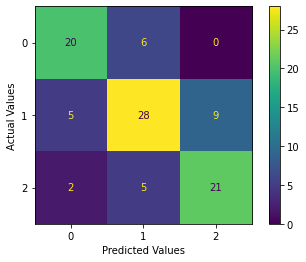

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

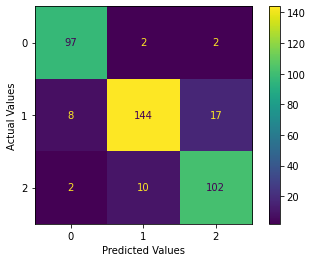

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

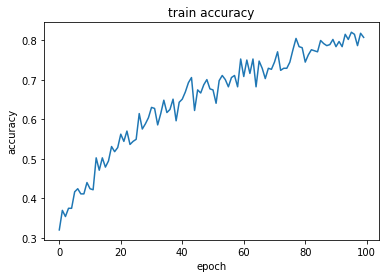

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

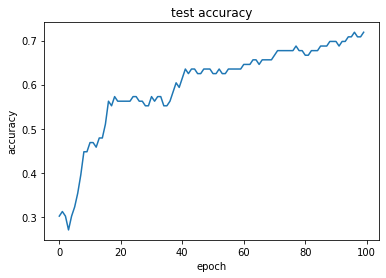

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

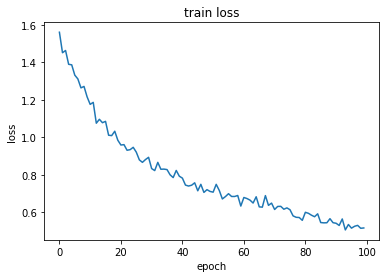

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

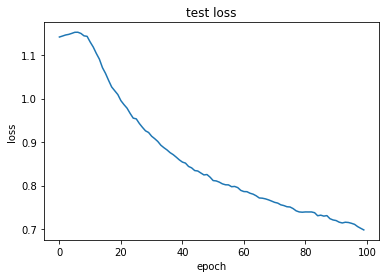

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 5-layer model tanh SGD Batch normalization**

In [ ]:
model_5layer_tSB = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'tanh'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(32, activation = 'tanh'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(16, activation = 'tanh'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(8, activation = 'tanh'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_5layer_tSB.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_5layer_tSB.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 11ms/step - loss: 1.3516 - accuracy: 0.3203 - val_loss: 1.1661 - val_accuracy: 0.2604
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 1.2845 - accuracy: 0.3516 - val_loss: 1.1572 - val_accuracy: 0.2812
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 1.2279 - accuracy: 0.3854 - val_loss: 1.1483 - val_accuracy: 0.3125
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 1.2082 - accuracy: 0.3802 - val_loss: 1.1400 - val_accuracy: 0.3333
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1750 - accuracy: 0.3906 - val_loss: 1.1314 - val_accuracy: 0.3646
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 1.1536 - accuracy: 0.4193 - val_loss: 1.1229 - val_accuracy: 0.3854
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 1.1289 - accuracy: 0.4323 - val_loss: 1.1141 - val_accuracy: 0.3958
Epoch 8/100


In [ ]:
predictions_test = model_5layer_tSB.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_5layer_tSB.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.531250
precision: 0.5194712031153925
recall; 0.5906593406593407
F1_score: 0.5314699792960663
confusion_matrix test: 
[[21  5  0]
 [13  9 20]
 [ 0  7 21]]
confusion_matrix train: 
[[97  4  0]
 [32 90 47]
 [ 2 13 99]]


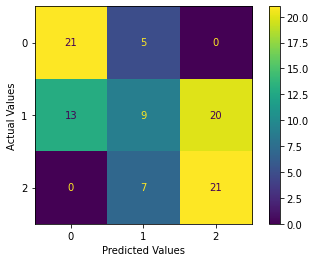

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

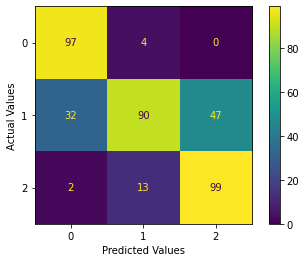

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

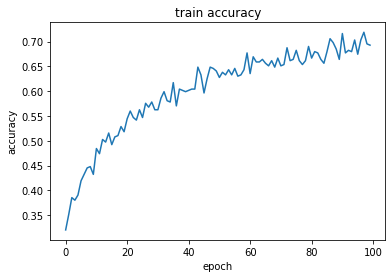

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

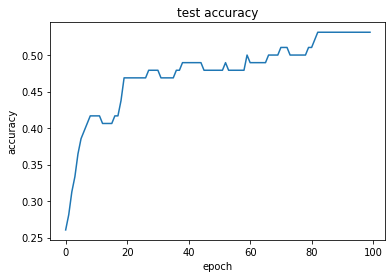

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

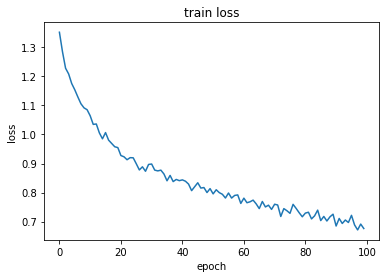

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

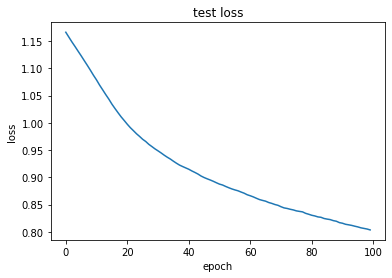

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 5-layer model tanh Adam Batch normalization**

In [ ]:
model_5layer_tAB = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'tanh'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(32, activation = 'tanh'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(16, activation = 'tanh'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(8, activation = 'tanh'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_5layer_tAB.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_5layer_tAB.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 13ms/step - loss: 1.4549 - accuracy: 0.3385 - val_loss: 1.0667 - val_accuracy: 0.4167
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 1.2612 - accuracy: 0.4297 - val_loss: 1.0443 - val_accuracy: 0.4479
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 1.2329 - accuracy: 0.4245 - val_loss: 1.0255 - val_accuracy: 0.4688
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1742 - accuracy: 0.4427 - val_loss: 1.0114 - val_accuracy: 0.5000
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 1.0831 - accuracy: 0.4896 - val_loss: 0.9963 - val_accuracy: 0.4896
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 1.0525 - accuracy: 0.4818 - val_loss: 0.9838 - val_accuracy: 0.5000
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 1.0226 - accuracy: 0.4844 - val_loss: 0.9726 - val_accuracy: 0.5312
Epoch 8/100


In [ ]:
predictions_test = model_5layer_tAB.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_5layer_tAB.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.708333
precision: 0.7222222222222222
recall; 0.69993894993895
F1_score: 0.7083190883190883
confusion_matrix test: 
[[19  5  2]
 [ 5 32  5]
 [ 0 11 17]]
confusion_matrix train: 
[[ 99   1   1]
 [  6 157   6]
 [  0   2 112]]


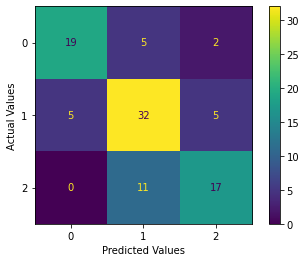

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

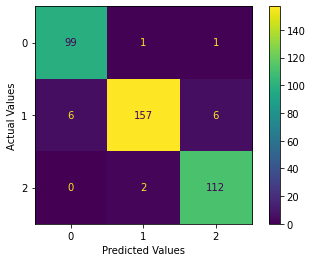

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

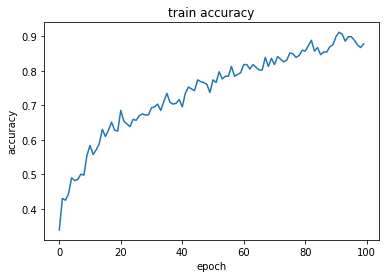

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

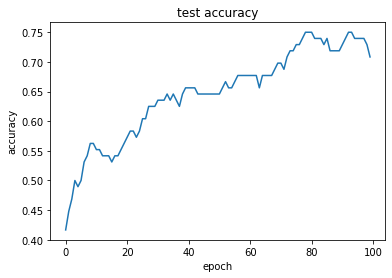

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

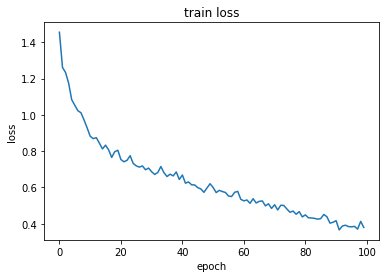

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

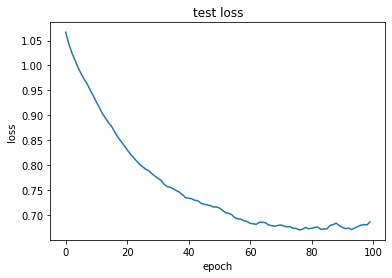

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 5-layer model tanh RMS Batch normalization**

In [ ]:
model_5layer_tRB = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'tanh'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(32, activation = 'tanh'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(16, activation = 'tanh'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(8, activation = 'tanh'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_5layer_tRB.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_5layer_tRB.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 2s 12ms/step - loss: 1.4349 - accuracy: 0.3516 - val_loss: 1.2635 - val_accuracy: 0.3542
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 1.3723 - accuracy: 0.3464 - val_loss: 1.2415 - val_accuracy: 0.3750
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 1.2430 - accuracy: 0.4036 - val_loss: 1.2144 - val_accuracy: 0.3854
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 1.1909 - accuracy: 0.4453 - val_loss: 1.1850 - val_accuracy: 0.4062
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1371 - accuracy: 0.4505 - val_loss: 1.1563 - val_accuracy: 0.4167
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 1.0744 - accuracy: 0.4922 - val_loss: 1.1302 - val_accuracy: 0.4167
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 1.0120 - accuracy: 0.5130 - val_loss: 1.1023 - val_accuracy: 0.4167
Epoch 8/100


In [ ]:
predictions_test = model_5layer_tRB.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_5layer_tRB.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.687500
precision: 0.6891133557800225
recall; 0.7078754578754577
F1_score: 0.6954880360386082
confusion_matrix test: 
[[19  7  0]
 [ 8 24 10]
 [ 0  5 23]]
confusion_matrix train: 
[[ 99   2   0]
 [  5 152  12]
 [  0   3 111]]


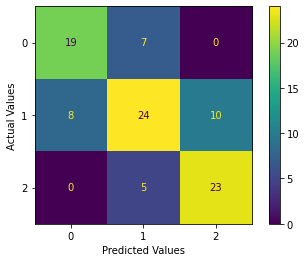

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

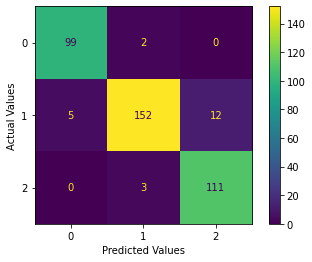

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

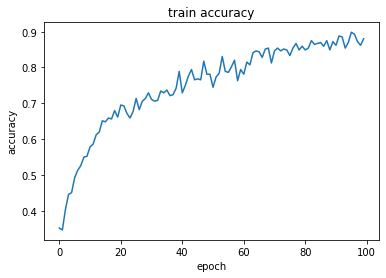

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

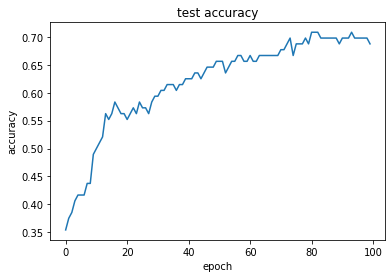

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

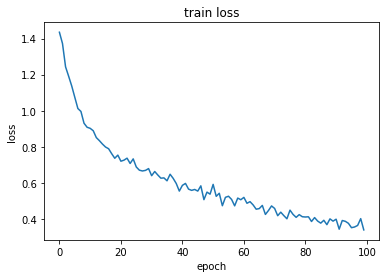

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

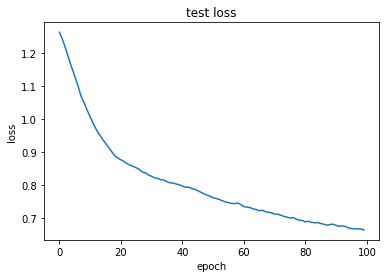

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 5-layer model sigmoid SGD Batch normalization**

In [ ]:
model_5layer_sSB = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'sigmoid'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(32, activation = 'sigmoid'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(16, activation = 'sigmoid'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(8, activation = 'sigmoid'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_5layer_sSB.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_5layer_sSB.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 11ms/step - loss: 1.3210 - accuracy: 0.3516 - val_loss: 1.0819 - val_accuracy: 0.4375
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 1.2818 - accuracy: 0.4115 - val_loss: 1.0789 - val_accuracy: 0.4375
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 1.2006 - accuracy: 0.4010 - val_loss: 1.0761 - val_accuracy: 0.4375
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 1.1742 - accuracy: 0.4375 - val_loss: 1.0730 - val_accuracy: 0.4375
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 1.1428 - accuracy: 0.4323 - val_loss: 1.0690 - val_accuracy: 0.4375
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1317 - accuracy: 0.4271 - val_loss: 1.0636 - val_accuracy: 0.4375
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 1.1032 - accuracy: 0.4688 - val_loss: 1.0563 - val_accuracy: 0.4375
Epoch 8/100


In [ ]:
predictions_test = model_5layer_RRB.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_5layer_RRB.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.718750
precision: 0.7195631528964862
recall; 0.7286324786324787
F1_score: 0.723404312285972
confusion_matrix test: 
[[20  6  0]
 [ 5 28  9]
 [ 2  5 21]]
confusion_matrix train: 
[[ 97   2   2]
 [  8 144  17]
 [  2  10 102]]


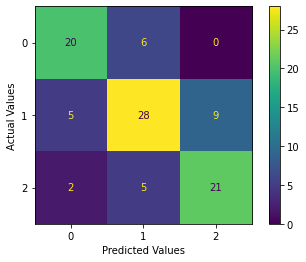

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

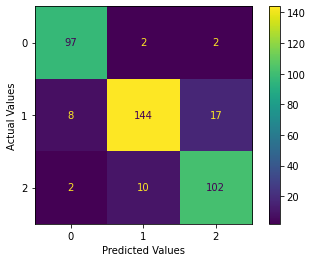

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

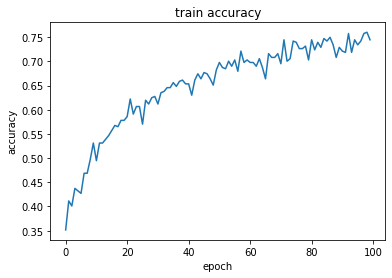

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

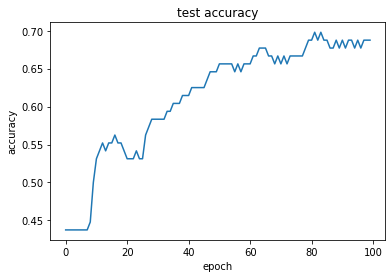

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

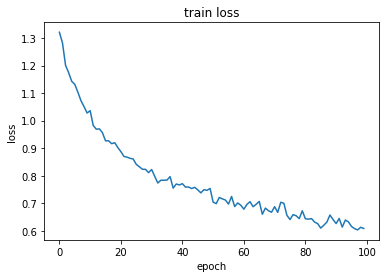

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

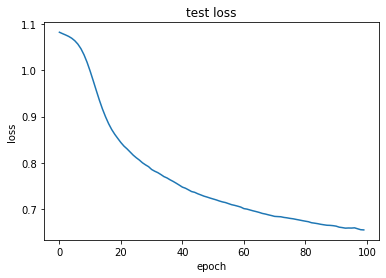

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 5-layer model sigmoid Adam Batch normalization**

In [ ]:
model_5layer_sAB = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'sigmoid'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(32, activation = 'sigmoid'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(16, activation = 'sigmoid'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(8, activation = 'sigmoid'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_5layer_sAB.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_5layer_sAB.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 12ms/step - loss: 1.7279 - accuracy: 0.2943 - val_loss: 1.0793 - val_accuracy: 0.4375
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 1.5461 - accuracy: 0.3672 - val_loss: 1.0802 - val_accuracy: 0.4375
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 1.4257 - accuracy: 0.3802 - val_loss: 1.0802 - val_accuracy: 0.4375
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 1.3009 - accuracy: 0.4505 - val_loss: 1.0782 - val_accuracy: 0.4271
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 1.2272 - accuracy: 0.4479 - val_loss: 1.0733 - val_accuracy: 0.4688
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 1.1505 - accuracy: 0.4974 - val_loss: 1.0650 - val_accuracy: 0.4375
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 1.0858 - accuracy: 0.5312 - val_loss: 1.0515 - val_accuracy: 0.3854
Epoch 8/100


In [ ]:
predictions_test = model_5layer_sAB.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_5layer_sAB.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.697917
precision: 0.7061788617886178
recall; 0.7078754578754579
F1_score: 0.706612793296241
confusion_matrix test: 
[[19  7  0]
 [ 6 27  9]
 [ 0  7 21]]
confusion_matrix train: 
[[ 96   5   0]
 [ 16 137  16]
 [  0   6 108]]


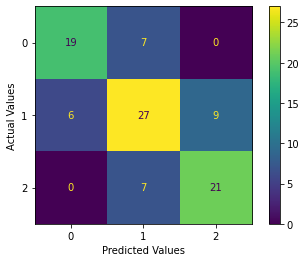

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

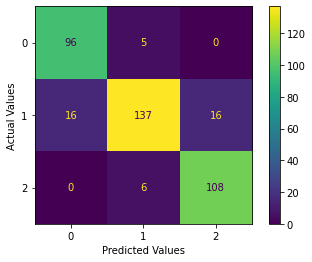

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

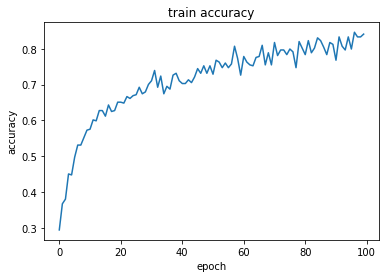

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

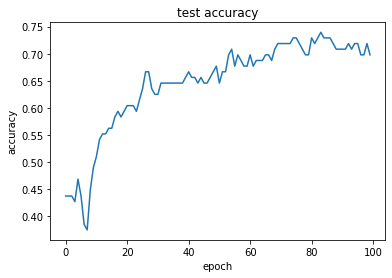

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

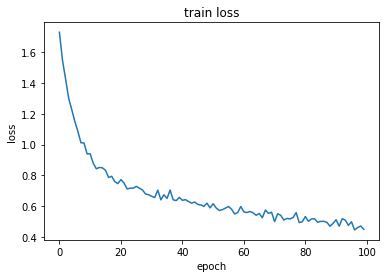

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

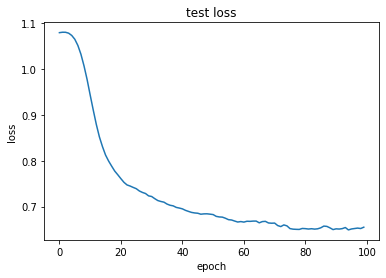

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 5-layer model sigmoid RMS Batch normalization**

In [ ]:
model_5layer_sRB = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'sigmoid'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(32, activation = 'sigmoid'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(16, activation = 'sigmoid'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(8, activation = 'sigmoid'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_5layer_sRB.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_5layer_sRB.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 2s 12ms/step - loss: 1.4336 - accuracy: 0.2969 - val_loss: 1.0913 - val_accuracy: 0.4375
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 1.3063 - accuracy: 0.3672 - val_loss: 1.0871 - val_accuracy: 0.4375
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 1.2381 - accuracy: 0.3698 - val_loss: 1.0827 - val_accuracy: 0.4375
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 1.1630 - accuracy: 0.4375 - val_loss: 1.0773 - val_accuracy: 0.4375
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 1.0958 - accuracy: 0.4531 - val_loss: 1.0701 - val_accuracy: 0.4375
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 1.0304 - accuracy: 0.4766 - val_loss: 1.0603 - val_accuracy: 0.4583
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 1.0222 - accuracy: 0.4844 - val_loss: 1.0467 - val_accuracy: 0.5208
Epoch 8/100


In [ ]:
predictions_test = model_5layer_sRB.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_5layer_sRB.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.739583
precision: 0.743019943019943
recall; 0.7533577533577533
F1_score: 0.7474771815117366
confusion_matrix test: 
[[21  5  0]
 [ 6 28  8]
 [ 0  6 22]]
confusion_matrix train: 
[[ 99   2   0]
 [  6 142  21]
 [  0  11 103]]


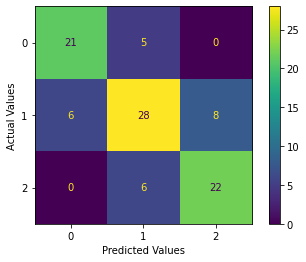

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

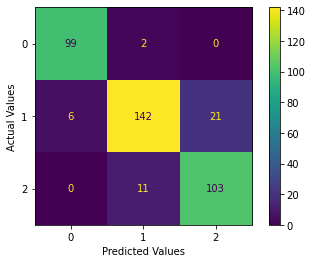

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

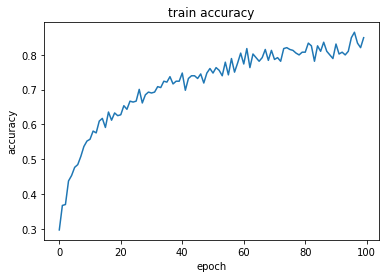

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

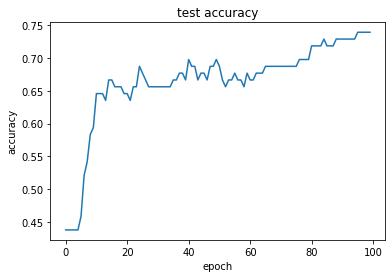

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

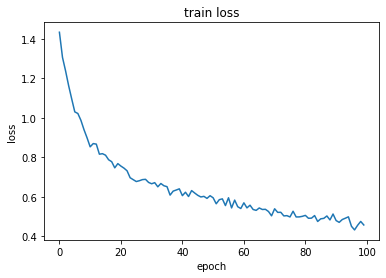

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

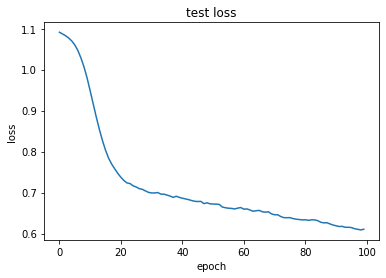

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 3-layer model Relu SGD Dropout**

In [ ]:
model_3layer_RSD = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation = 'relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_3layer_RSD.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_3layer_RSD.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 2s 58ms/step - loss: 1.1374 - accuracy: 0.4115 - val_loss: 1.0049 - val_accuracy: 0.4271
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0659 - accuracy: 0.4036 - val_loss: 0.9578 - val_accuracy: 0.4688
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0127 - accuracy: 0.4583 - val_loss: 0.9179 - val_accuracy: 0.5104
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9330 - accuracy: 0.5026 - val_loss: 0.8841 - val_accuracy: 0.5104
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8729 - accuracy: 0.5625 - val_loss: 0.8573 - val_accuracy: 0.5625
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8553 - accuracy: 0.5677 - val_loss: 0.8300 - val_accuracy: 0.6250
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8426 - accuracy: 0.5729 - val_loss: 0.8056 - val_accuracy: 0.6354
Epoch 8/100


In [ ]:
predictions_test = model_3layer_RSD.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_3layer_RSD.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.718750
precision: 0.7382677708764666
recall; 0.7206959706959708
F1_score: 0.7281843771991555
confusion_matrix test: 
[[20  6  0]
 [ 3 30  9]
 [ 0  9 19]]
confusion_matrix train: 
[[ 99   2   0]
 [  4 157   8]
 [  0   7 107]]


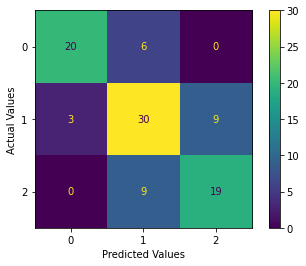

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

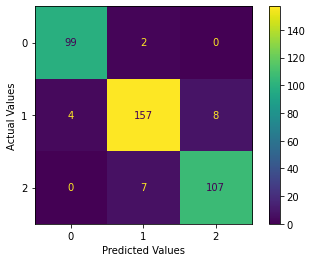

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

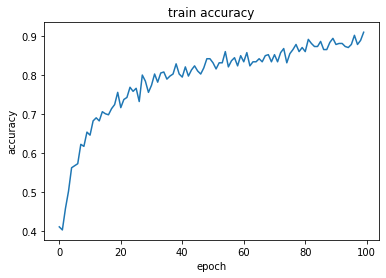

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

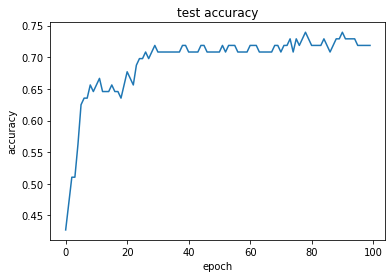

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

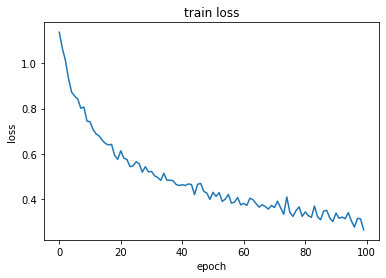

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

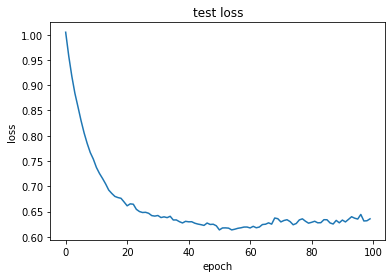

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 3-layer model Relu Adam Dropout**

In [ ]:
model_3layer_RAD = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation = 'relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_3layer_RAD.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_3layer_RAD.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 9ms/step - loss: 1.3557 - accuracy: 0.3672 - val_loss: 1.2576 - val_accuracy: 0.3958
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 1.2310 - accuracy: 0.4193 - val_loss: 1.2333 - val_accuracy: 0.3958
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 1.2785 - accuracy: 0.3906 - val_loss: 1.2093 - val_accuracy: 0.3750
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 1.2170 - accuracy: 0.3880 - val_loss: 1.1890 - val_accuracy: 0.3646
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 1.2127 - accuracy: 0.4010 - val_loss: 1.1686 - val_accuracy: 0.4062
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1375 - accuracy: 0.4349 - val_loss: 1.1532 - val_accuracy: 0.4375
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1476 - accuracy: 0.4141 - val_loss: 1.1359 - val_accuracy: 0.4271
Epoch 8/100
2

In [ ]:
predictions_test = model_3layer_RAD.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_3layer_RAD.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.677083
precision: 0.6875094347760453
recall; 0.68986568986569
F1_score: 0.6885924263857048
confusion_matrix test: 
[[21  5  0]
 [ 5 26 11]
 [ 0 10 18]]
confusion_matrix train: 
[[ 94   7   0]
 [  8 150  11]
 [  1  14  99]]


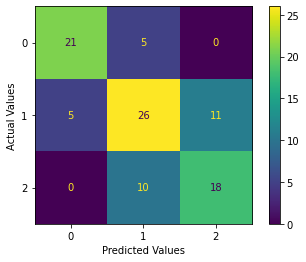

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

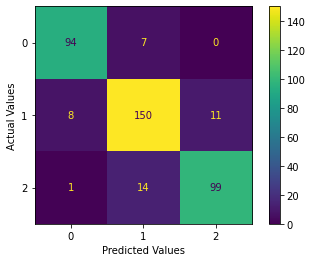

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

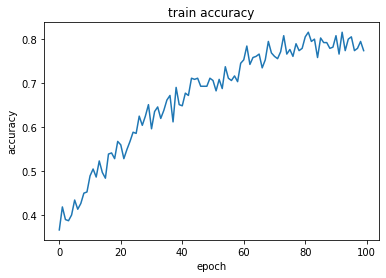

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

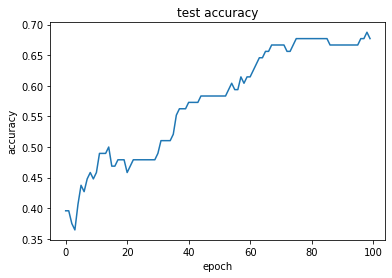

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

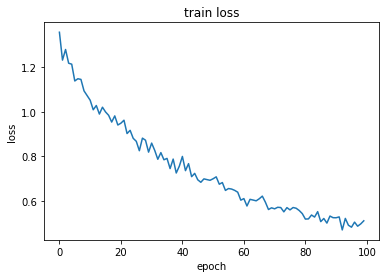

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

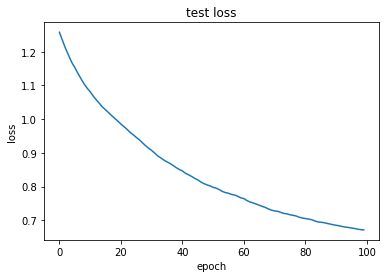

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 3-layer model Relu RMS Dropout**

In [ ]:
model_3layer_RRD = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation = 'relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_3layer_RRD.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_3layer_RRD.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 9ms/step - loss: 1.2693 - accuracy: 0.4141 - val_loss: 1.0603 - val_accuracy: 0.4479
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 1.2552 - accuracy: 0.3568 - val_loss: 1.0418 - val_accuracy: 0.4583
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 1.2207 - accuracy: 0.3984 - val_loss: 1.0237 - val_accuracy: 0.4896
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 1.2038 - accuracy: 0.4167 - val_loss: 1.0069 - val_accuracy: 0.4896
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1498 - accuracy: 0.4115 - val_loss: 0.9919 - val_accuracy: 0.4792
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 1.1254 - accuracy: 0.4375 - val_loss: 0.9780 - val_accuracy: 0.5104
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 1.1011 - accuracy: 0.4609 - val_loss: 0.9648 - val_accuracy: 0.5521
Epoch 8/100
2

In [ ]:
predictions_test = model_3layer_RRD.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_3layer_RRD.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.760417
precision: 0.7774169317780134
recall; 0.7692307692307692
F1_score: 0.771122585580417
confusion_matrix test: 
[[21  5  0]
 [ 2 30 10]
 [ 0  6 22]]
confusion_matrix train: 
[[ 96   5   0]
 [  9 149  11]
 [  0  15  99]]


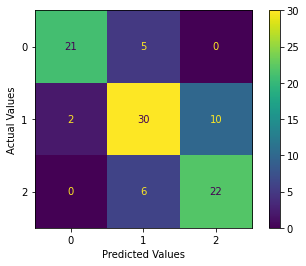

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

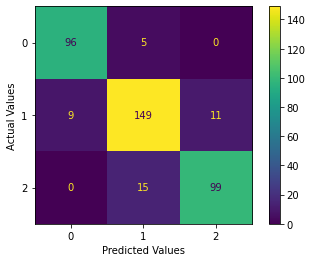

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

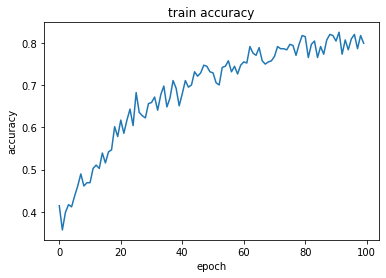

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

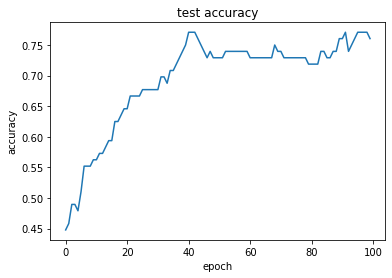

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

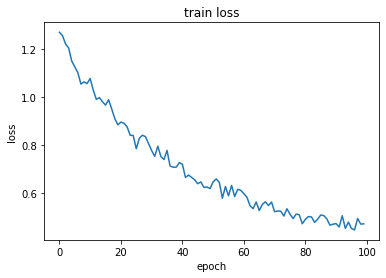

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

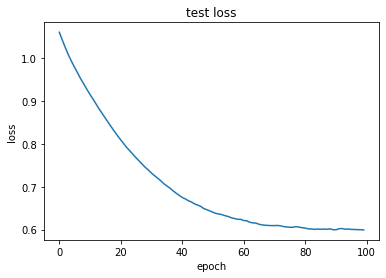

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 3-layer model tanh SGD Dropout**

In [ ]:
model_3layer_tSD = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'tanh'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation = 'tanh'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_3layer_tSD.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_3layer_tSD.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 8ms/step - loss: 1.2620 - accuracy: 0.3516 - val_loss: 1.1232 - val_accuracy: 0.4062
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1169 - accuracy: 0.4323 - val_loss: 0.9955 - val_accuracy: 0.5104
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0192 - accuracy: 0.4766 - val_loss: 0.9119 - val_accuracy: 0.5729
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9568 - accuracy: 0.5026 - val_loss: 0.8532 - val_accuracy: 0.5833
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8807 - accuracy: 0.5547 - val_loss: 0.8108 - val_accuracy: 0.5833
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8337 - accuracy: 0.5781 - val_loss: 0.7808 - val_accuracy: 0.5833
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8221 - accuracy: 0.5755 - val_loss: 0.7577 - val_accuracy: 0.5938
Epoch 8/100
2

In [ ]:
predictions_test = model_3layer_tSD.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_3layer_tSD.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.708333
precision: 0.7215277777777778
recall; 0.7206959706959708
F1_score: 0.7195121951219511
confusion_matrix test: 
[[20  6  0]
 [ 4 27 11]
 [ 0  7 21]]
confusion_matrix train: 
[[ 98   3   0]
 [  5 150  14]
 [  0   6 108]]


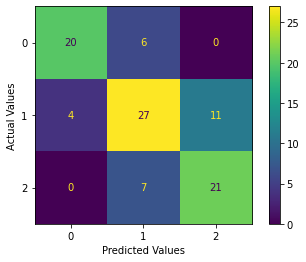

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

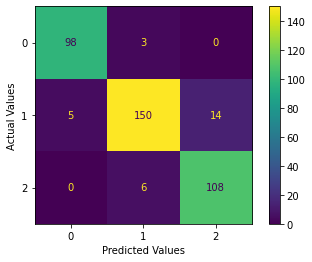

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

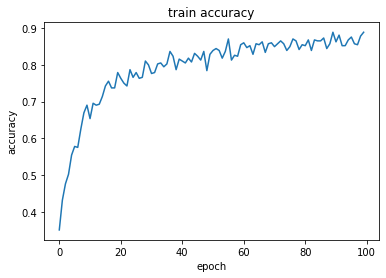

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

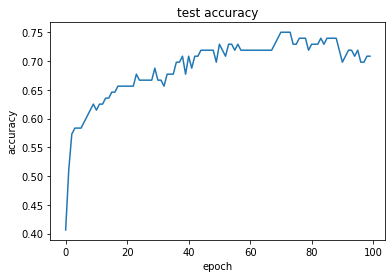

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

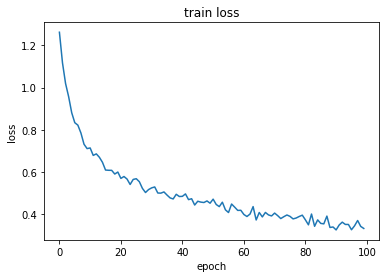

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

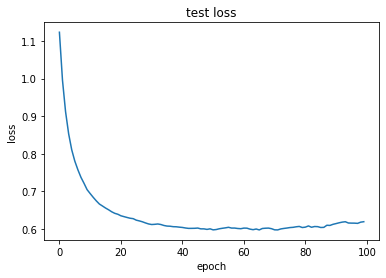

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 3-layer model tanh Adam Dropout**

In [ ]:
model_3layer_tAD = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'tanh'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation = 'tanh'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_3layer_tAD.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_3layer_tAD.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 9ms/step - loss: 1.3173 - accuracy: 0.3542 - val_loss: 1.2585 - val_accuracy: 0.3438
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 1.2981 - accuracy: 0.3307 - val_loss: 1.1966 - val_accuracy: 0.3750
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 1.2021 - accuracy: 0.3932 - val_loss: 1.1428 - val_accuracy: 0.3958
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1634 - accuracy: 0.3906 - val_loss: 1.0946 - val_accuracy: 0.4479
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1542 - accuracy: 0.4219 - val_loss: 1.0525 - val_accuracy: 0.4479
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0968 - accuracy: 0.4323 - val_loss: 1.0165 - val_accuracy: 0.4688
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0676 - accuracy: 0.4635 - val_loss: 0.9831 - val_accuracy: 0.5208
Epoch 8/100
2

In [ ]:
predictions_test = model_3layer_tAD.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_3layer_tAD.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.729167
precision: 0.7391397849462366
recall; 0.7414529914529915
F1_score: 0.7394402159375533
confusion_matrix test: 
[[21  5  0]
 [ 4 28 10]
 [ 0  7 21]]
confusion_matrix train: 
[[ 95   6   0]
 [ 11 143  15]
 [  0  14 100]]


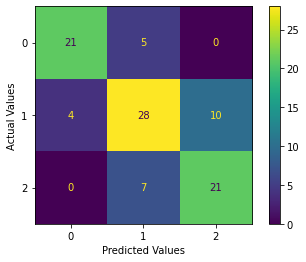

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

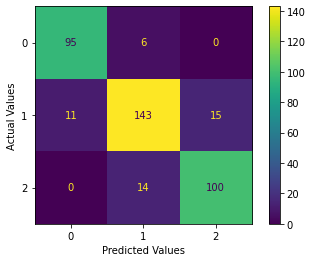

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

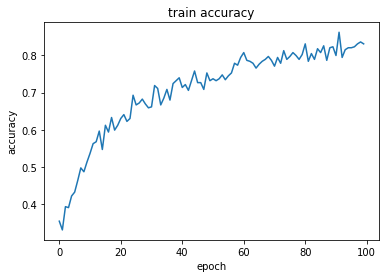

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

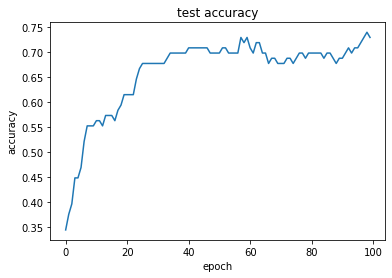

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

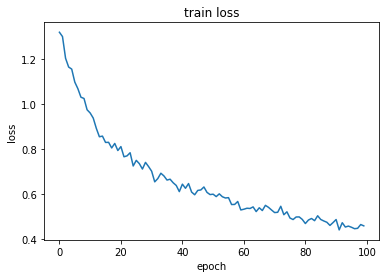

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

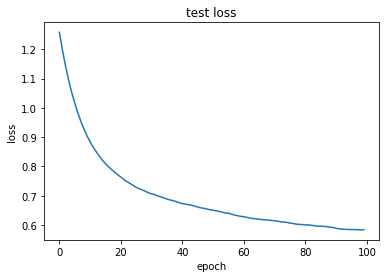

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 3-layer model tanh RMS Dropout**

In [ ]:
model_3layer_tRD = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'tanh'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation = 'tanh'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_3layer_tRD.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_3layer_tRD.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 9ms/step - loss: 1.2134 - accuracy: 0.4010 - val_loss: 1.0971 - val_accuracy: 0.4792
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1752 - accuracy: 0.3958 - val_loss: 1.0688 - val_accuracy: 0.5104
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1010 - accuracy: 0.4583 - val_loss: 1.0438 - val_accuracy: 0.5104
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 1.0577 - accuracy: 0.5000 - val_loss: 1.0189 - val_accuracy: 0.5208
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0654 - accuracy: 0.5156 - val_loss: 0.9965 - val_accuracy: 0.5521
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0198 - accuracy: 0.5182 - val_loss: 0.9749 - val_accuracy: 0.5625
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9912 - accuracy: 0.5547 - val_loss: 0.9563 - val_accuracy: 0.5521
Epoch 8/100
2

In [ ]:
predictions_test = model_3layer_tRD.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_3layer_tRD.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.677083
precision: 0.6887652358240594
recall; 0.696886446886447
F1_score: 0.6897760056792555
confusion_matrix test: 
[[20  6  0]
 [ 5 24 13]
 [ 0  7 21]]
confusion_matrix train: 
[[ 96   5   0]
 [  9 137  23]
 [  0  23  91]]


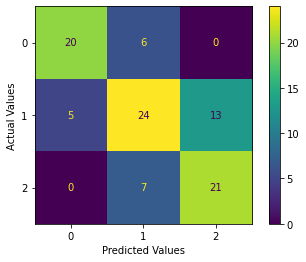

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

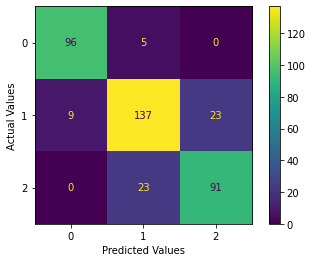

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

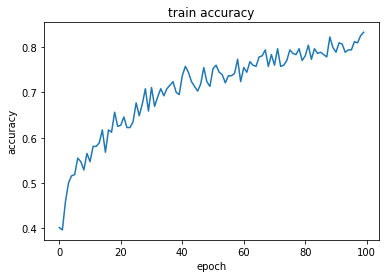

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

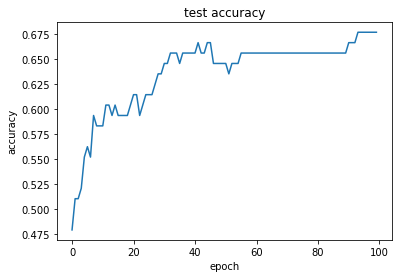

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

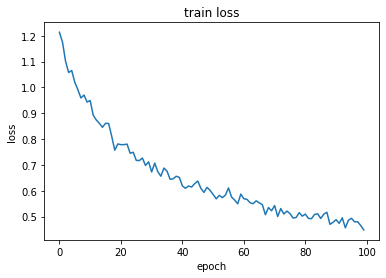

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

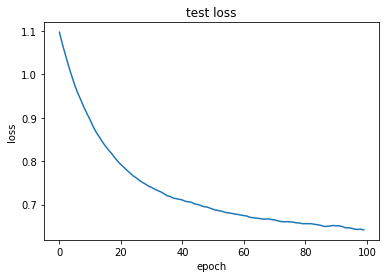

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 3-layer model sigmoid SGD Dropout**

In [ ]:
model_3layer_sSD = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'sigmoid'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation = 'sigmoid'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_3layer_sSD.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_3layer_sSD.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 500, batch_size = 16)

Epoch 1/500
24/24 [==============================] - 0s 8ms/step - loss: 1.3246 - accuracy: 0.3073 - val_loss: 1.1330 - val_accuracy: 0.2917
Epoch 2/500
24/24 [==============================] - 0s 3ms/step - loss: 1.1578 - accuracy: 0.3750 - val_loss: 1.0805 - val_accuracy: 0.4583
Epoch 3/500
24/24 [==============================] - 0s 3ms/step - loss: 1.1463 - accuracy: 0.3490 - val_loss: 1.0735 - val_accuracy: 0.4479
Epoch 4/500
24/24 [==============================] - 0s 3ms/step - loss: 1.1044 - accuracy: 0.4167 - val_loss: 1.0673 - val_accuracy: 0.4375
Epoch 5/500
24/24 [==============================] - 0s 3ms/step - loss: 1.0902 - accuracy: 0.4323 - val_loss: 1.0642 - val_accuracy: 0.4375
Epoch 6/500
24/24 [==============================] - 0s 3ms/step - loss: 1.1375 - accuracy: 0.3724 - val_loss: 1.0614 - val_accuracy: 0.4375
Epoch 7/500
24/24 [==============================] - 0s 3ms/step - loss: 1.1098 - accuracy: 0.3698 - val_loss: 1.0582 - val_accuracy: 0.4375
Epoch 8/500
2

In [ ]:
predictions_test = model_3layer_sSD.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_3layer_sSD.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.739583
precision: 0.7487334393216747
recall; 0.7573260073260073
F1_score: 0.7496697331443807
confusion_matrix test: 
[[21  5  0]
 [ 4 27 11]
 [ 0  5 23]]
confusion_matrix train: 
[[ 92   9   0]
 [ 10 131  28]
 [  0  18  96]]


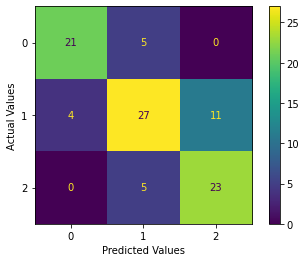

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

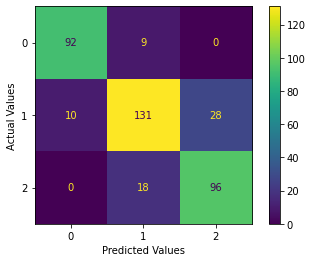

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

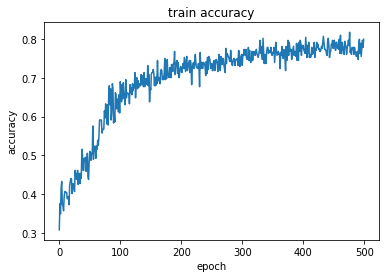

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

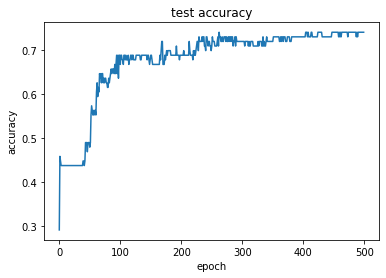

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

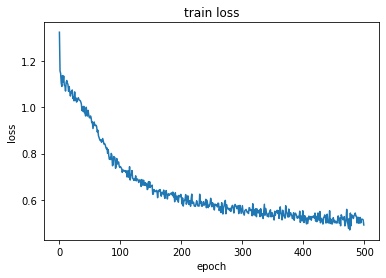

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

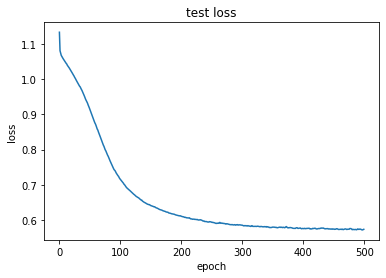

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 3-layer model sigmoid Adam Dropout**

In [ ]:
model_3layer_sAD = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'sigmoid'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation = 'sigmoid'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_3layer_sAD.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_3layer_sAD.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 500, batch_size = 16)

Epoch 1/500
24/24 [==============================] - 1s 9ms/step - loss: 1.4358 - accuracy: 0.2943 - val_loss: 1.3485 - val_accuracy: 0.2708
Epoch 2/500
24/24 [==============================] - 0s 3ms/step - loss: 1.3461 - accuracy: 0.2708 - val_loss: 1.2817 - val_accuracy: 0.2708
Epoch 3/500
24/24 [==============================] - 0s 3ms/step - loss: 1.3317 - accuracy: 0.2943 - val_loss: 1.2293 - val_accuracy: 0.2708
Epoch 4/500
24/24 [==============================] - 0s 3ms/step - loss: 1.2937 - accuracy: 0.3151 - val_loss: 1.1867 - val_accuracy: 0.2708
Epoch 5/500
24/24 [==============================] - 0s 3ms/step - loss: 1.2450 - accuracy: 0.3255 - val_loss: 1.1537 - val_accuracy: 0.2708
Epoch 6/500
24/24 [==============================] - 0s 3ms/step - loss: 1.2150 - accuracy: 0.3802 - val_loss: 1.1288 - val_accuracy: 0.2812
Epoch 7/500
24/24 [==============================] - 0s 3ms/step - loss: 1.1625 - accuracy: 0.3594 - val_loss: 1.1072 - val_accuracy: 0.3438
Epoch 8/500
2

In [ ]:
predictions_test = model_3layer_sAD.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_3layer_sAD.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.729167
precision: 0.7352395411605938
recall; 0.7454212454212454
F1_score: 0.7386752136752137
confusion_matrix test: 
[[21  5  0]
 [ 5 27 10]
 [ 0  6 22]]
confusion_matrix train: 
[[ 95   6   0]
 [  7 145  17]
 [  0  15  99]]


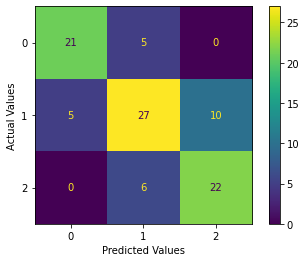

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

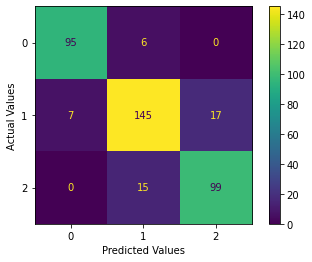

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

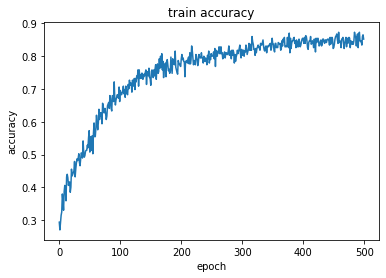

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

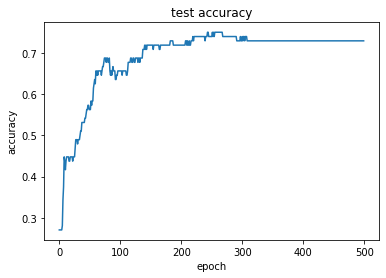

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

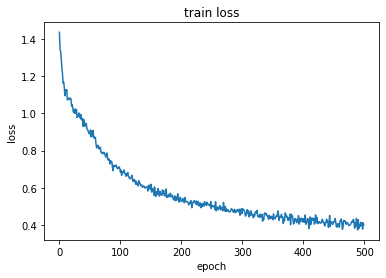

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

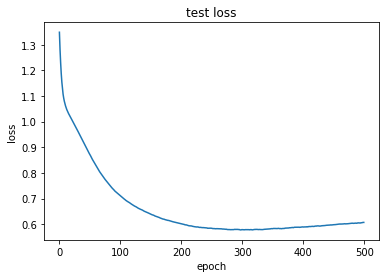

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 3-layer model sigmoid RMS Dropout**

In [ ]:
model_3layer_sRD = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'sigmoid'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation = 'sigmoid'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_3layer_sRD.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_3layer_sRD.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 500, batch_size = 16)

Epoch 1/500
24/24 [==============================] - 1s 8ms/step - loss: 1.1768 - accuracy: 0.3333 - val_loss: 1.0803 - val_accuracy: 0.3750
Epoch 2/500
24/24 [==============================] - 0s 3ms/step - loss: 1.1382 - accuracy: 0.3359 - val_loss: 1.0736 - val_accuracy: 0.4271
Epoch 3/500
24/24 [==============================] - 0s 3ms/step - loss: 1.1124 - accuracy: 0.3724 - val_loss: 1.0684 - val_accuracy: 0.4271
Epoch 4/500
24/24 [==============================] - 0s 3ms/step - loss: 1.0923 - accuracy: 0.3932 - val_loss: 1.0637 - val_accuracy: 0.4271
Epoch 5/500
24/24 [==============================] - 0s 3ms/step - loss: 1.1196 - accuracy: 0.3828 - val_loss: 1.0594 - val_accuracy: 0.4271
Epoch 6/500
24/24 [==============================] - 0s 3ms/step - loss: 1.0797 - accuracy: 0.4271 - val_loss: 1.0557 - val_accuracy: 0.4271
Epoch 7/500
24/24 [==============================] - 0s 3ms/step - loss: 1.0883 - accuracy: 0.4349 - val_loss: 1.0521 - val_accuracy: 0.4271
Epoch 8/500
2

In [ ]:
predictions_test = model_3layer_sRD.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_3layer_sRD.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.729167
precision: 0.7402777777777777
recall; 0.7405372405372406
F1_score: 0.7387533875338753
confusion_matrix test: 
[[20  6  0]
 [ 4 28 10]
 [ 0  6 22]]
confusion_matrix train: 
[[ 93   8   0]
 [  8 146  15]
 [  0  17  97]]


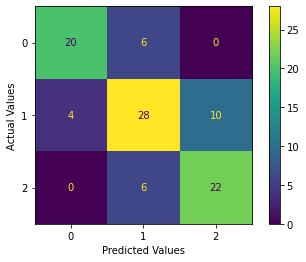

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

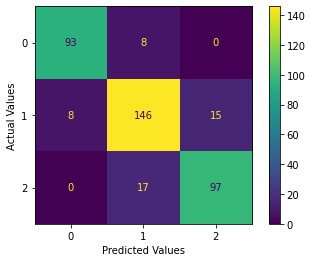

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

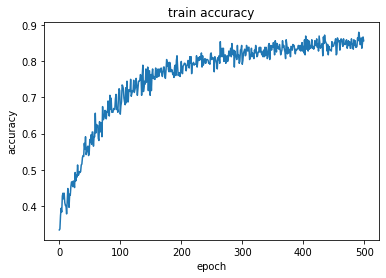

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

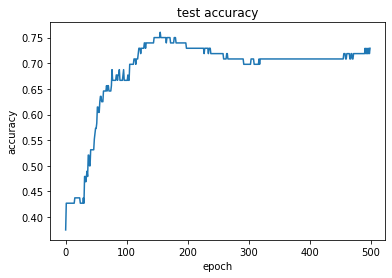

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

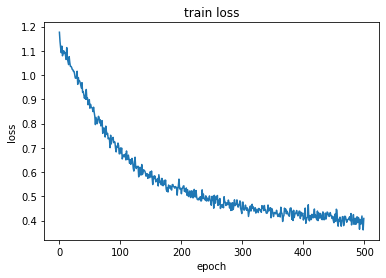

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

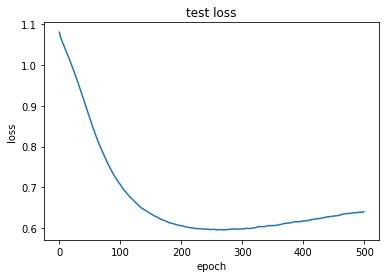

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 4-layer model Relu SGD Dropout**

In [ ]:
model_4layer_RSD = keras.Sequential(
    [
        keras.layers.Dense(128, input_shape = (X_train.shape[1],), activation = 'relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation = 'relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(32, activation = 'relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_4layer_RSD.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_4layer_RSD.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 10ms/step - loss: 1.3736 - accuracy: 0.2812 - val_loss: 1.1072 - val_accuracy: 0.3229
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1898 - accuracy: 0.3698 - val_loss: 1.0568 - val_accuracy: 0.4167
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1160 - accuracy: 0.4141 - val_loss: 1.0282 - val_accuracy: 0.4792
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0838 - accuracy: 0.4401 - val_loss: 1.0105 - val_accuracy: 0.5208
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0409 - accuracy: 0.4792 - val_loss: 0.9887 - val_accuracy: 0.5521
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0053 - accuracy: 0.4948 - val_loss: 0.9692 - val_accuracy: 0.5729
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0071 - accuracy: 0.4870 - val_loss: 0.9585 - val_accuracy: 0.5729
Epoch 8/100


In [ ]:
predictions_test = model_4layer_RSD.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_4layer_RSD.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.739583
precision: 0.7517152276574891
recall; 0.7445054945054945
F1_score: 0.7475748194014448
confusion_matrix test: 
[[20  6  0]
 [ 4 30  8]
 [ 0  7 21]]
confusion_matrix train: 
[[ 98   3   0]
 [  6 155   8]
 [  0   6 108]]


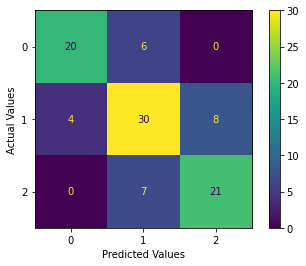

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

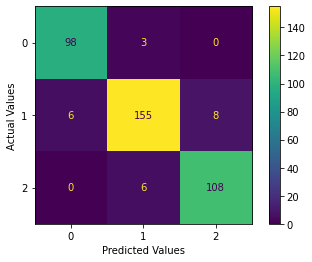

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

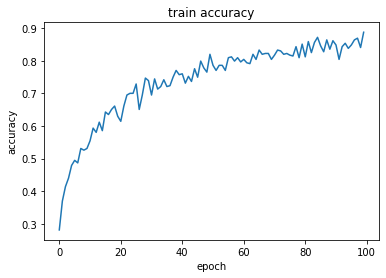

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

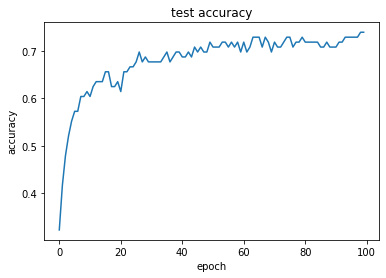

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

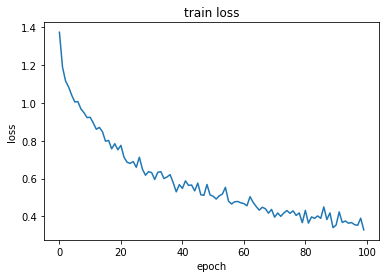

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

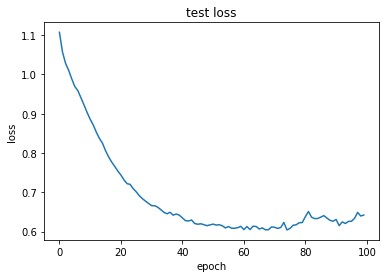

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 4-layer model Relu Adam Dropout**

In [ ]:
model_4layer_RAD = keras.Sequential(
    [
        keras.layers.Dense(128, input_shape = (X_train.shape[1],), activation = 'relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation = 'relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation = 'relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_4layer_RAD.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_4layer_RAD.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 9ms/step - loss: 1.3181 - accuracy: 0.3021 - val_loss: 1.1615 - val_accuracy: 0.2917
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 1.2106 - accuracy: 0.3464 - val_loss: 1.1155 - val_accuracy: 0.3229
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 1.1652 - accuracy: 0.3828 - val_loss: 1.0795 - val_accuracy: 0.3750
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 1.1097 - accuracy: 0.4089 - val_loss: 1.0499 - val_accuracy: 0.3854
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 1.1313 - accuracy: 0.4062 - val_loss: 1.0234 - val_accuracy: 0.4479
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 1.0730 - accuracy: 0.4479 - val_loss: 0.9977 - val_accuracy: 0.4792
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 1.0199 - accuracy: 0.4557 - val_loss: 0.9759 - val_accuracy: 0.5000
Epoch 8/100
2

In [ ]:
predictions_test = model_4layer_RAD.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_4layer_RAD.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.708333
precision: 0.727942846758439
recall; 0.7127594627594629
F1_score: 0.7191372673100247
confusion_matrix test: 
[[20  6  0]
 [ 3 29 10]
 [ 0  9 19]]
confusion_matrix train: 
[[ 99   2   0]
 [  5 154  10]
 [  0   9 105]]


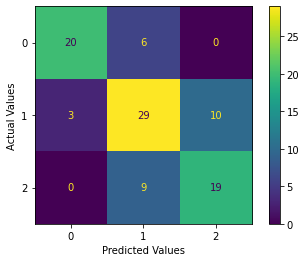

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

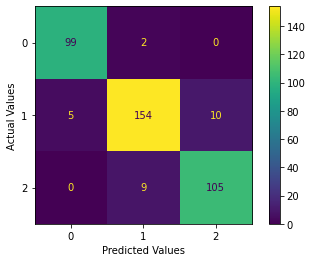

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

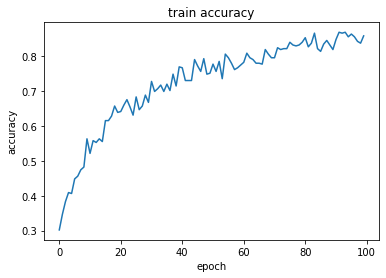

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

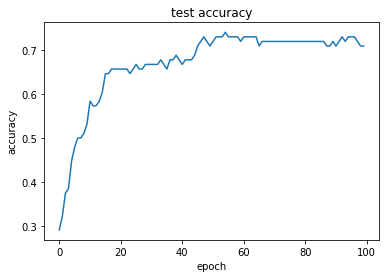

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

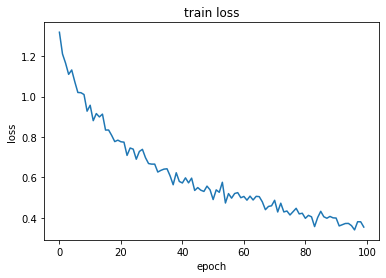

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

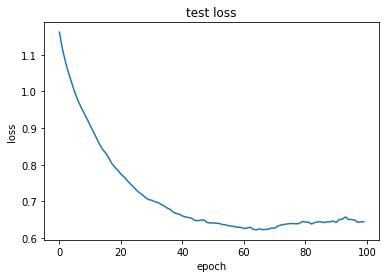

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 4-layer model Relu RMS Dropout**

In [ ]:
model_4layer_RSD = keras.Sequential(
    [
        keras.layers.Dense(128, input_shape = (X_train.shape[1],), activation = 'relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation = 'relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation = 'relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_4layer_RSD.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_4layer_RSD.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 9ms/step - loss: 1.2072 - accuracy: 0.3438 - val_loss: 1.1264 - val_accuracy: 0.3542
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 1.1460 - accuracy: 0.3490 - val_loss: 1.0948 - val_accuracy: 0.3750
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1011 - accuracy: 0.3958 - val_loss: 1.0720 - val_accuracy: 0.3958
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 1.0797 - accuracy: 0.3984 - val_loss: 1.0496 - val_accuracy: 0.4479
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0638 - accuracy: 0.4167 - val_loss: 1.0279 - val_accuracy: 0.4688
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0027 - accuracy: 0.4688 - val_loss: 1.0048 - val_accuracy: 0.4896
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0437 - accuracy: 0.4505 - val_loss: 0.9868 - val_accuracy: 0.4896
Epoch 8/100
2

In [ ]:
predictions_test = model_4layer_RSD.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_4layer_RSD.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.666667
precision: 0.6813241106719367
recall; 0.6791819291819291
F1_score: 0.6776581884253101
confusion_matrix test: 
[[18  8  0]
 [ 5 25 12]
 [ 0  7 21]]
confusion_matrix train: 
[[ 99   2   0]
 [  8 148  13]
 [  0  10 104]]


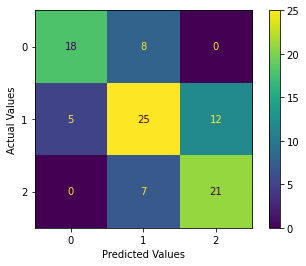

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

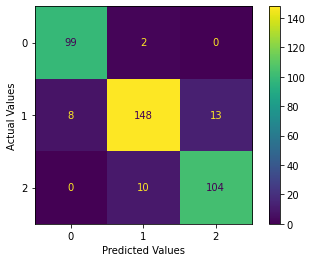

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

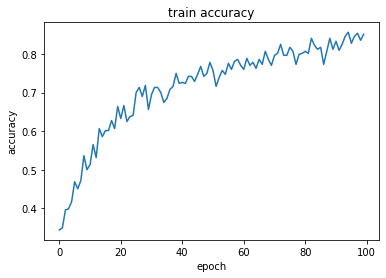

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

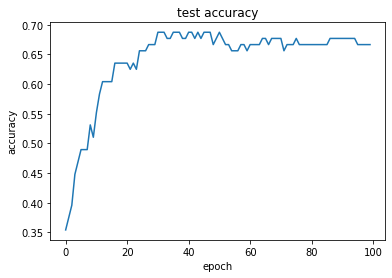

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

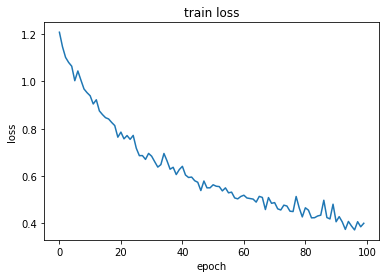

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

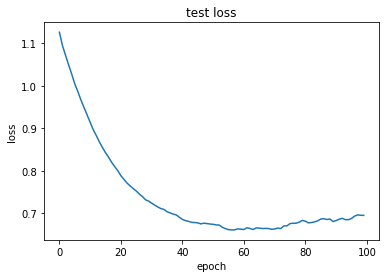

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 4-layer model tanh SGD Dropout**

In [ ]:
model_4layer_tSD = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'tanh'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(32, activation = 'tanh'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(16, activation = 'tanh'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_4layer_tSD.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_4layer_tSD.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 9ms/step - loss: 1.0898 - accuracy: 0.4010 - val_loss: 1.0178 - val_accuracy: 0.4375
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0575 - accuracy: 0.4609 - val_loss: 0.9510 - val_accuracy: 0.5000
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9474 - accuracy: 0.5026 - val_loss: 0.9040 - val_accuracy: 0.5104
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0092 - accuracy: 0.4609 - val_loss: 0.8664 - val_accuracy: 0.5417
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9330 - accuracy: 0.5443 - val_loss: 0.8351 - val_accuracy: 0.5729
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8908 - accuracy: 0.5521 - val_loss: 0.8048 - val_accuracy: 0.5729
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8531 - accuracy: 0.5495 - val_loss: 0.7804 - val_accuracy: 0.6146
Epoch 8/100
2

In [ ]:
predictions_test = model_4layer_tSD.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_4layer_tSD.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.718750
precision: 0.7233618233618234
recall; 0.7335164835164836
F1_score: 0.7277524759632762
confusion_matrix test: 
[[21  5  0]
 [ 6 27  9]
 [ 0  7 21]]
confusion_matrix train: 
[[ 99   2   0]
 [  9 137  23]
 [  0  12 102]]


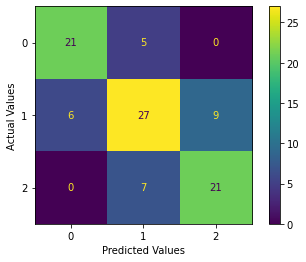

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

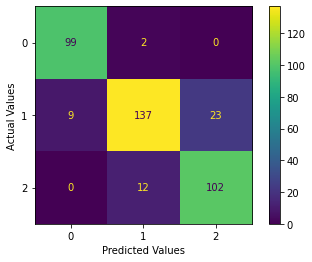

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

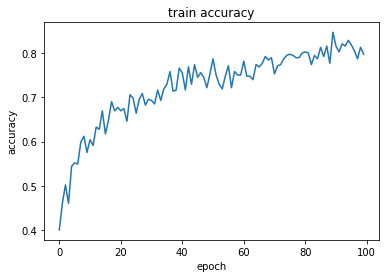

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

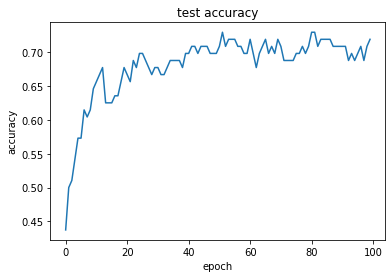

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

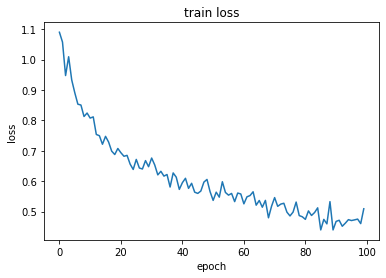

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

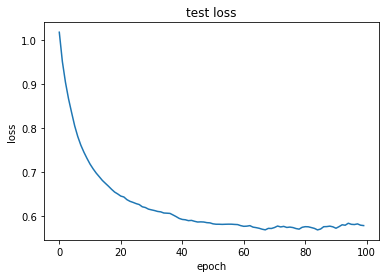

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 4-layer model tanh Adam Dropout**

In [ ]:
model_4layer_tAD = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'tanh'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation = 'tanh'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(16, activation = 'tanh'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_4layer_tAD.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_4layer_tAD.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

In [ ]:
predictions_test = model_4layer_tAD.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_4layer_tAD.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 4-layer model tanh RMS Dropout**

In [ ]:
model_4layer_tRD = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'tanh'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(32, activation = 'tanh'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(16, activation = 'tanh'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_4layer_tRD.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_4layer_tRD.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

In [ ]:
predictions_test = model_4layer_tRD.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_4layer_tRD.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 4-layer model sigmoid SGD Dropout**

In [ ]:
model_4layer_sSD = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'sigmoid'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation = 'sigmoid'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(16, activation = 'sigmoid'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_4layer_sSD.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.1), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_4layer_sSD.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 500, batch_size = 16)

In [ ]:
predictions_test = model_4layer_sSD.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_4layer_sSD.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 4-layer model sigmoid Adam Dropout**

In [ ]:
model_4layer_sAD = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'sigmoid'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation = 'sigmoid'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(16, activation = 'sigmoid'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_4layer_sAD.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_4layer_sAD.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 500, batch_size = 16)

In [ ]:
predictions_test = model_4layer_sAD.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_4layer_sAD.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.739583
precision: 0.7451061483319549
recall; 0.7533577533577533
F1_score: 0.7482710147493575
confusion_matrix test: 
[[21  5  0]
 [ 5 28  9]
 [ 0  6 22]]
confusion_matrix train: 
[[ 96   5   0]
 [  8 144  17]
 [  0  14 100]]


In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 4-layer model sigmoid RMS Dropout**

In [ ]:
model_4layer_sRD = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'sigmoid'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation = 'sigmoid'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(16, activation = 'sigmoid'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_4layer_sRD.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_4layer_sRD.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 500, batch_size = 16)

In [ ]:
predictions_test = model_4layer_sRD.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_4layer_sRD.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.739583
precision: 0.7451061483319549
recall; 0.7533577533577533
F1_score: 0.7482710147493575
confusion_matrix test: 
[[21  5  0]
 [ 5 28  9]
 [ 0  6 22]]
confusion_matrix train: 
[[ 95   6   0]
 [ 10 143  16]
 [  0  15  99]]


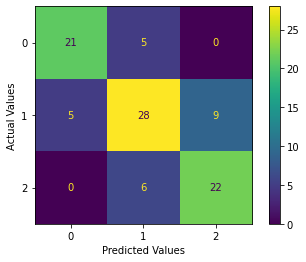

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

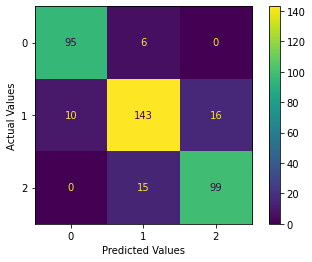

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

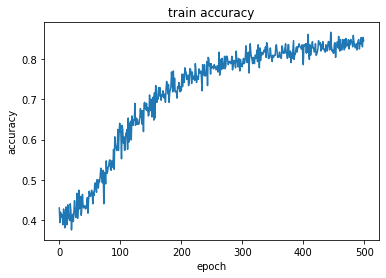

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

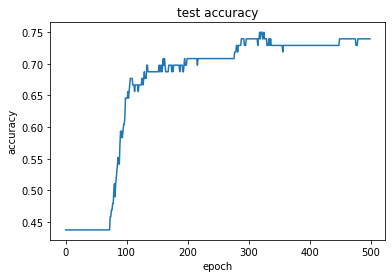

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

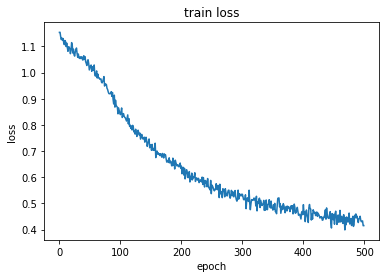

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

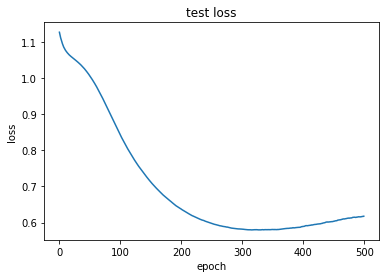

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 5-layer model Relu SGD Dropout**

In [ ]:
model_5layer_RSD = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(32, activation = 'relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(16, activation = 'relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(8, activation = 'relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_5layer_RSD.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_5layer_RSD.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 1s 9ms/step - loss: 1.2896 - accuracy: 0.3281 - val_loss: 1.0640 - val_accuracy: 0.4375
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1039 - accuracy: 0.3932 - val_loss: 1.0487 - val_accuracy: 0.4688
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1298 - accuracy: 0.3490 - val_loss: 1.0441 - val_accuracy: 0.4688
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 1.1071 - accuracy: 0.3906 - val_loss: 1.0380 - val_accuracy: 0.5000
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0725 - accuracy: 0.4115 - val_loss: 1.0304 - val_accuracy: 0.4896
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0644 - accuracy: 0.4193 - val_loss: 1.0207 - val_accuracy: 0.5000
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0605 - accuracy: 0.4167 - val_loss: 1.0107 - val_accuracy: 0.5312
Epoch 8/100
2

In [ ]:
predictions_test = model_5layer_RSD.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_5layer_RSD.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.687500
precision: 0.6936026936026937
recall; 0.7097069597069597
F1_score: 0.698787345245743
confusion_matrix test: 
[[21  5  0]
 [ 6 24 12]
 [ 0  7 21]]
confusion_matrix train: 
[[ 92   9   0]
 [  9 140  20]
 [  0  11 103]]


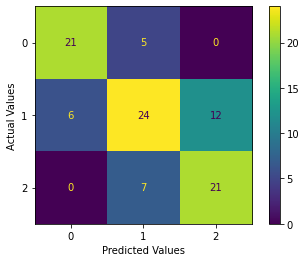

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

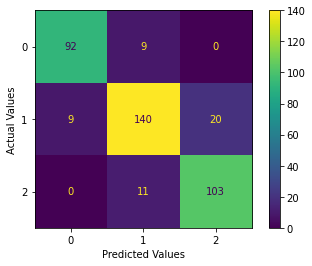

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

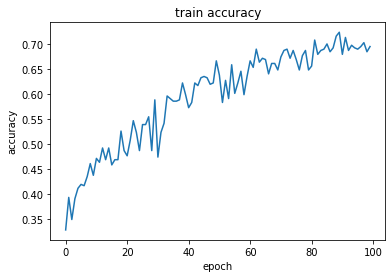

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

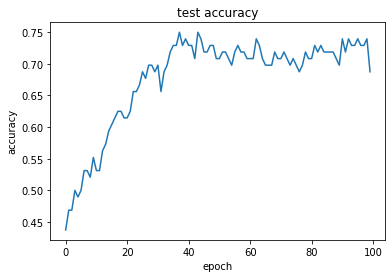

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

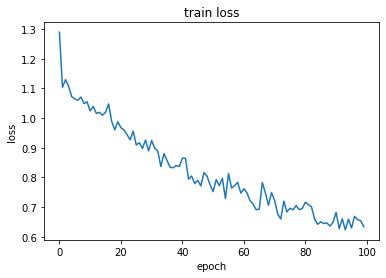

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 5-layer model Relu Adam Dropout**

In [ ]:
model_5layer_RAD = keras.Sequential(
    [
        keras.layers.Dense(128, input_shape = (X_train.shape[1],), activation = 'relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation = 'relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation = 'relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(16, activation = 'relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_5layer_RAD.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_5layer_RAD.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

In [ ]:
predictions_test = model_5layer_RAD.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_5layer_RAD.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 5-layer model Relu RMS Dropout**

In [ ]:
model_5layer_RRD = keras.Sequential(
    [
        keras.layers.Dense(128, input_shape = (X_train.shape[1],), activation = 'relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation = 'relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation = 'relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(16, activation = 'relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_5layer_RRD.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_5layer_RRD.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

In [ ]:
predictions_test = model_5layer_RRD.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_5layer_RRD.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 5-layer model tanh SGD Dropout**

In [ ]:
model_5layer_tSD = keras.Sequential(
    [
        keras.layers.Dense(128, input_shape = (X_train.shape[1],), activation = 'tanh'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, activation = 'tanh'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(32, activation = 'tanh'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(16, activation = 'tanh'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_5layer_tSD.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_5layer_tSD.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

In [ ]:
predictions_test = model_5layer_tSD.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_5layer_tSD.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 5-layer model tanh Adam Dropout**

In [ ]:
model_5layer_tAD = keras.Sequential(
    [
        keras.layers.Dense(128, input_shape = (X_train.shape[1],), activation = 'tanh'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, activation = 'tanh'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(32, activation = 'tanh'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(16, activation = 'tanh'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_5layer_tAD.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_5layer_tAD.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

In [ ]:
predictions_test = model_5layer_tAD.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_5layer_tAD.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 5-layer model tanh RMS Dropout**

In [ ]:
model_5layer_tRD = keras.Sequential(
    [
        keras.layers.Dense(128, input_shape = (X_train.shape[1],), activation = 'tanh'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation = 'tanh'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation = 'tanh'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(16, activation = 'tanh'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_5layer_tRD.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_5layer_tRD.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

In [ ]:
predictions_test = model_5layer_tRD.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_5layer_tRD.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 5-layer model sigmoid SGD Dropout**

In [ ]:
model_5layer_sSD = keras.Sequential(
    [
        keras.layers.Dense(128, input_shape = (X_train.shape[1],), activation = 'sigmoid'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation = 'sigmoid'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation = 'sigmoid'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(16, activation = 'sigmoid'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_5layer_sSD.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.1), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model_5layer_sSD.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 500, batch_size = 16)

Epoch 1/500
24/24 [==============================] - 1s 9ms/step - loss: 1.1237 - accuracy: 0.3984 - val_loss: 1.0773 - val_accuracy: 0.4375
Epoch 2/500
24/24 [==============================] - 0s 3ms/step - loss: 1.1078 - accuracy: 0.3906 - val_loss: 1.0747 - val_accuracy: 0.4375
Epoch 3/500
24/24 [==============================] - 0s 3ms/step - loss: 1.1323 - accuracy: 0.4141 - val_loss: 1.0750 - val_accuracy: 0.4375
Epoch 4/500
24/24 [==============================] - 0s 3ms/step - loss: 1.1060 - accuracy: 0.3802 - val_loss: 1.0786 - val_accuracy: 0.4375
Epoch 5/500
24/24 [==============================] - 0s 3ms/step - loss: 1.1066 - accuracy: 0.3854 - val_loss: 1.0776 - val_accuracy: 0.4375
Epoch 6/500
24/24 [==============================] - 0s 3ms/step - loss: 1.1203 - accuracy: 0.3906 - val_loss: 1.0816 - val_accuracy: 0.4375
Epoch 7/500
24/24 [==============================] - 0s 3ms/step - loss: 1.1068 - accuracy: 0.4036 - val_loss: 1.0772 - val_accuracy: 0.4375
Epoch 8/500
2

In [ ]:
predictions_test = model_5layer_sSD.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_5layer_sSD.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.729167
precision: 0.7490606548577562
recall; 0.7286324786324787
F1_score: 0.7372603586889301
confusion_matrix test: 
[[20  6  0]
 [ 3 31  8]
 [ 0  9 19]]
confusion_matrix train: 
[[ 98   3   0]
 [  4 158   7]
 [  0   7 107]]


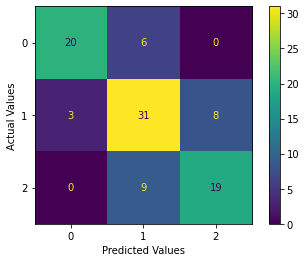

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

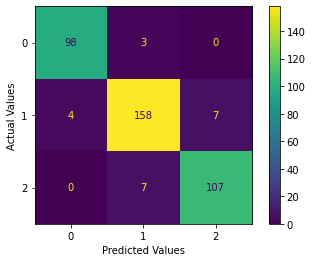

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

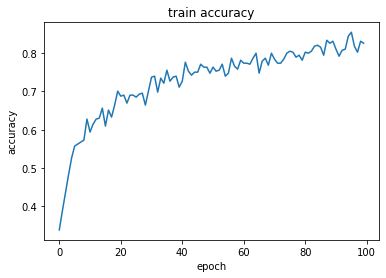

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

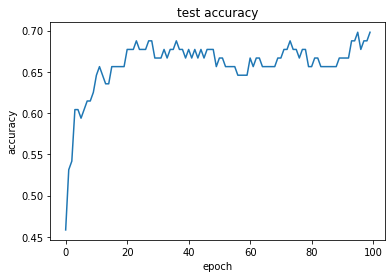

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

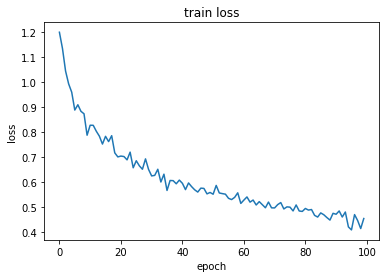

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

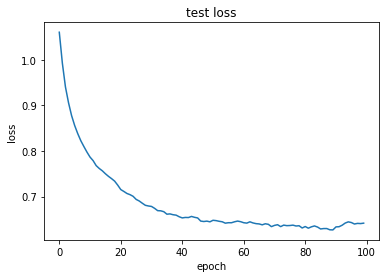

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 5-layer model sigmoid Adam Dropout**

In [ ]:
model_5layer_sAD = keras.Sequential(
    [
        keras.layers.Dense(128, input_shape = (X_train.shape[1],), activation = 'sigmoid'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation = 'sigmoid'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation = 'sigmoid'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(16, activation = 'sigmoid'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_5layer_sAD.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_5layer_sAD.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 500, batch_size = 16)

Epoch 1/500
24/24 [==============================] - 1s 10ms/step - loss: 1.1674 - accuracy: 0.3177 - val_loss: 1.1348 - val_accuracy: 0.2917
Epoch 2/500
24/24 [==============================] - 0s 4ms/step - loss: 1.1625 - accuracy: 0.3099 - val_loss: 1.1207 - val_accuracy: 0.2917
Epoch 3/500
24/24 [==============================] - 0s 4ms/step - loss: 1.1519 - accuracy: 0.3099 - val_loss: 1.1094 - val_accuracy: 0.2917
Epoch 4/500
24/24 [==============================] - 0s 4ms/step - loss: 1.1557 - accuracy: 0.2865 - val_loss: 1.1008 - val_accuracy: 0.2917
Epoch 5/500
24/24 [==============================] - 0s 3ms/step - loss: 1.1345 - accuracy: 0.3385 - val_loss: 1.0940 - val_accuracy: 0.2917
Epoch 6/500
24/24 [==============================] - 0s 3ms/step - loss: 1.1195 - accuracy: 0.3698 - val_loss: 1.0891 - val_accuracy: 0.4375
Epoch 7/500
24/24 [==============================] - 0s 4ms/step - loss: 1.1082 - accuracy: 0.3932 - val_loss: 1.0843 - val_accuracy: 0.4375
Epoch 8/500


In [ ]:
predictions_test = model_5layer_sAD.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_5layer_sAD.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.697917
precision: 0.702371105596912
recall; 0.7118437118437119
F1_score: 0.7061690837585376
confusion_matrix test: 
[[19  7  0]
 [ 7 26  9]
 [ 0  6 22]]
confusion_matrix train: 
[[ 96   5   0]
 [  7 147  15]
 [  0   9 105]]


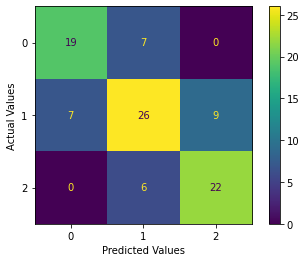

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

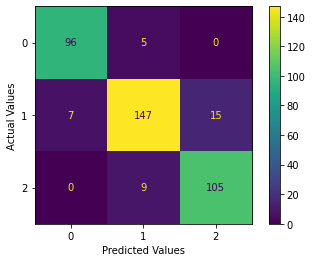

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

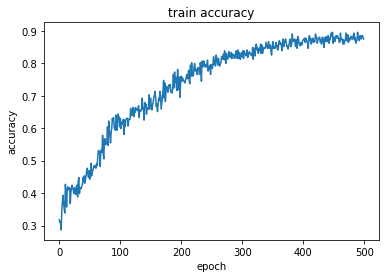

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

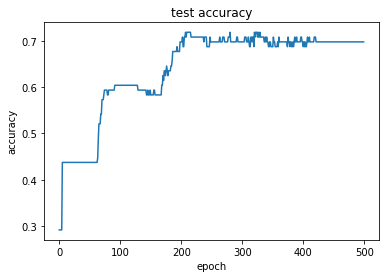

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

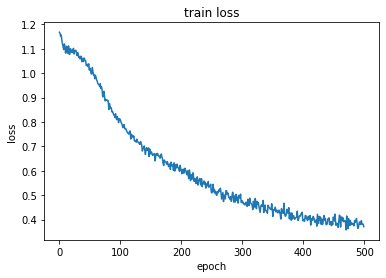

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

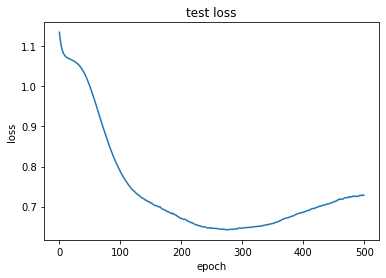

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**Model 5-layer model sigmoid RMS Dropout**

In [ ]:
model_5layer_sRD = keras.Sequential(
    [
        keras.layers.Dense(128, input_shape = (X_train.shape[1],), activation = 'sigmoid'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, activation = 'sigmoid'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(32, activation = 'sigmoid'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(16, activation = 'sigmoid'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
#make ready for training
model_5layer_sRD.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#fit model
model = model_5layer_sRD.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 500, batch_size = 16)

Epoch 1/500
24/24 [==============================] - 1s 10ms/step - loss: 1.2538 - accuracy: 0.3672 - val_loss: 1.1807 - val_accuracy: 0.2708
Epoch 2/500
24/24 [==============================] - 0s 4ms/step - loss: 1.2317 - accuracy: 0.3333 - val_loss: 1.1670 - val_accuracy: 0.4375
Epoch 3/500
24/24 [==============================] - 0s 3ms/step - loss: 1.2287 - accuracy: 0.3750 - val_loss: 1.1540 - val_accuracy: 0.4375
Epoch 4/500
24/24 [==============================] - 0s 4ms/step - loss: 1.1973 - accuracy: 0.3594 - val_loss: 1.1427 - val_accuracy: 0.4375
Epoch 5/500
24/24 [==============================] - 0s 4ms/step - loss: 1.2223 - accuracy: 0.3568 - val_loss: 1.1327 - val_accuracy: 0.4375
Epoch 6/500
24/24 [==============================] - 0s 4ms/step - loss: 1.2021 - accuracy: 0.3490 - val_loss: 1.1245 - val_accuracy: 0.4375
Epoch 7/500
24/24 [==============================] - 0s 4ms/step - loss: 1.2000 - accuracy: 0.3776 - val_loss: 1.1167 - val_accuracy: 0.4375
Epoch 8/500


In [ ]:
predictions_test = model_5layer_sRD.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_5layer_sRD.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.718750
precision: 0.7266025641025641
recall; 0.7326007326007327
F1_score: 0.7281045751633988
confusion_matrix test: 
[[20  6  0]
 [ 5 27 10]
 [ 0  6 22]]
confusion_matrix train: 
[[ 95   6   0]
 [ 10 143  16]
 [  0  15  99]]


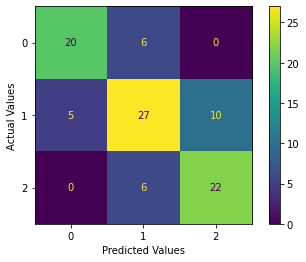

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

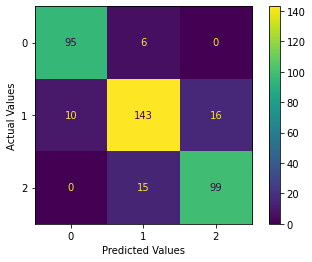

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

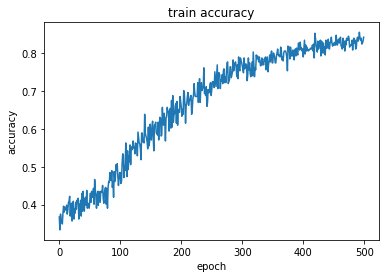

In [ ]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

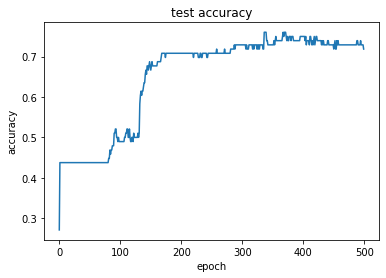

In [ ]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

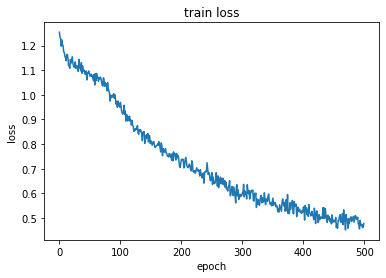

In [ ]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

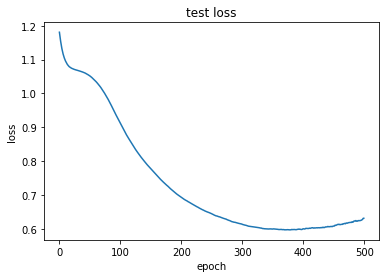

In [ ]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

#**K-Fold**

In [ ]:
kf =KFold(n_splits=5)
count = 1
# split() ->  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, Y):
    print(f'Fold:{count}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    count += 1

Fold:1, Train set: 384, Test set:96
Fold:2, Train set: 384, Test set:96
Fold:3, Train set: 384, Test set:96
Fold:4, Train set: 384, Test set:96
Fold:5, Train set: 384, Test set:96


#**Model-1 k-Fold - 3 layer Relu SGD**

In [ ]:
count = 1
cm_test, cm_train, precision, recall, F1_score, accuracy  = ([] for i in range(6))
for train_index, test_index in KFold(n_splits=5).split(X):
  print(f'Fold:{count}')
  count += 1
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  X_train = tf.convert_to_tensor(X_train, dtype=tf.float64)
  y_train = tf.convert_to_tensor(y_train, dtype=tf.float32) 
  X_test = tf.convert_to_tensor(X_test, dtype=tf.float64)
  y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)
  model_3layerk_RS = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'relu'),
        keras.layers.Dense(32, activation = 'relu'),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
  model_3layerk_RS.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
  model = model_3layerk_RS.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)
  predictions_test = model_3layerk_RS.predict(X_test, batch_size = 16)
  y_pred_test = np.argmax(predictions_test, axis = -1)
  cm_test.append(confusion_matrix(y_test, y_pred_test))
  
  prediction_train = model_3layerk_RS.predict(X_train, batch_size = 16)
  y_pred_train = np.argmax(prediction_train, axis = -1)
  cm_train.append(confusion_matrix(y_train, y_pred_train))

  precision.append(precision_score(y_test, y_pred_test , average="macro"))
  recall.append(recall_score(y_test, y_pred_test , average="macro"))
  F1_score.append(f1_score(y_test, y_pred_test , average="macro"))
  accuracy.append(accuracy_score(y_test, y_pred_test))

print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, 5):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Accuracy: {accuracy[i] * 100}%')
print('------------------------------------------------------------------------')

Fold:1
Epoch 1/100
24/24 [==============================] - 0s 8ms/step - loss: 3.0179 - accuracy: 0.3984 - val_loss: 0.9492 - val_accuracy: 0.5104
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9168 - accuracy: 0.4740 - val_loss: 0.9083 - val_accuracy: 0.4792
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8923 - accuracy: 0.4844 - val_loss: 0.9117 - val_accuracy: 0.5938
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8854 - accuracy: 0.4948 - val_loss: 0.9056 - val_accuracy: 0.5625
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8685 - accuracy: 0.5365 - val_loss: 0.8965 - val_accuracy: 0.5625
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8652 - accuracy: 0.5365 - val_loss: 0.9035 - val_accuracy: 0.5729
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8601 - accuracy: 0.5078 - val_loss: 0.9954 - val_accuracy: 0.5312
Epoch 

#**1-Fold**

In [ ]:
print('Accuracy: %f' % accuracy[0])
print("precision: " + str(precision[0]))
print("recall; " + str(recall[0]))
print("F1_score: " + str(F1_score[0]))
print("confusion_matrix test: ")
print(cm_test[0])
print("confusion_matrix train: ")
print(cm_train[0])

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test[0], display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train[0], display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

#**2-Fold**

In [ ]:
print('Accuracy: %f' % accuracy[1])
print("precision: " + str(precision[1]))
print("recall; " + str(recall[1]))
print("F1_score: " + str(F1_score[1]))
print("confusion_matrix test: ")
print(cm_test[1])
print("confusion_matrix train: ")
print(cm_train[1])

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test[1], display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train[1], display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

#**3-Fold**

In [ ]:
print('Accuracy: %f' % accuracy[2])
print("precision: " + str(precision[2]))
print("recall; " + str(recall[2]))
print("F1_score: " + str(F1_score[2]))
print("confusion_matrix test: ")
print(cm_test[2])
print("confusion_matrix train: ")
print(cm_train[2])

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test[2], display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train[2], display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

#**4-Fold**

In [ ]:
print('Accuracy: %f' % accuracy[3])
print("precision: " + str(precision[3]))
print("recall; " + str(recall[3]))
print("F1_score: " + str(F1_score[3]))
print("confusion_matrix test: ")
print(cm_test[3])
print("confusion_matrix train: ")
print(cm_train[3])

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test[3], display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train[3], display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

#**5-Fold**

In [ ]:
print('Accuracy: %f' % accuracy[4])
print("precision: " + str(precision[4]))
print("recall; " + str(recall[4]))
print("F1_score: " + str(F1_score[4]))
print("confusion_matrix test: ")
print(cm_test[4])
print("confusion_matrix train: ")
print(cm_train[4])

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test[4], display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train[4], display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

#**Model-2 k-Fold - 4 layer Relu RMS**

In [ ]:
count = 1
cm_test, cm_train, precision, recall, F1_score, accuracy  = ([] for i in range(6))
for train_index, test_index in KFold(n_splits=5).split(X):
  print(f'Fold:{count}')
  count += 1
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  X_train = tf.convert_to_tensor(X_train, dtype=tf.float64)
  y_train = tf.convert_to_tensor(y_train, dtype=tf.float32) 
  X_test = tf.convert_to_tensor(X_test, dtype=tf.float64)
  y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)
  model_4layerk_RR = keras.Sequential(
    [
        keras.layers.Dense(128, input_shape = (X_train.shape[1],), activation = 'relu'),
        keras.layers.Dense(64, activation = 'relu'),
        keras.layers.Dense(32, activation = 'relu'),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
  model_4layerk_RR.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
  model = model_4layerk_RR.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)
  
  predictions_test = model_4layerk_RR.predict(X_test, batch_size = 16)
  y_pred_test = np.argmax(predictions_test, axis = -1)
  cm_test.append(confusion_matrix(y_test, y_pred_test))
  
  prediction_train = model_4layerk_RR.predict(X_train, batch_size = 16)
  y_pred_train = np.argmax(prediction_train, axis = -1)
  cm_train.append(confusion_matrix(y_train, y_pred_train))

  precision.append(precision_score(y_test, y_pred_test , average="macro"))
  recall.append(recall_score(y_test, y_pred_test , average="macro"))
  F1_score.append(f1_score(y_test, y_pred_test , average="macro"))
  accuracy.append(accuracy_score(y_test, y_pred_test))

print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, 5):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Accuracy: {accuracy[i] * 100}%')
print('------------------------------------------------------------------------')

#**1-Fold**

In [ ]:
print('Accuracy: %f' % accuracy[0])
print("precision: " + str(precision[0]))
print("recall; " + str(recall[0]))
print("F1_score: " + str(F1_score[0]))
print("confusion_matrix test: ")
print(cm_test[0])
print("confusion_matrix train: ")
print(cm_train[0])

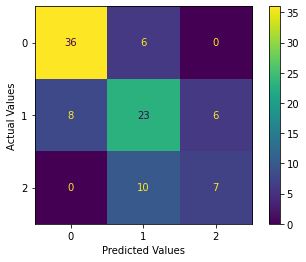

In [1478]:
cmd = ConfusionMatrixDisplay(cm_test[0], display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

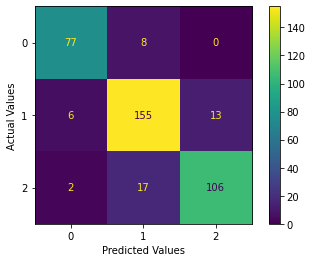

In [1479]:
cmd = ConfusionMatrixDisplay(cm_train[0], display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

#**2-Fold**

In [ ]:
print('Accuracy: %f' % accuracy[1])
print("precision: " + str(precision[1]))
print("recall; " + str(recall[1]))
print("F1_score: " + str(F1_score[1]))
print("confusion_matrix test: ")
print(cm_test[1])
print("confusion_matrix train: ")
print(cm_train[1])

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test[1], display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train[1], display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

#**3-Fold**

In [ ]:
print('Accuracy: %f' % accuracy[2])
print("precision: " + str(precision[2]))
print("recall; " + str(recall[2]))
print("F1_score: " + str(F1_score[2]))
print("confusion_matrix test: ")
print(cm_test[2])
print("confusion_matrix train: ")
print(cm_train[2])

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test[2], display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train[2], display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

#**4-Fold**

In [ ]:
print('Accuracy: %f' % accuracy[3])
print("precision: " + str(precision[3]))
print("recall; " + str(recall[3]))
print("F1_score: " + str(F1_score[3]))
print("confusion_matrix test: ")
print(cm_test[3])
print("confusion_matrix train: ")
print(cm_train[3])

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test[3], display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train[3], display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

#**5-Fold**

In [ ]:
print('Accuracy: %f' % accuracy[4])
print("precision: " + str(precision[4]))
print("recall; " + str(recall[4]))
print("F1_score: " + str(F1_score[4]))
print("confusion_matrix test: ")
print(cm_test[4])
print("confusion_matrix train: ")
print(cm_train[4])

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test[4], display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train[4], display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

#**Model-3 k-Fold - 5 layer relu SGD**

In [ ]:
count = 1
cm_test, cm_train, precision, recall, F1_score, accuracy  = ([] for i in range(6))
for train_index, test_index in KFold(n_splits=5).split(X):
  print(f'Fold:{count}')
  count += 1
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  X_train = tf.convert_to_tensor(X_train, dtype=tf.float64)
  y_train = tf.convert_to_tensor(y_train, dtype=tf.float32) 
  X_test = tf.convert_to_tensor(X_test, dtype=tf.float64)
  y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)
  model_5layerk_RS = keras.Sequential(
    [
        keras.layers.Dense(64, input_shape = (X_train.shape[1],), activation = 'relu'),
        keras.layers.Dense(32, activation = 'relu'),
        keras.layers.Dense(16, activation = 'relu'),
        keras.layers.Dense(8, activation = 'relu'),
        keras.layers.Dense(3, activation = 'softmax')
    ]
  )
  model_5layerk_RS.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.01), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
  model_5layerk_RS.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

  predictions_test = model_5layerk_RS.predict(X_test, batch_size = 16)
  y_pred_test = np.argmax(predictions_test, axis = -1)
  cm_test.append(confusion_matrix(y_test, y_pred_test))
  
  prediction_train = model_5layerk_RS.predict(X_train, batch_size = 16)
  y_pred_train = np.argmax(prediction_train, axis = -1)
  cm_train.append(confusion_matrix(y_train, y_pred_train))

  precision.append(precision_score(y_test, y_pred_test , average="macro"))
  recall.append(recall_score(y_test, y_pred_test , average="macro"))
  F1_score.append(f1_score(y_test, y_pred_test , average="macro"))
  accuracy.append(accuracy_score(y_test, y_pred_test))

print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, 5):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Accuracy: {accuracy[i] * 100}%')
print('------------------------------------------------------------------------')

#**1-Fold**

In [ ]:
print('Accuracy: %f' % accuracy[0])
print("precision: " + str(precision[0]))
print("recall; " + str(recall[0]))
print("F1_score: " + str(F1_score[0]))
print("confusion_matrix test: ")
print(cm_test[0])
print("confusion_matrix train: ")
print(cm_train[0])

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test[0], display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train[0], display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

#**2-Fold**

In [ ]:
print('Accuracy: %f' % accuracy[1])
print("precision: " + str(precision[1]))
print("recall; " + str(recall[1]))
print("F1_score: " + str(F1_score[1]))
print("confusion_matrix test: ")
print(cm_test[1])
print("confusion_matrix train: ")
print(cm_train[1])

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test[1], display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train[1], display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

#**3-Fold**

In [ ]:
print('Accuracy: %f' % accuracy[2])
print("precision: " + str(precision[2]))
print("recall; " + str(recall[2]))
print("F1_score: " + str(F1_score[2]))
print("confusion_matrix test: ")
print(cm_test[2])
print("confusion_matrix train: ")
print(cm_train[2])

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test[2], display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train[2], display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

#**4-Fold**

In [ ]:
print('Accuracy: %f' % accuracy[3])
print("precision: " + str(precision[3]))
print("recall; " + str(recall[3]))
print("F1_score: " + str(F1_score[3]))
print("confusion_matrix test: ")
print(cm_test[3])
print("confusion_matrix train: ")
print(cm_train[3])

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test[3], display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train[3], display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

#**5-Fold**

In [ ]:
print('Accuracy: %f' % accuracy[4])
print("precision: " + str(precision[4]))
print("recall; " + str(recall[4]))
print("F1_score: " + str(F1_score[4]))
print("confusion_matrix test: ")
print(cm_test[4])
print("confusion_matrix train: ")
print(cm_train[4])

In [ ]:
cmd = ConfusionMatrixDisplay(cm_test[4], display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
cmd = ConfusionMatrixDisplay(cm_train[4], display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

#**Regularization For best Model**

In [1586]:
model_4layerL_RR = keras.Sequential(
    [
        keras.layers.Dense(128, input_shape = (X_train.shape[1],), activation = 'relu', activity_regularizer = keras.regularizers.L2(0.01)),
        keras.layers.Dense(64, activation = 'relu', activity_regularizer = keras.regularizers.L2(0.01)),
        keras.layers.Dense(32, activation = 'relu', activity_regularizer = keras.regularizers.L2(0.01)),
        keras.layers.Dense(3, activation = 'softmax')
    ]
)
model_4layerL_RR.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model = model_4layerL_RR.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 16)

Epoch 1/100
24/24 [==============================] - 3s 25ms/step - loss: 1.6974 - accuracy: 0.4583 - val_loss: 1.6351 - val_accuracy: 0.4688
Epoch 2/100
24/24 [==============================] - 0s 9ms/step - loss: 1.6254 - accuracy: 0.4844 - val_loss: 1.5872 - val_accuracy: 0.4688
Epoch 3/100
24/24 [==============================] - 0s 7ms/step - loss: 1.5718 - accuracy: 0.5104 - val_loss: 1.5488 - val_accuracy: 0.5104
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 1.5264 - accuracy: 0.5339 - val_loss: 1.5159 - val_accuracy: 0.5208
Epoch 5/100
24/24 [==============================] - 0s 6ms/step - loss: 1.4855 - accuracy: 0.5703 - val_loss: 1.4842 - val_accuracy: 0.5104
Epoch 6/100
24/24 [==============================] - 0s 6ms/step - loss: 1.4486 - accuracy: 0.6068 - val_loss: 1.4551 - val_accuracy: 0.5104
Epoch 7/100
24/24 [==============================] - 0s 5ms/step - loss: 1.4134 - accuracy: 0.6198 - val_loss: 1.4265 - val_accuracy: 0.5625
Epoch 8/100


In [1587]:
predictions_test = model_4layerL_RR.predict(X_test, batch_size = 16)
y_pred_test = np.argmax(predictions_test, axis = -1)
cm_test = confusion_matrix(y_test, y_pred_test)

prediction_train = model_4layerL_RR.predict(X_train, batch_size = 16)
y_pred_train = np.argmax(prediction_train, axis = -1)
cm_train = confusion_matrix(y_train, y_pred_train)

precision = precision_score(y_test, y_pred_test , average="macro")
recall = recall_score(y_test, y_pred_test , average="macro")
F1_score = f1_score(y_test, y_pred_test , average="macro")
accuracy = accuracy_score(y_test, y_pred_test)
print('Accuracy: %f' % accuracy)
print("precision: " + str(precision))
print("recall; " + str(recall))
print("F1_score: " + str(F1_score))
print("confusion_matrix test: ")
print(cm_test)
print("confusion_matrix train: ")
print(cm_train)

Accuracy: 0.770833
precision: 0.8057836161284436
recall; 0.7576312576312576
F1_score: 0.7712959555064818
confusion_matrix test: 
[[17  8  1]
 [ 1 35  6]
 [ 0  6 22]]
confusion_matrix train: 
[[ 99   2   0]
 [  2 165   2]
 [  0   3 111]]


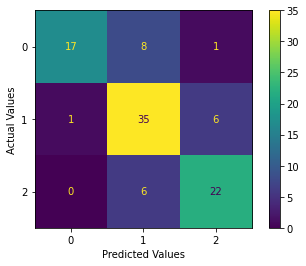

In [1588]:
cmd = ConfusionMatrixDisplay(cm_test, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

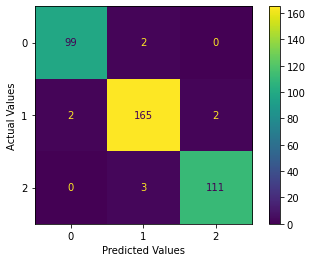

In [1589]:
cmd = ConfusionMatrixDisplay(cm_train, display_labels=[0, 1, 2])
cmd.plot()
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

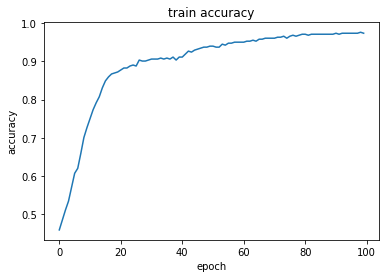

In [1590]:
plt.plot(model.history['accuracy'])
plt.title('train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

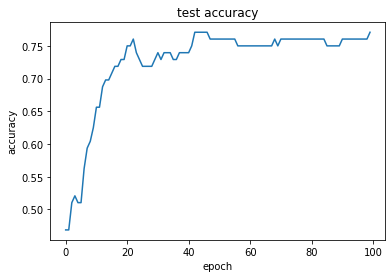

In [1591]:
plt.plot(model.history['val_accuracy'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

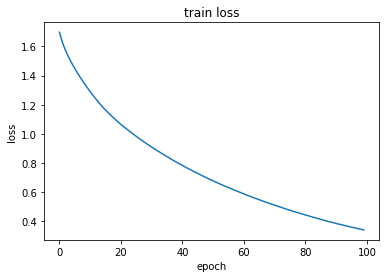

In [1592]:
plt.plot(model.history['loss'])
plt.title('train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

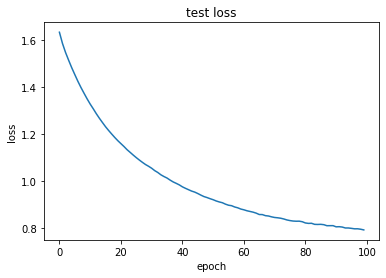

In [1593]:
plt.plot(model.history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()